In [1]:
from __future__ import print_function, division

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import sys

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from math import pi

from scipy.io import loadmat
from scipy.io import savemat
from scipy.signal import butter, filtfilt

In [ ]:
# load data
def load_data(filename):
    # load dataset
    exames_dict = loadmat(filename)
    
    target = exames_dict['target']
    exames = exames_dict['exames']

    # samples as the first dimension
    exames = np.transpose(exames,(2,0,1))

    target = target[0]
    return exames, target

def filt_data(data, order, fs, f1, f2, band):
    nyq = 0.5*fs  # nyquist frequency

    a1,b1 = butter(order,[(f1-(band/2))/nyq,(f1+(band/2))/nyq],btype='bandpass')
    a2,b2 = butter(order,[(f2-(band/2))/nyq,(f2+(band/2))/nyq],btype='bandpass')

    dataf1 = filtfilt(a1,b1,data,axis=1)
    dataf2 = filtfilt(a2,b2,data,axis=1)

    return dataf1, dataf2

def get_energy(data):
    data = np.square(data)
    return np.sum(data,axis=1)

In [ ]:
# STARTING ANALYSIS

exams_path = "/home/pedrosergiot/Documents/Exames2_sem1segundo.mat"
exames, target = load_data(exams_path)

# data parameters
fs = 601.5  # sampling rate
f1 = 31.13  # modulating frequency 1
f2 = 39.36  # modulating frequency 2

win_size = 64
nwin = int(exames.shape[1]/win_size)
npcs = 38

filter_band = 0.4
#filter_band = 2.0
filter_order = 4

print("numero de janelas: ", nwin)
print("tamanho de janelas: ", win_size)

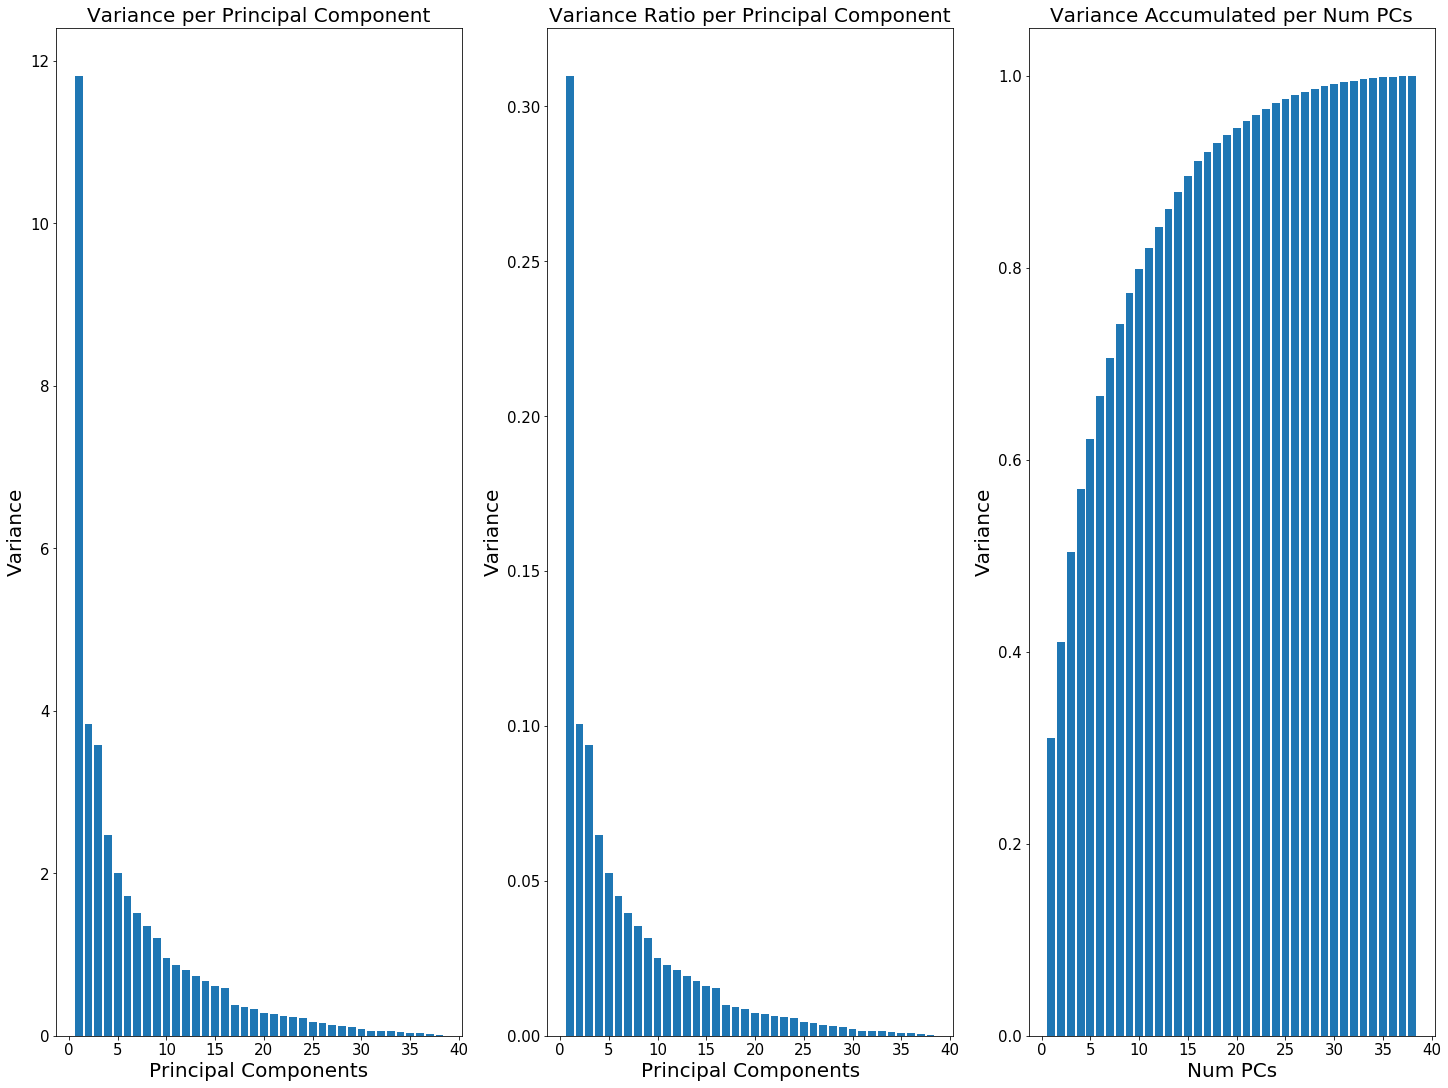

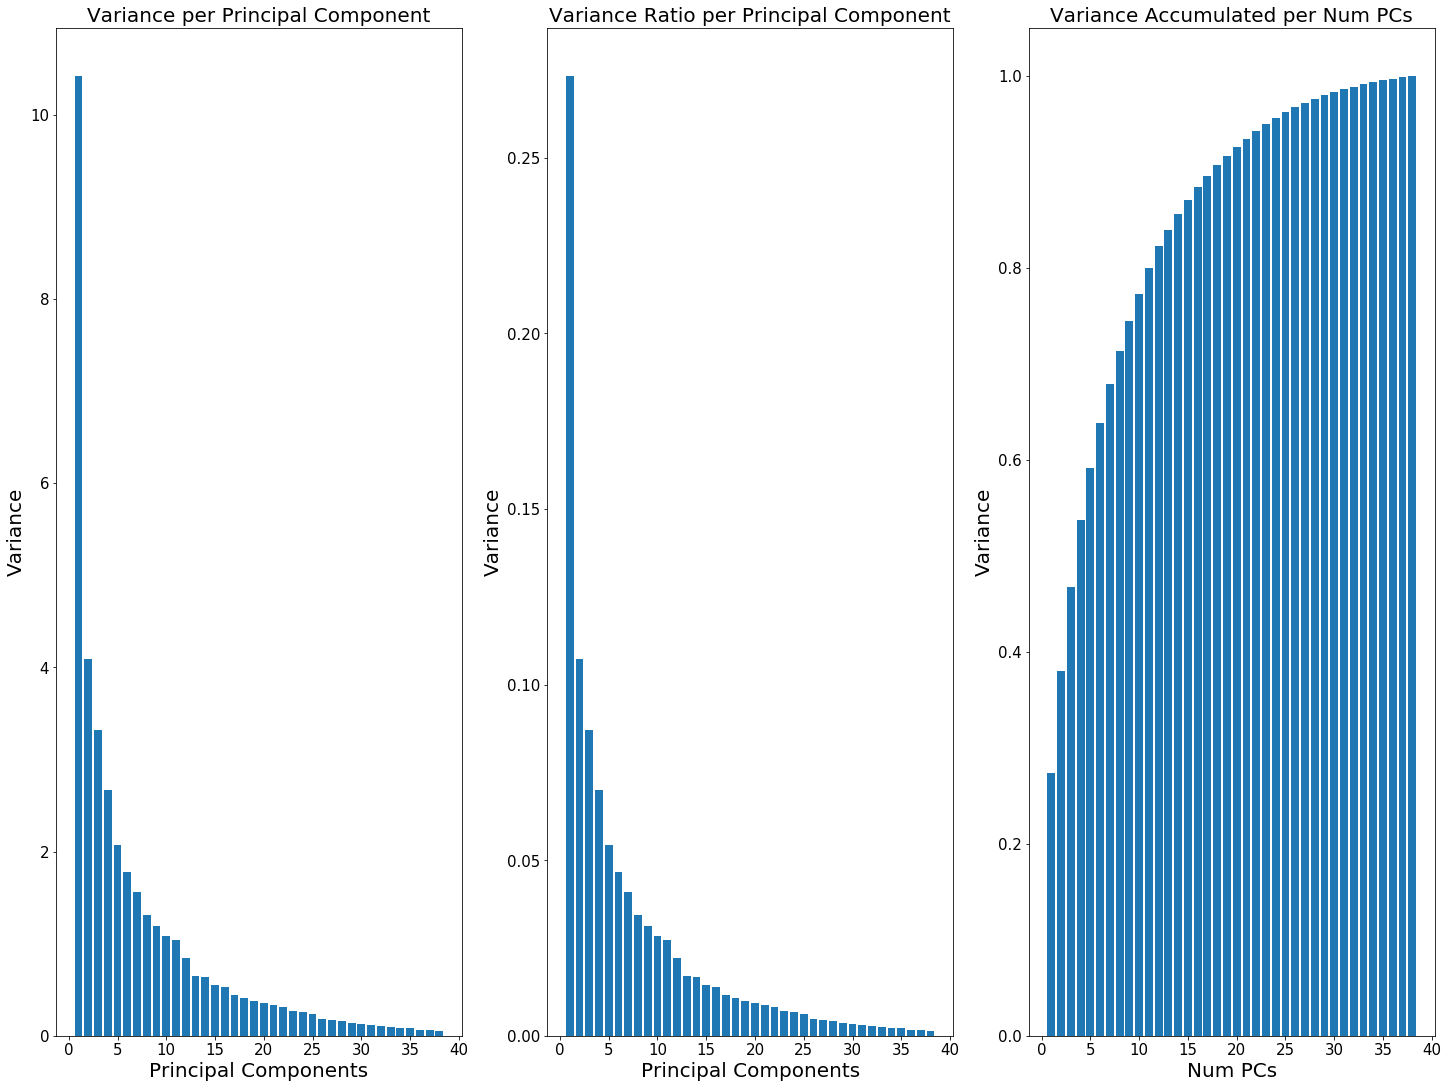

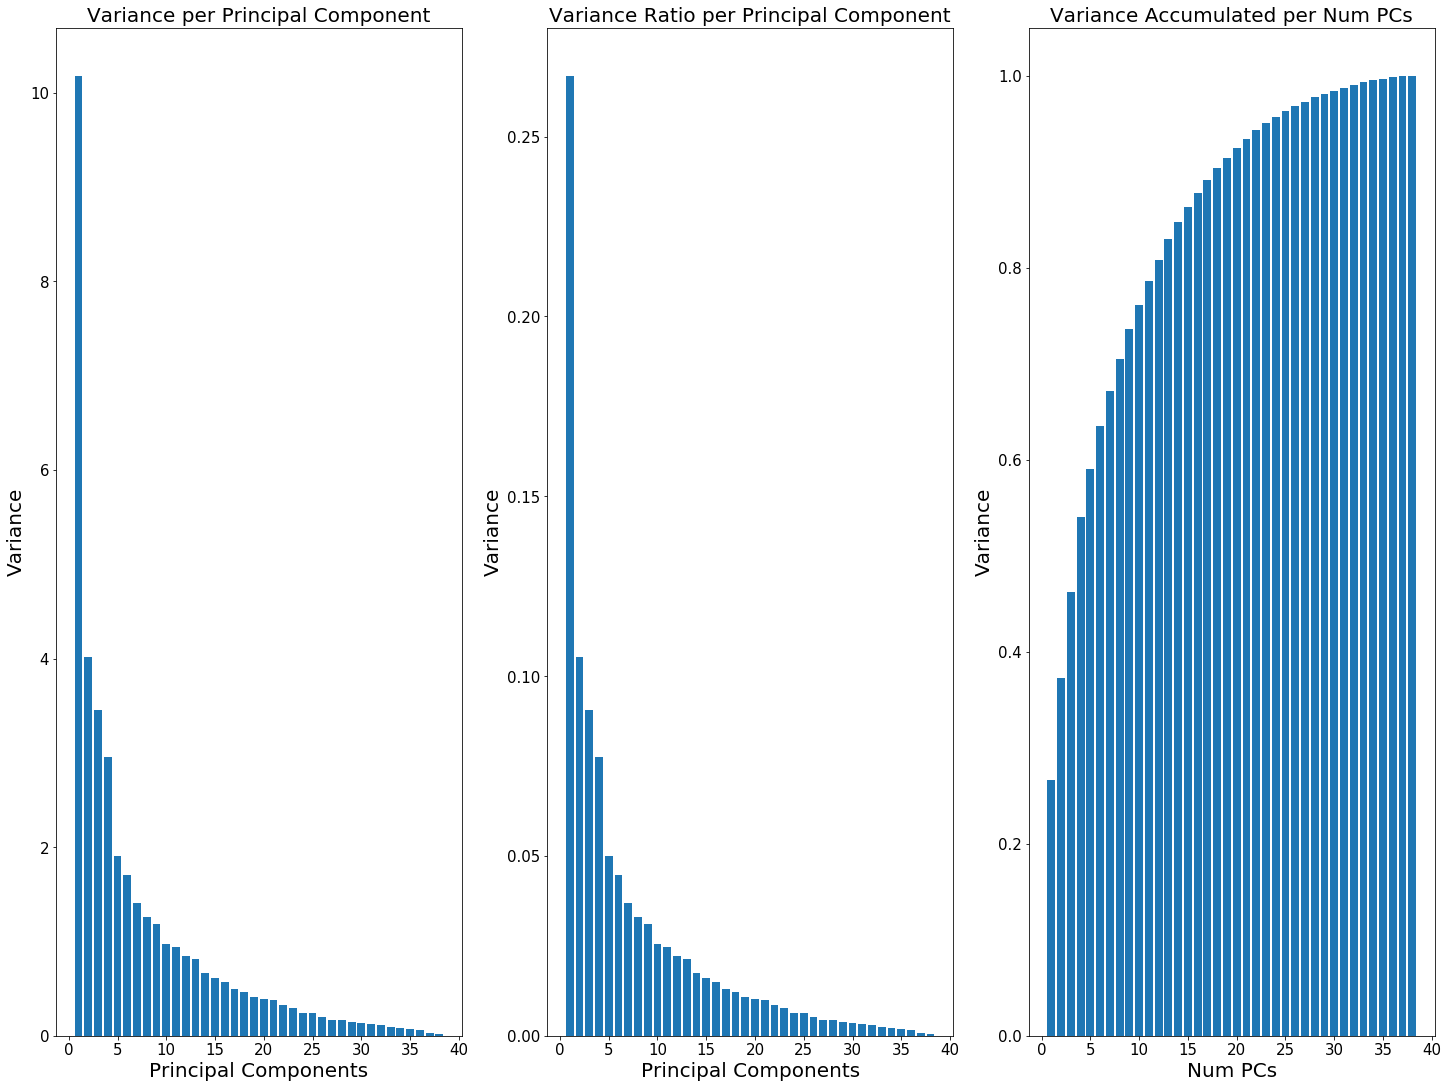

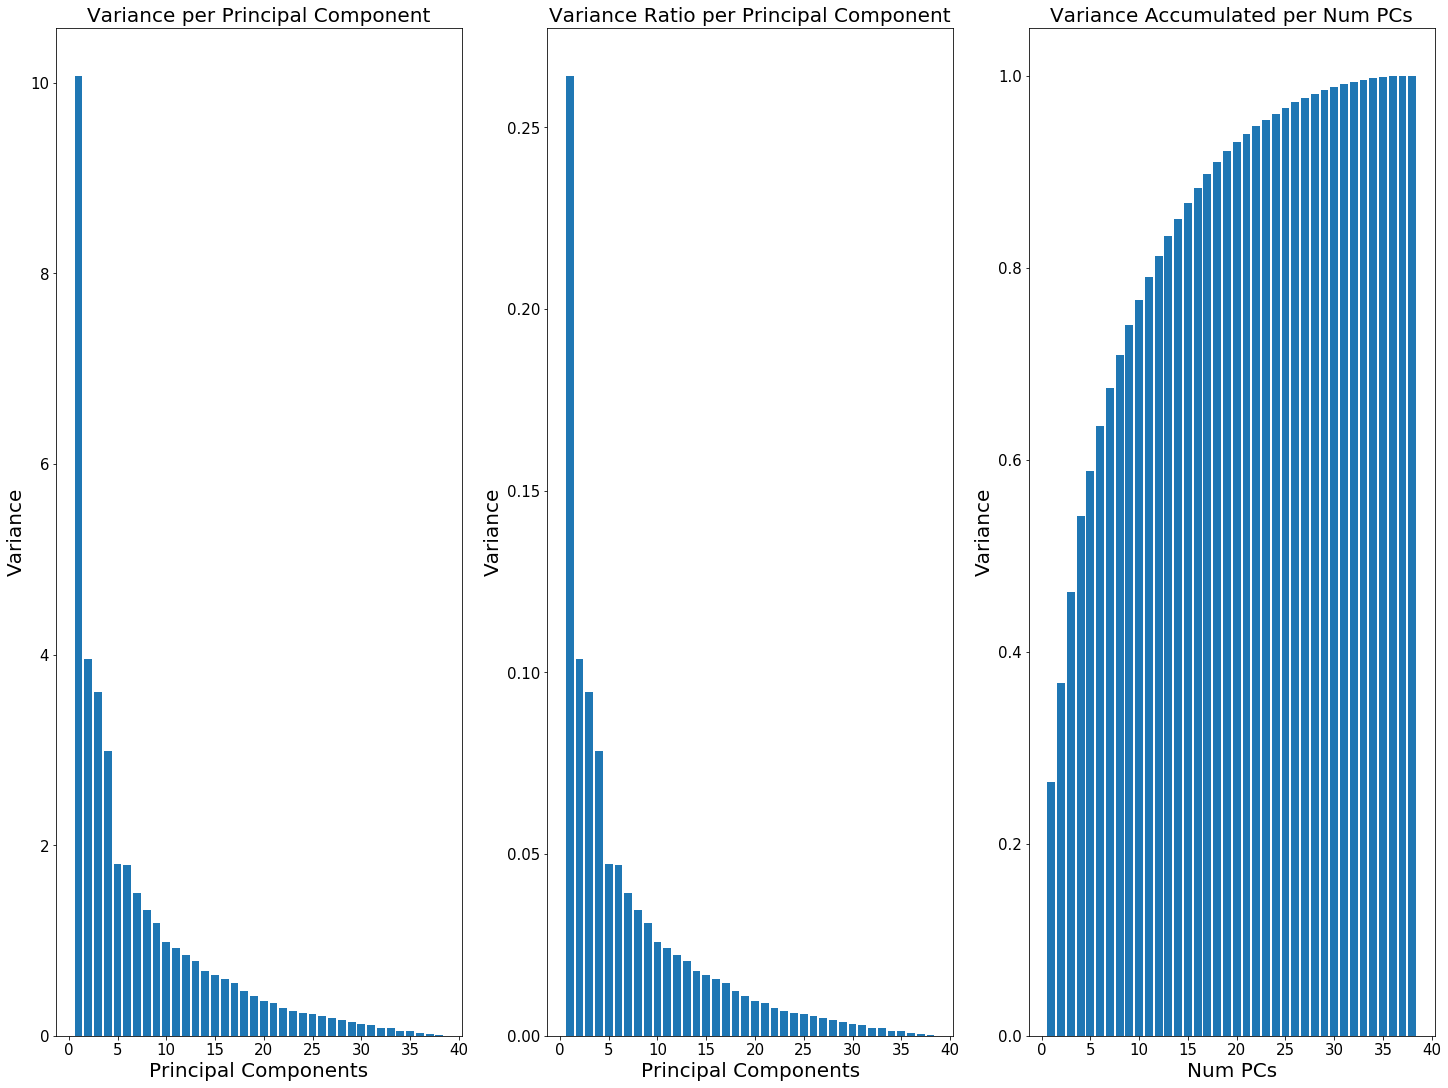

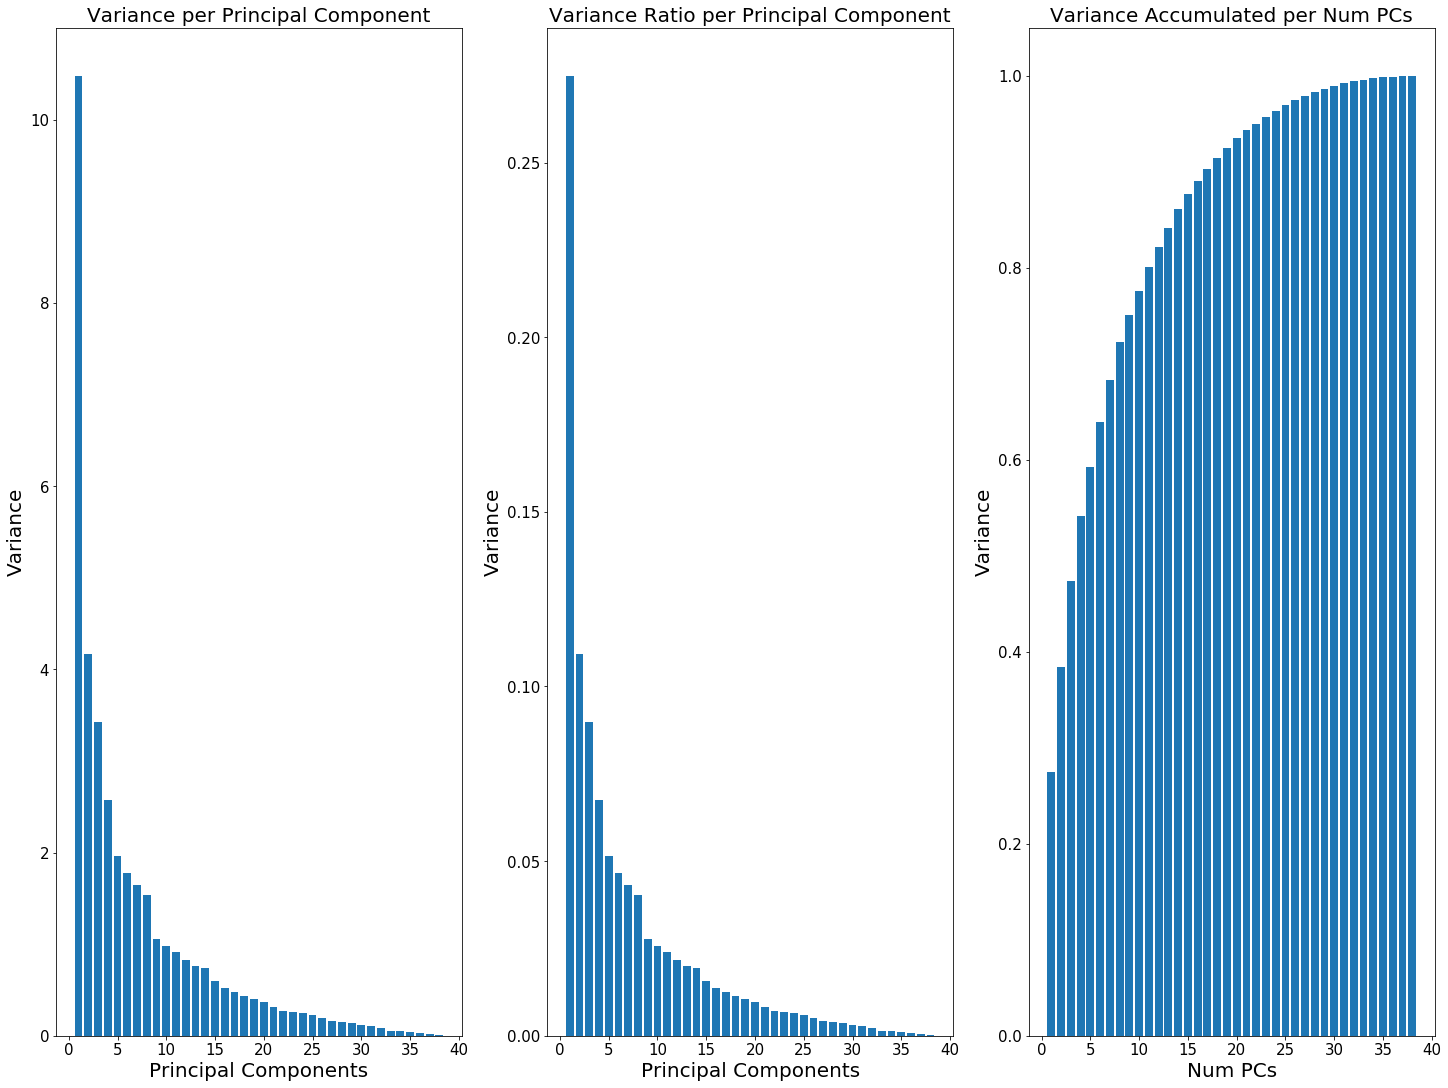

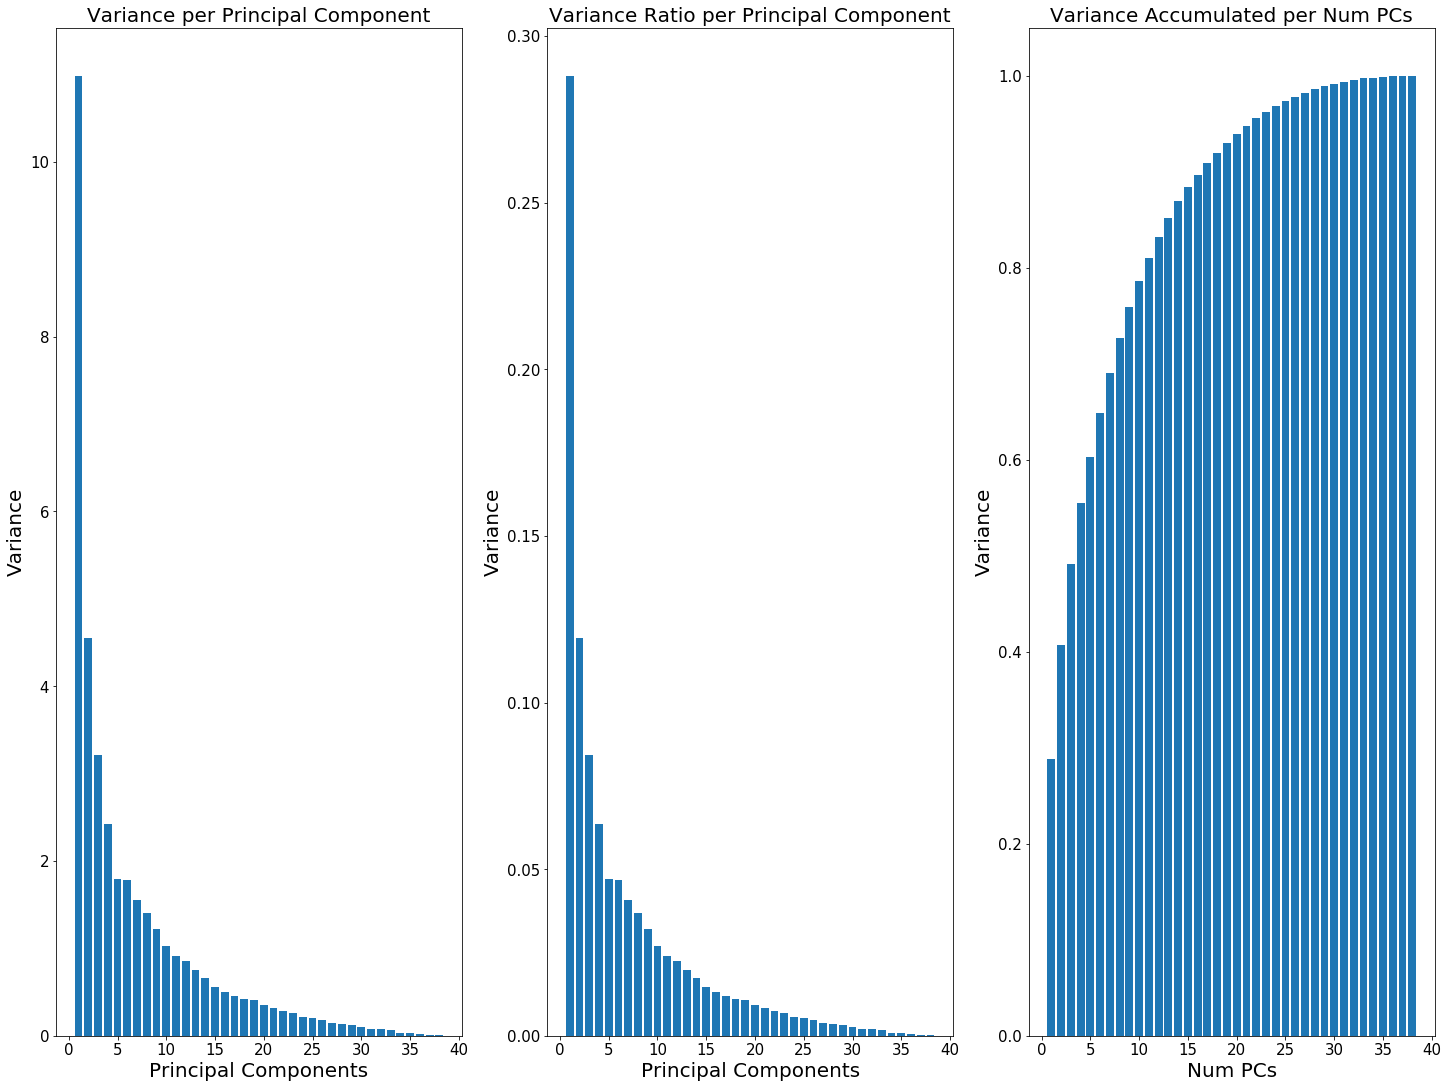

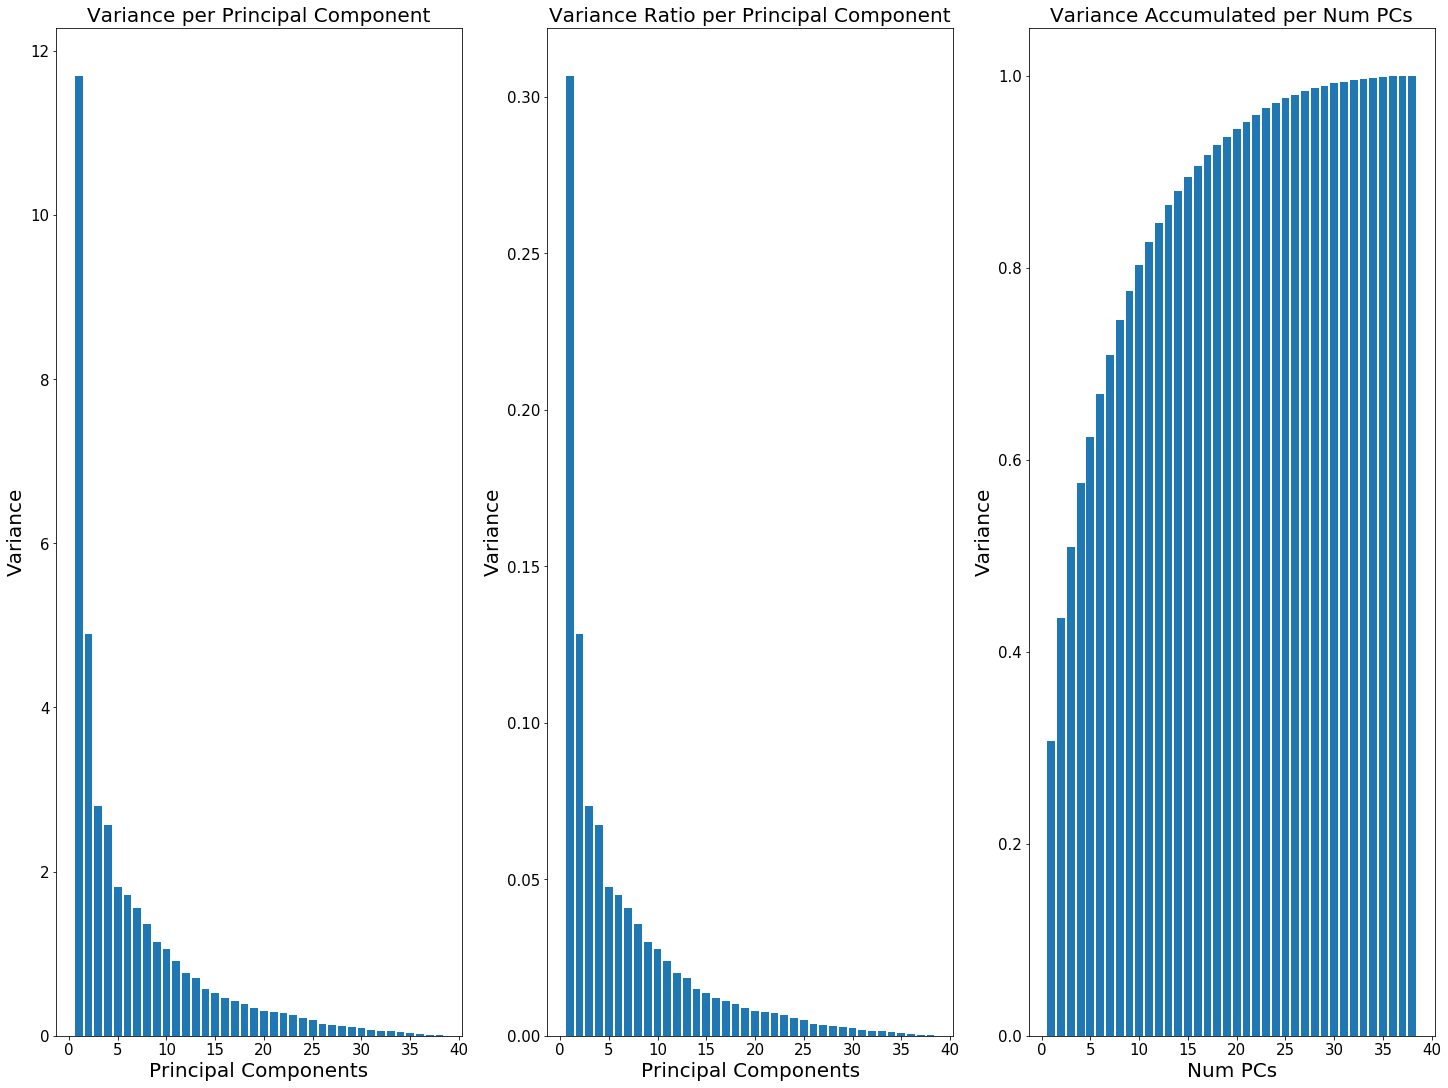

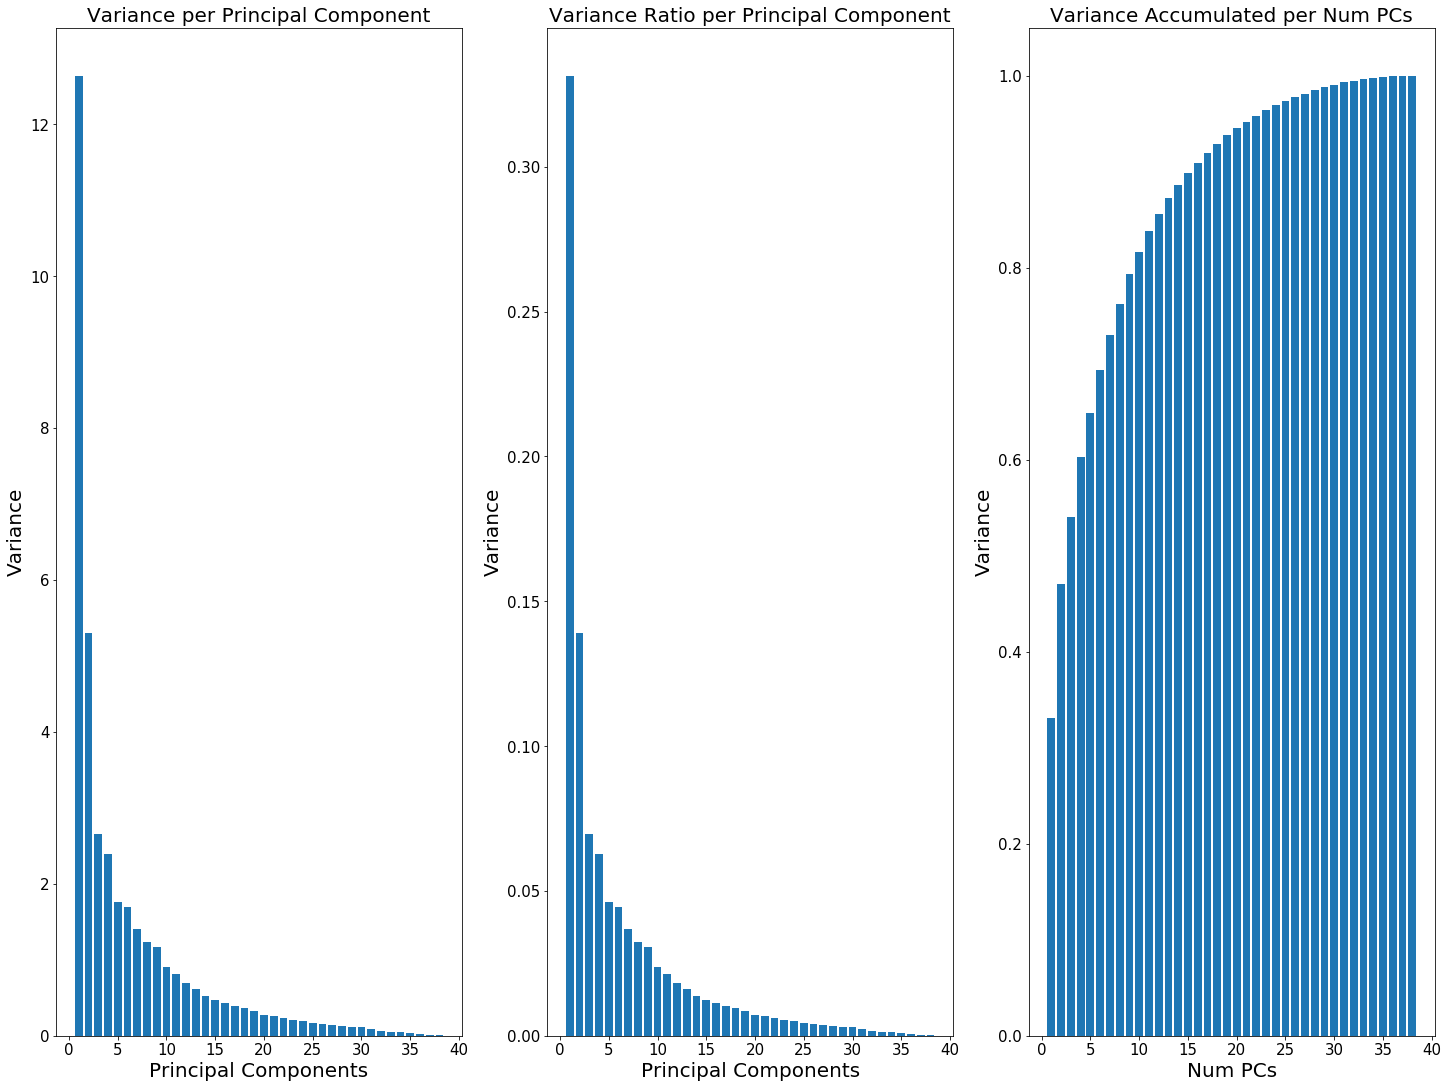

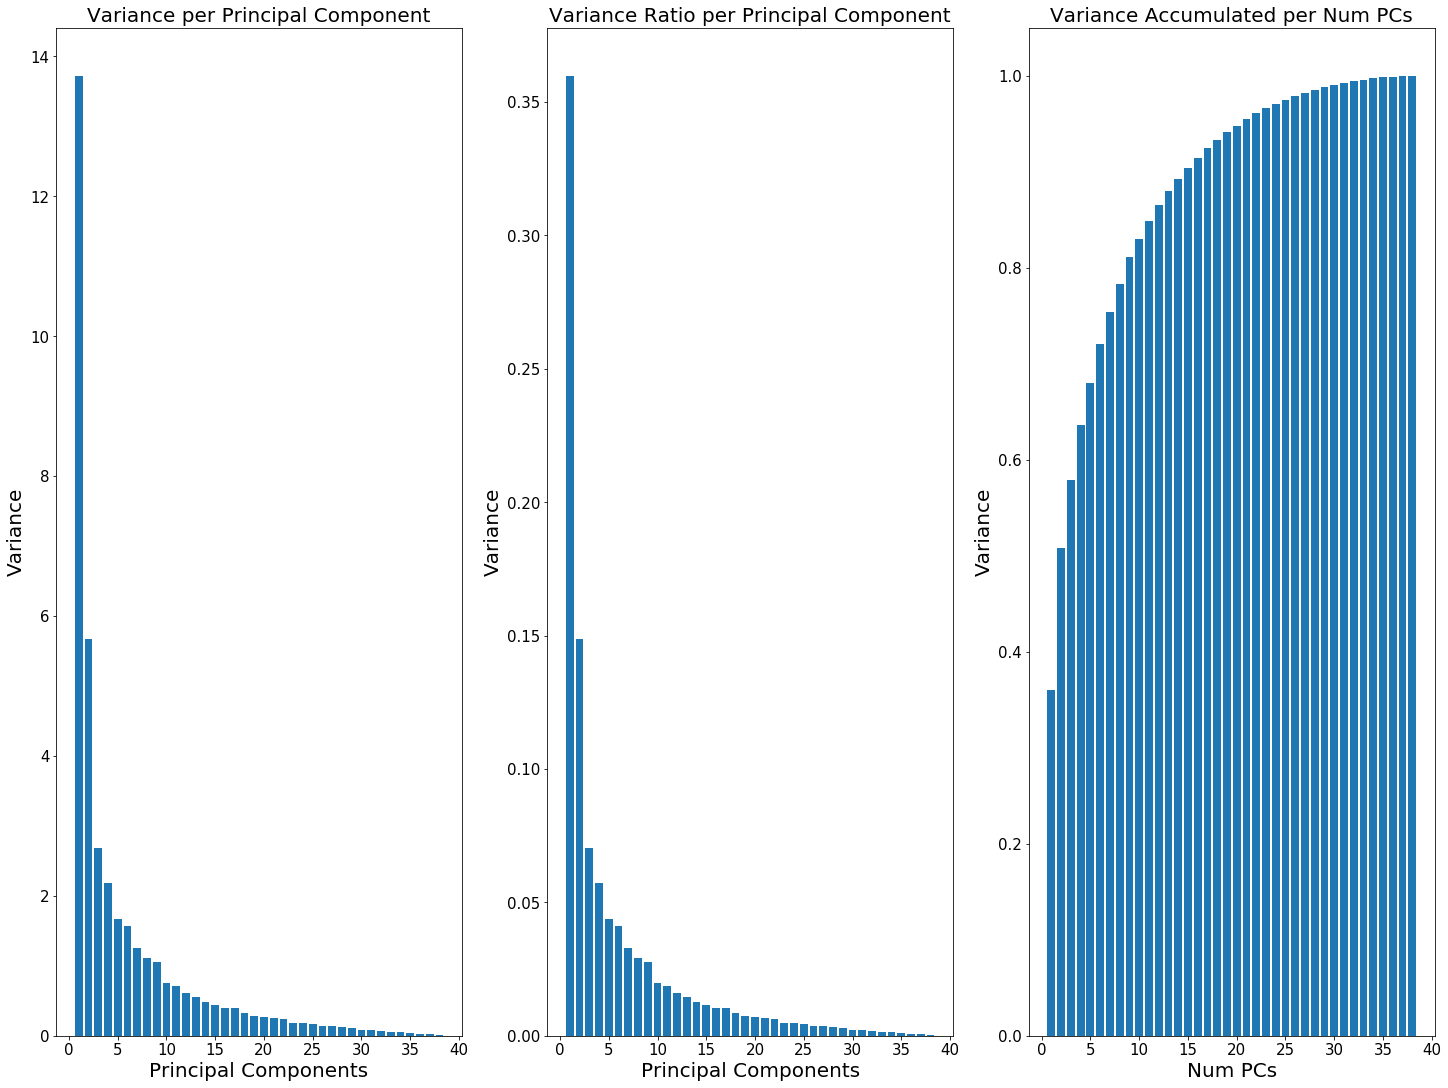

In [53]:
# Calculates the PCA Charge Curve

var_explained = np.zeros((nwin,38))
var_ratio = np.zeros((nwin,38))
var_acum = np.zeros((nwin,38))

for win in range(nwin):
    
    # filtering the data for the frequencies of interest (f1 and f2)
    # data is cut to have the number of points desired (number of windows * window size) before filtering
    dataf1, dataf2 = filt_data(exames[:,0:(win+1)*win_size,:],filter_order,fs,f1,f2,filter_band)

    # calculates the energy of the resultant signals obtained by the filering process
    energyf1 = get_energy(dataf1)
    energyf2 = get_energy(dataf2)

    # concatenates the energy values obtained
    features = np.concatenate((energyf1,energyf2),axis=1)

    # Standardization to zero mean and unit variance (preparing data for PCA)
    scaler = StandardScaler()
    features = scaler.fit_transform(features)      # fits the scaler with the training data and transforms data

    pca = PCA()
    pca.fit(features)
    
    var_explained[win,:] = pca.explained_variance_
    var_ratio[win,:] = pca.explained_variance_ratio_
    
    variance_accumulated = np.zeros(pca.explained_variance_ratio_.shape)
    
    for i in range(len(variance_accumulated)):
        variance_accumulated[i] = np.sum(pca.explained_variance_ratio_[0:(i+1)])
    
    var_acum[win,:] = variance_accumulated
    
    if win%10 == 0:
        f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,15),constrained_layout=True)
        
        ax1.xaxis.set_tick_params(labelsize=15)
        ax1.yaxis.set_tick_params(labelsize=15)
        ax1.bar(range(1,39),pca.explained_variance_)
        ax1.set_title('Variance per Principal Component',fontsize=20)
        ax1.set_xlabel('Principal Components',fontsize=20)
        ax1.set_ylabel('Variance',fontsize=20)
        
        ax2.xaxis.set_tick_params(labelsize=15)
        ax2.yaxis.set_tick_params(labelsize=15)
        ax2.bar(range(1,39), pca.explained_variance_ratio_)
        ax2.set_title('Variance Ratio per Principal Component',fontsize=20)
        ax2.set_xlabel('Principal Components',fontsize=20)
        ax2.set_ylabel('Variance',fontsize=20)
        
        ax3.xaxis.set_tick_params(labelsize=15)
        ax3.yaxis.set_tick_params(labelsize=15)
        ax3.bar(range(1,39), variance_accumulated)
        ax3.set_title('Variance Accumulated per Num PCs',fontsize=20)
        ax3.set_xlabel('Num PCs',fontsize=20)
        ax3.set_ylabel('Variance',fontsize=20)
        
        plt.savefig('/home/pedrosergiot/Documents/PCA_Charge_Distribution/PCA_Charge_%d_janelas.png' % (win+1))
        
filename = "/home/pedrosergiot/Documents/PCA_behaviour.mat"
savemat(filename, {'var_explained':var_explained, 'var_ratio':var_ratio, 'var_acum':var_acum})

/home/pedrosergiot/deep_learning_2/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/pedrosergiot/deep_learning_2/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/pedrosergiot/deep_learning_2/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

/home/pedrosergiot/deep_learning_2/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/pedrosergiot/deep_learning_2/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/pedrosergiot/deep_learning_2/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

/home/pedrosergiot/deep_learning_2/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/pedrosergiot/deep_learning_2/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/pedrosergiot/deep_learning_2/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

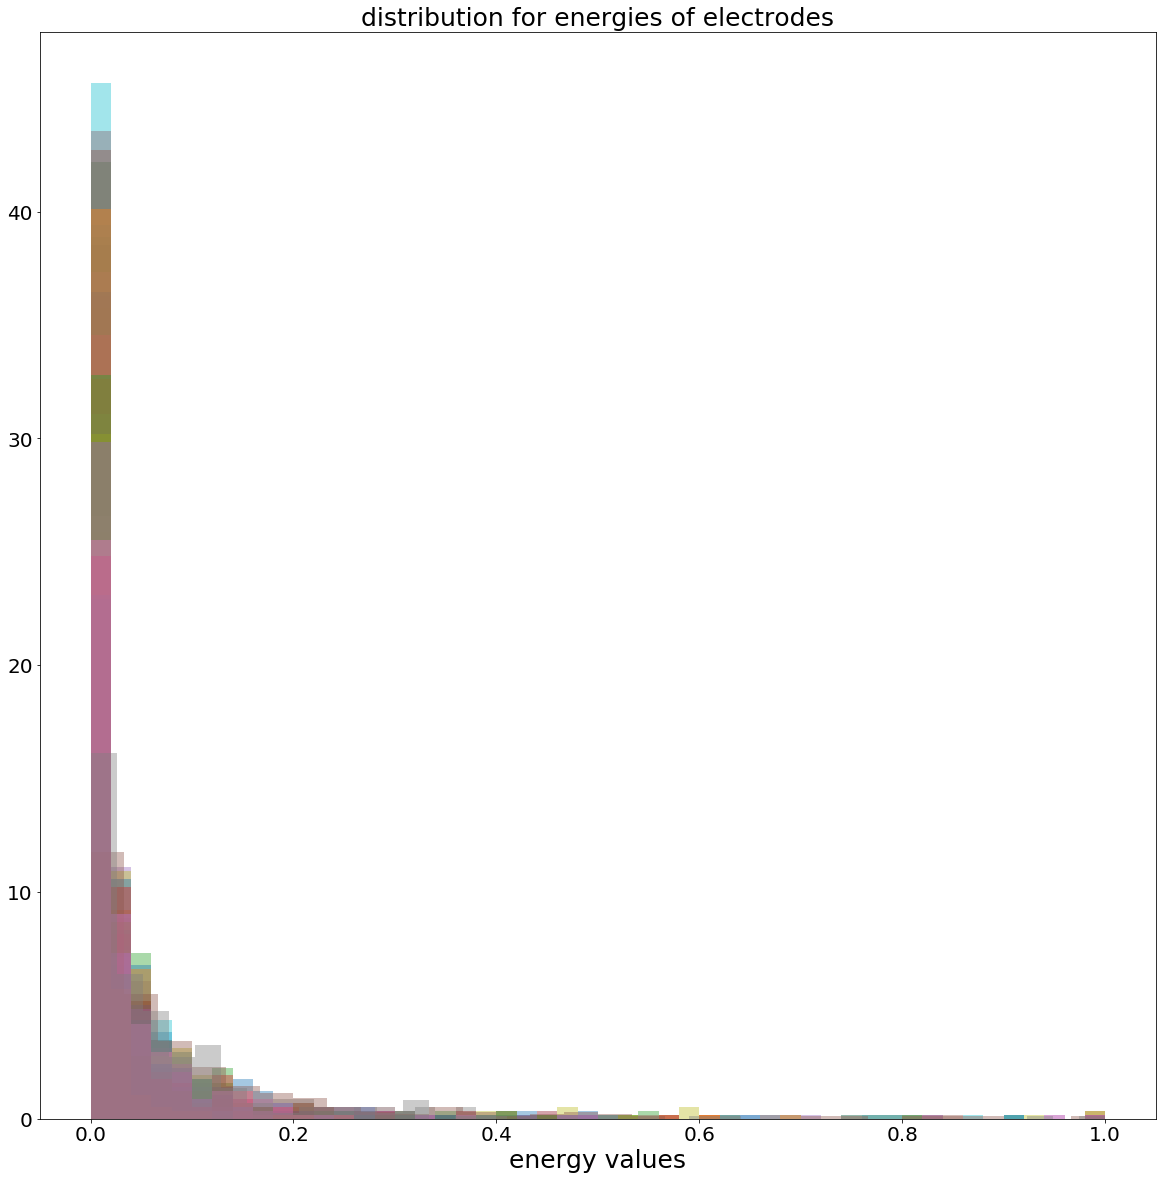

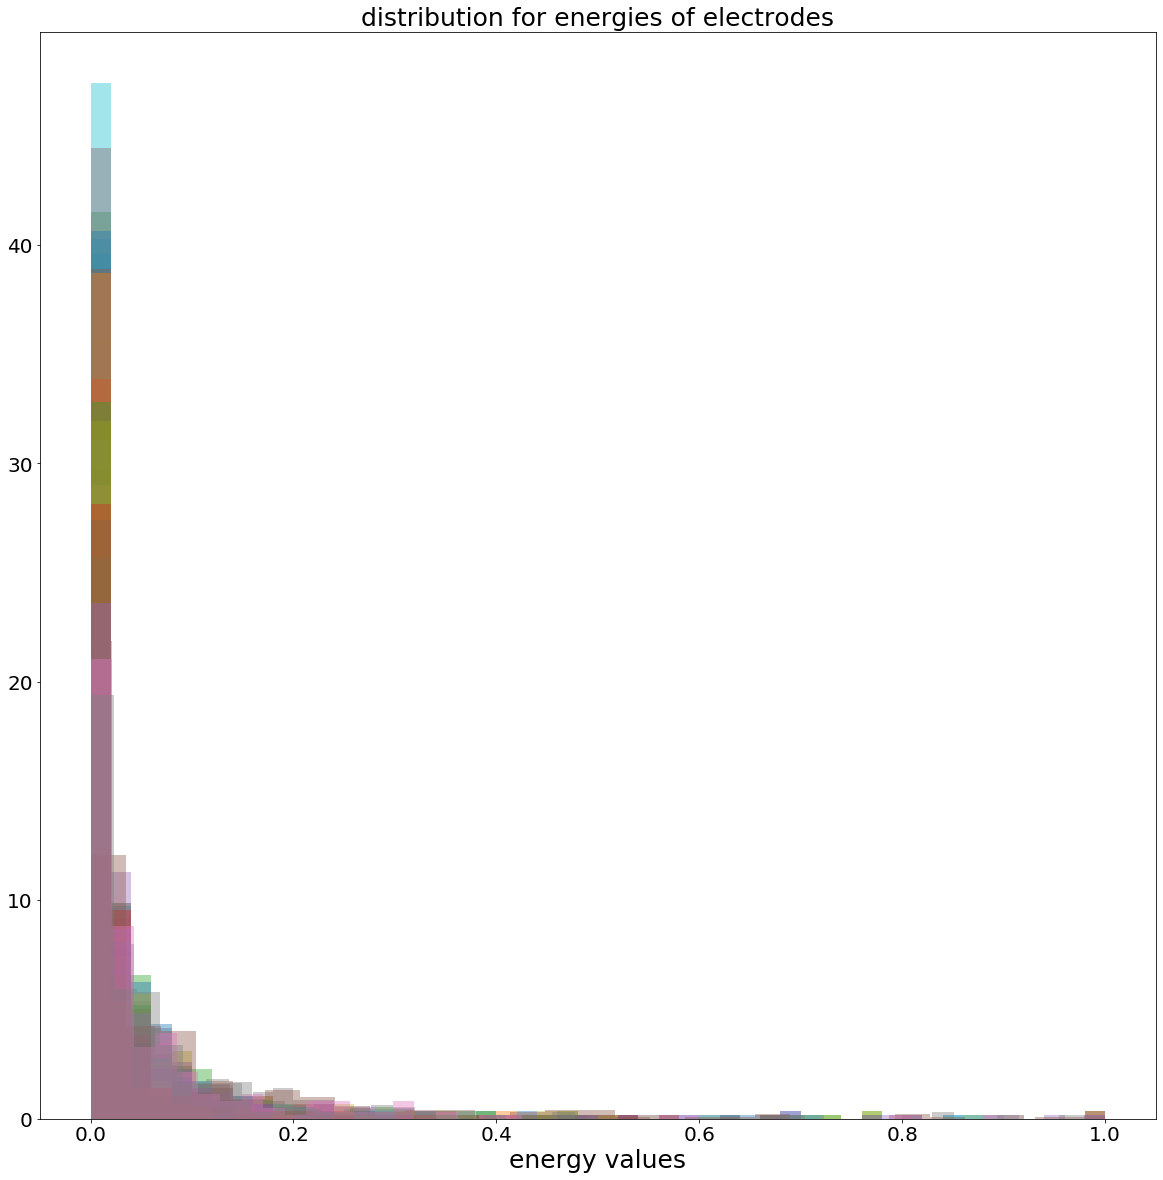

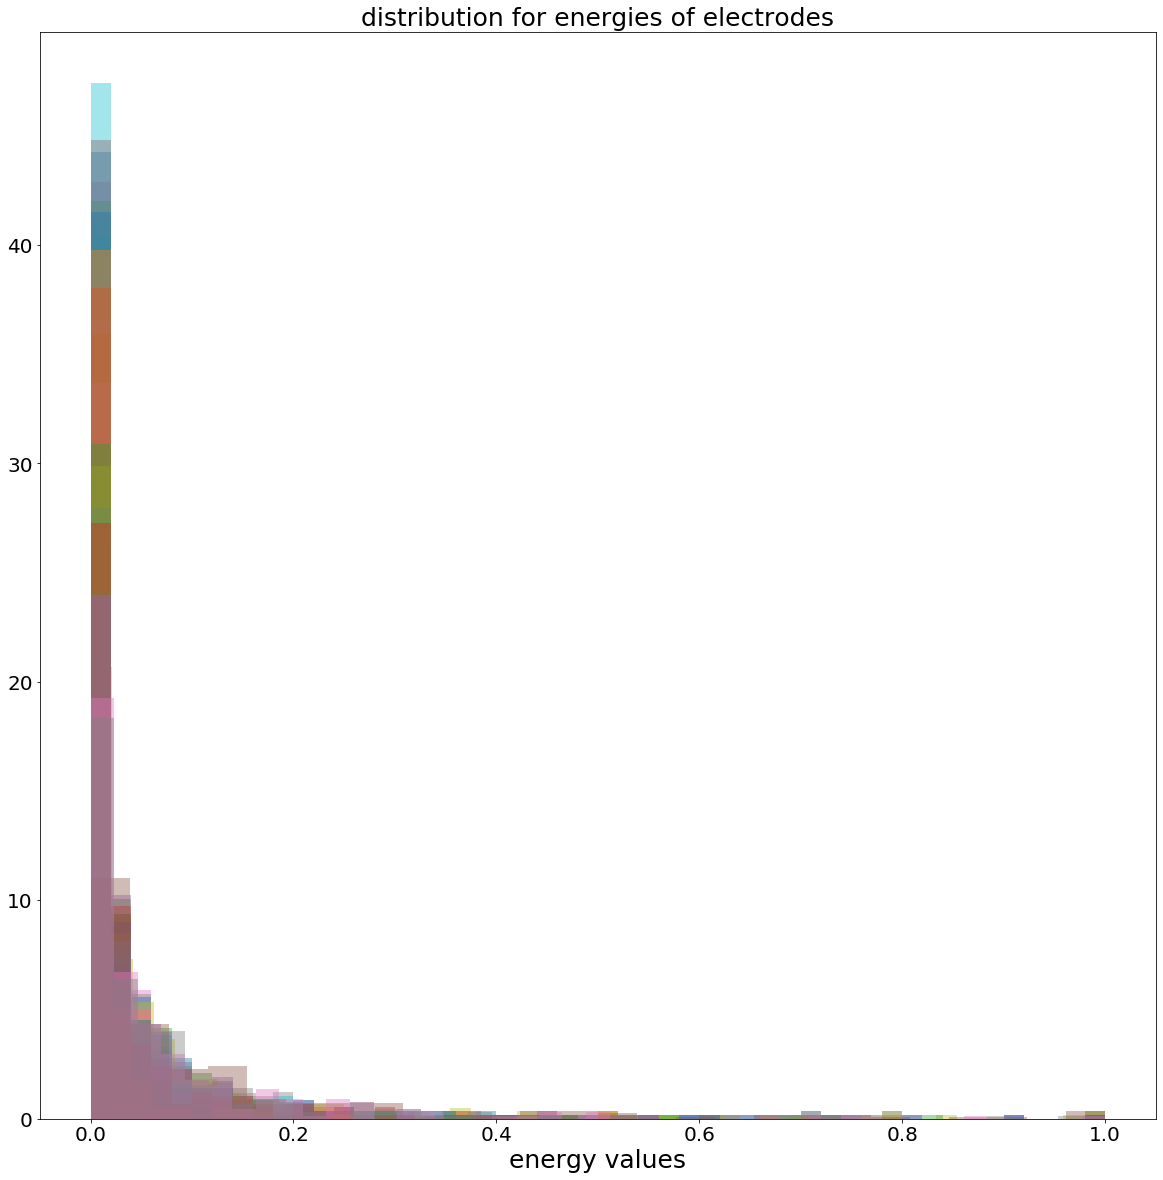

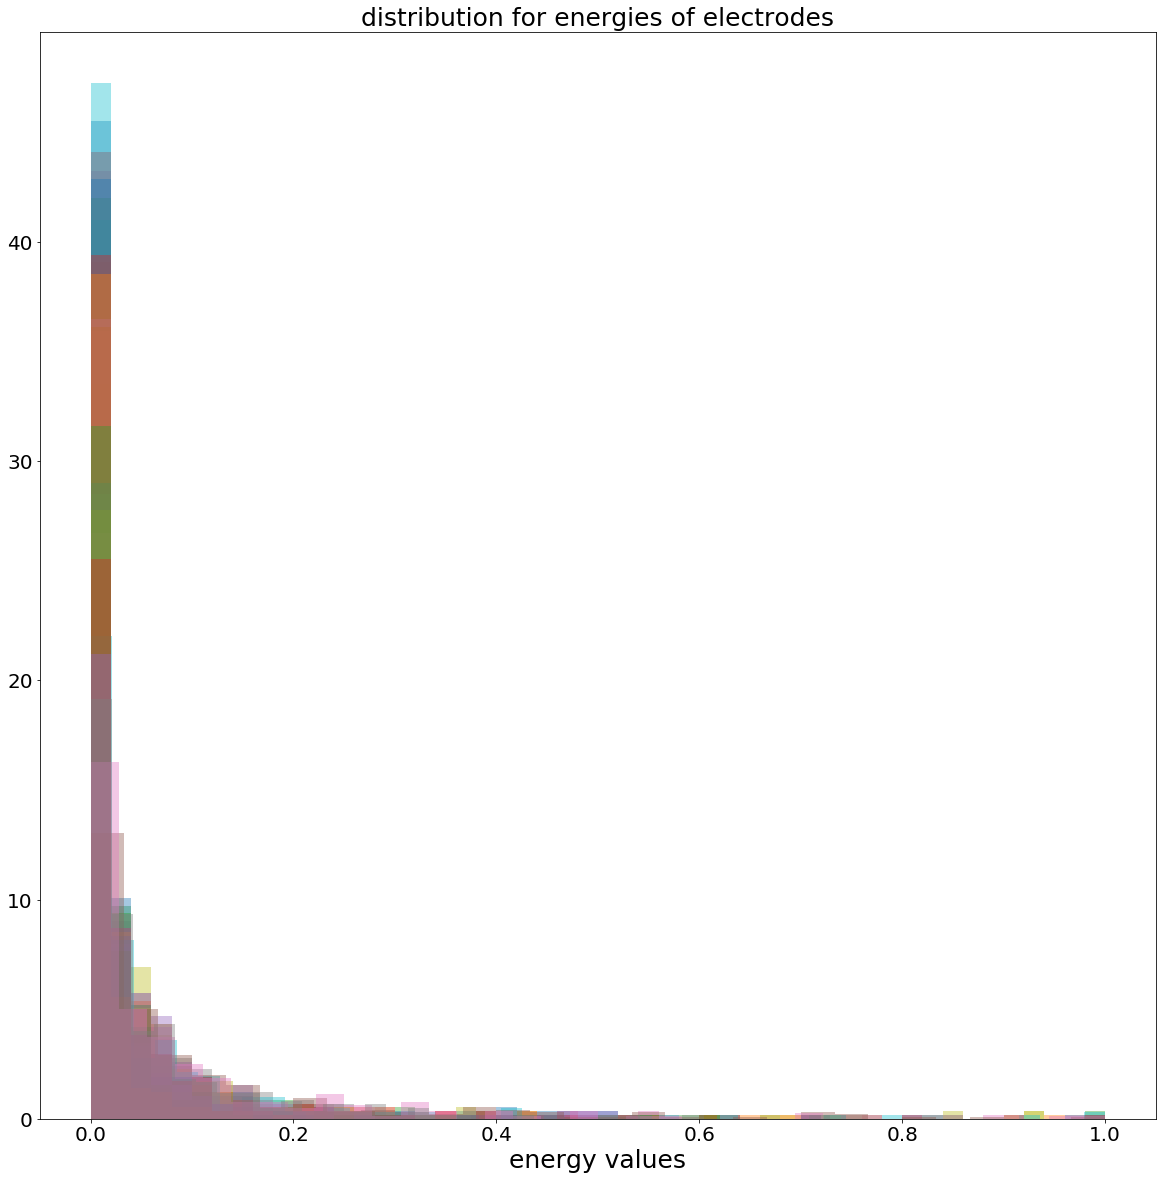

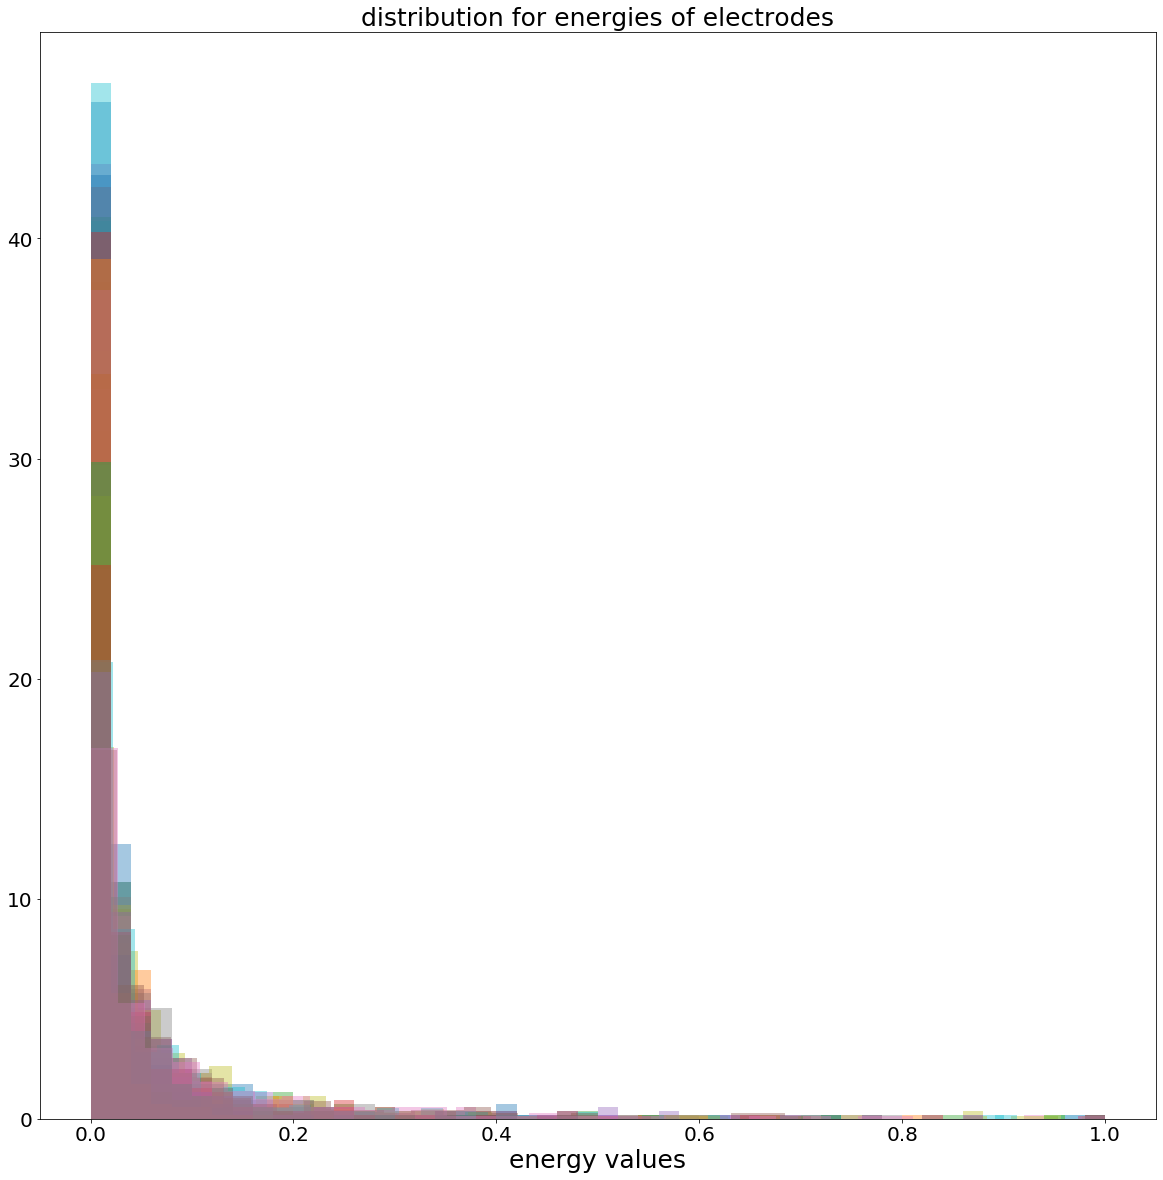

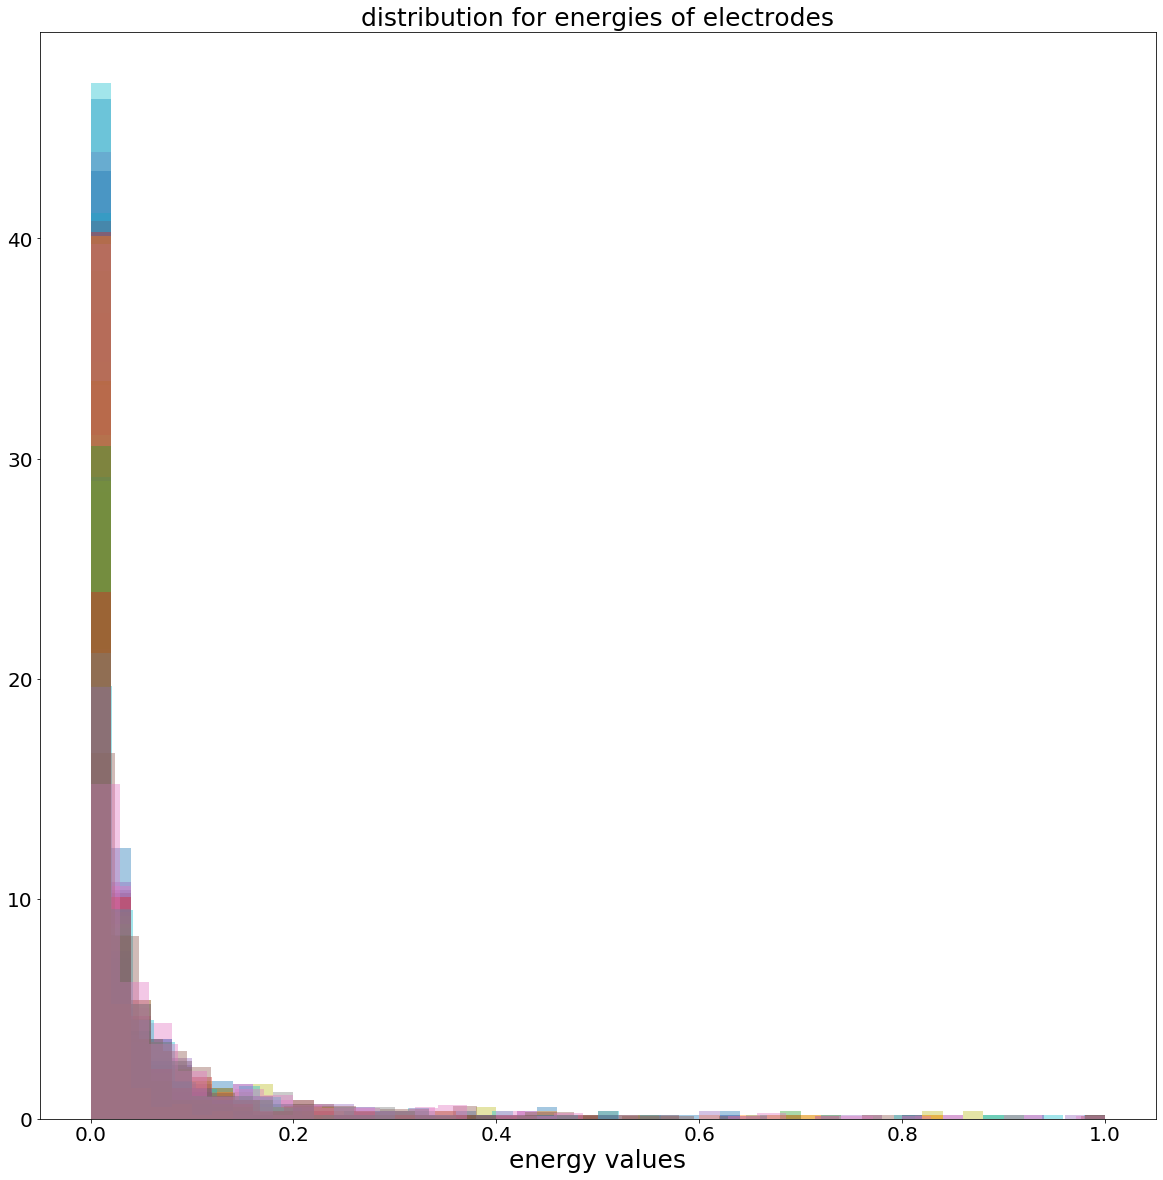

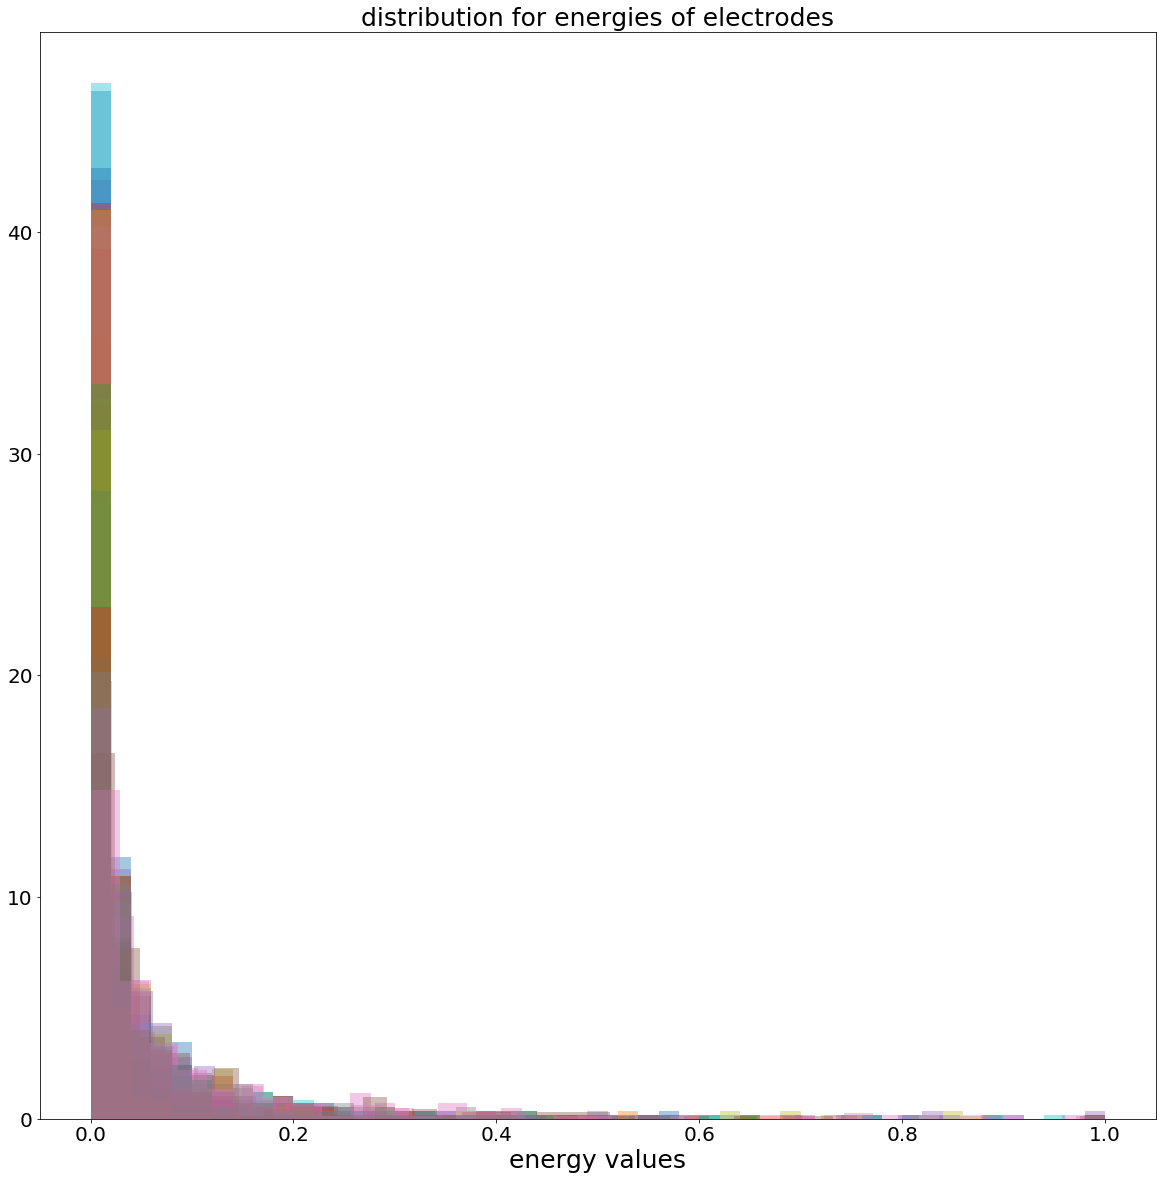

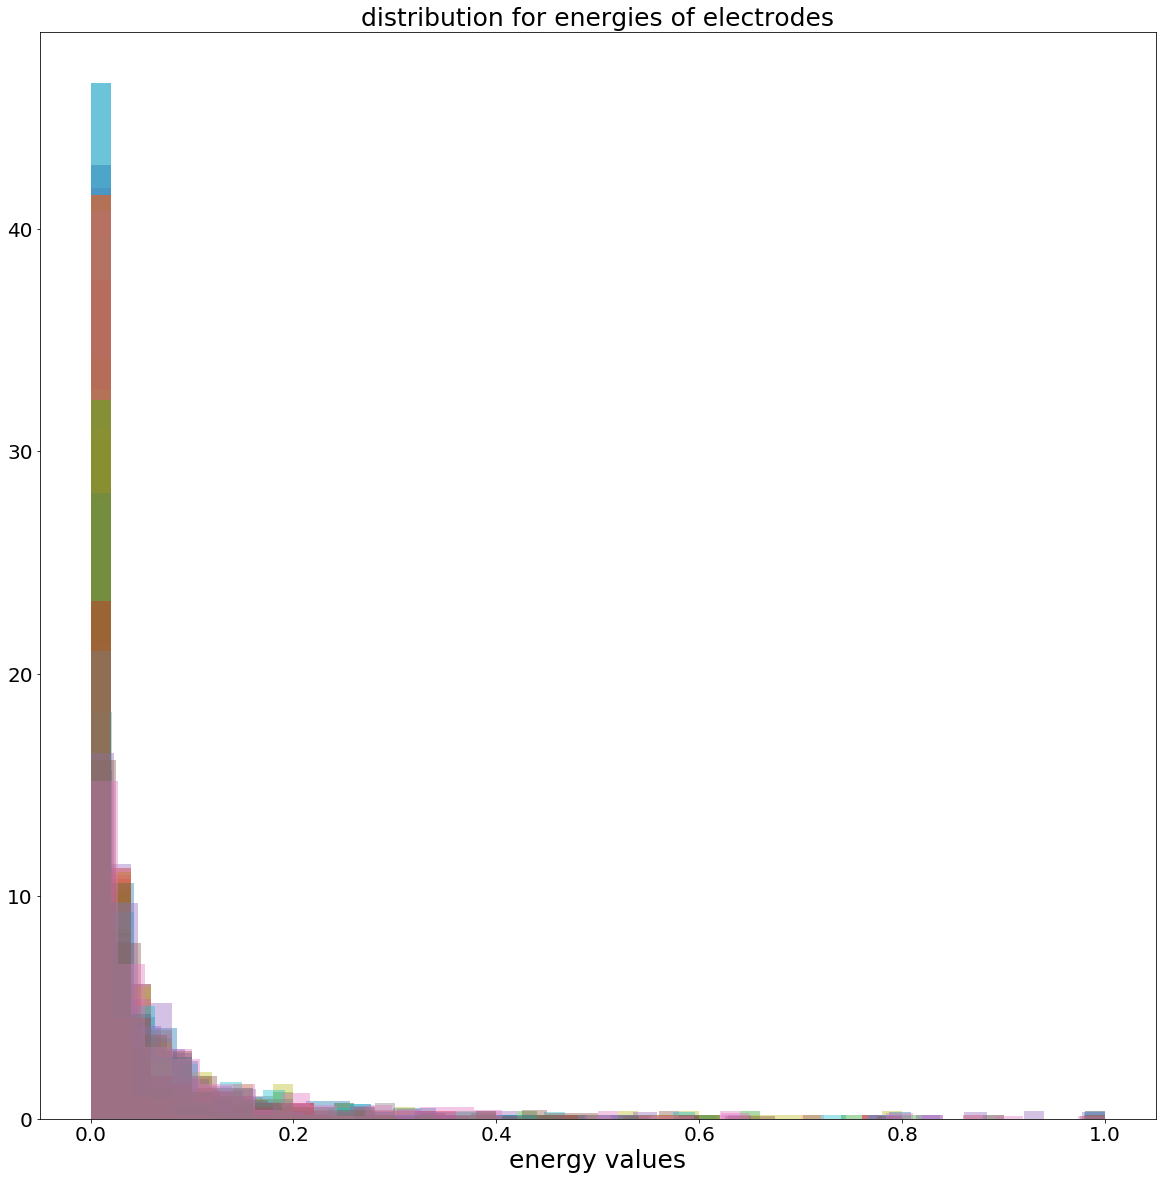

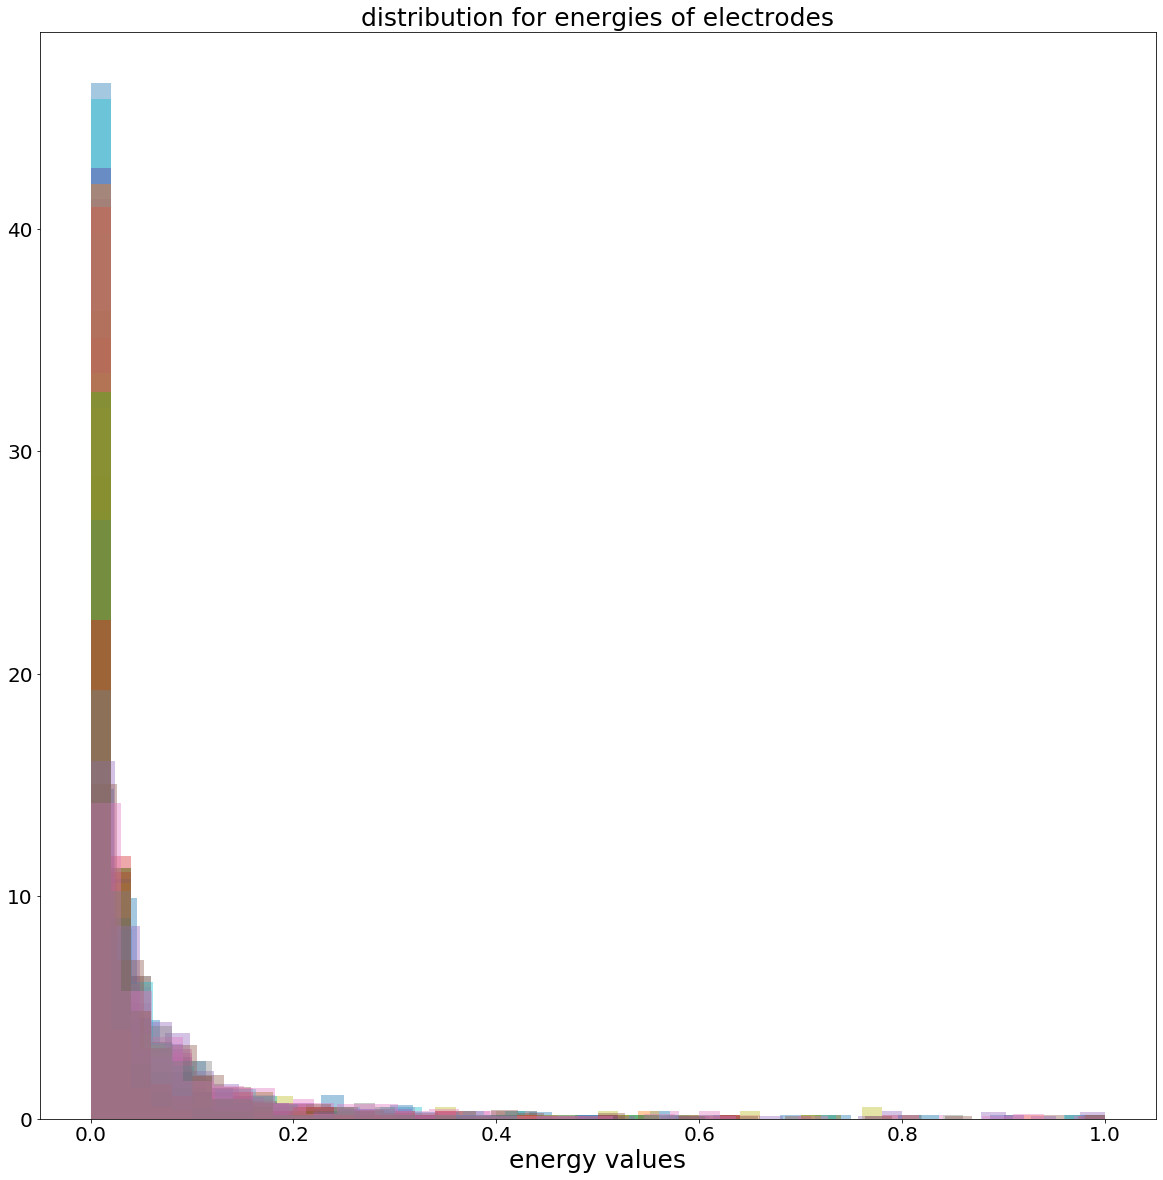

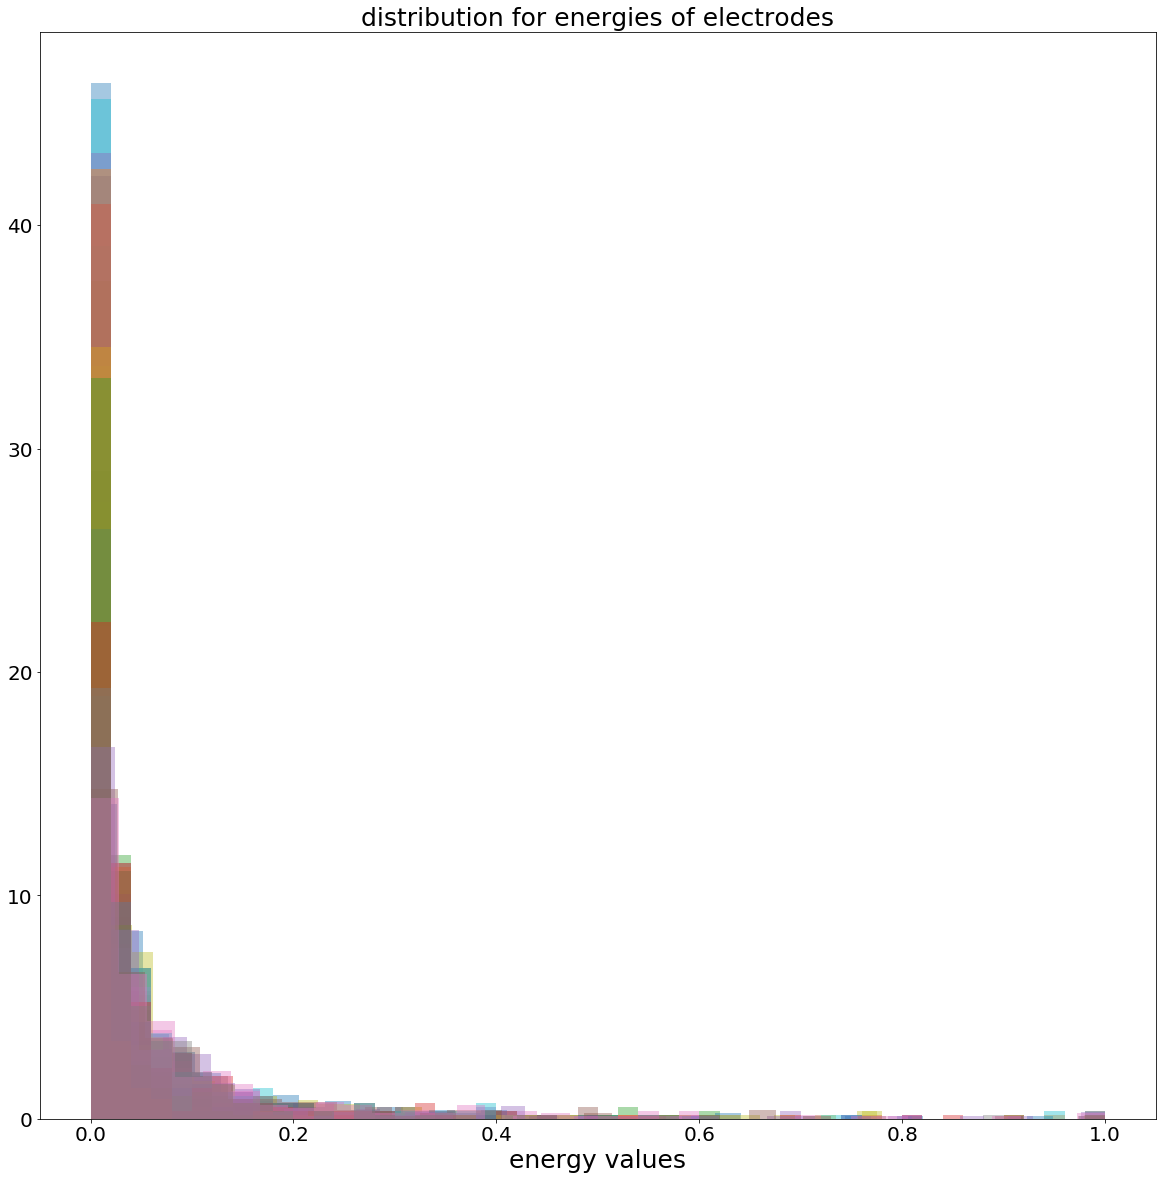

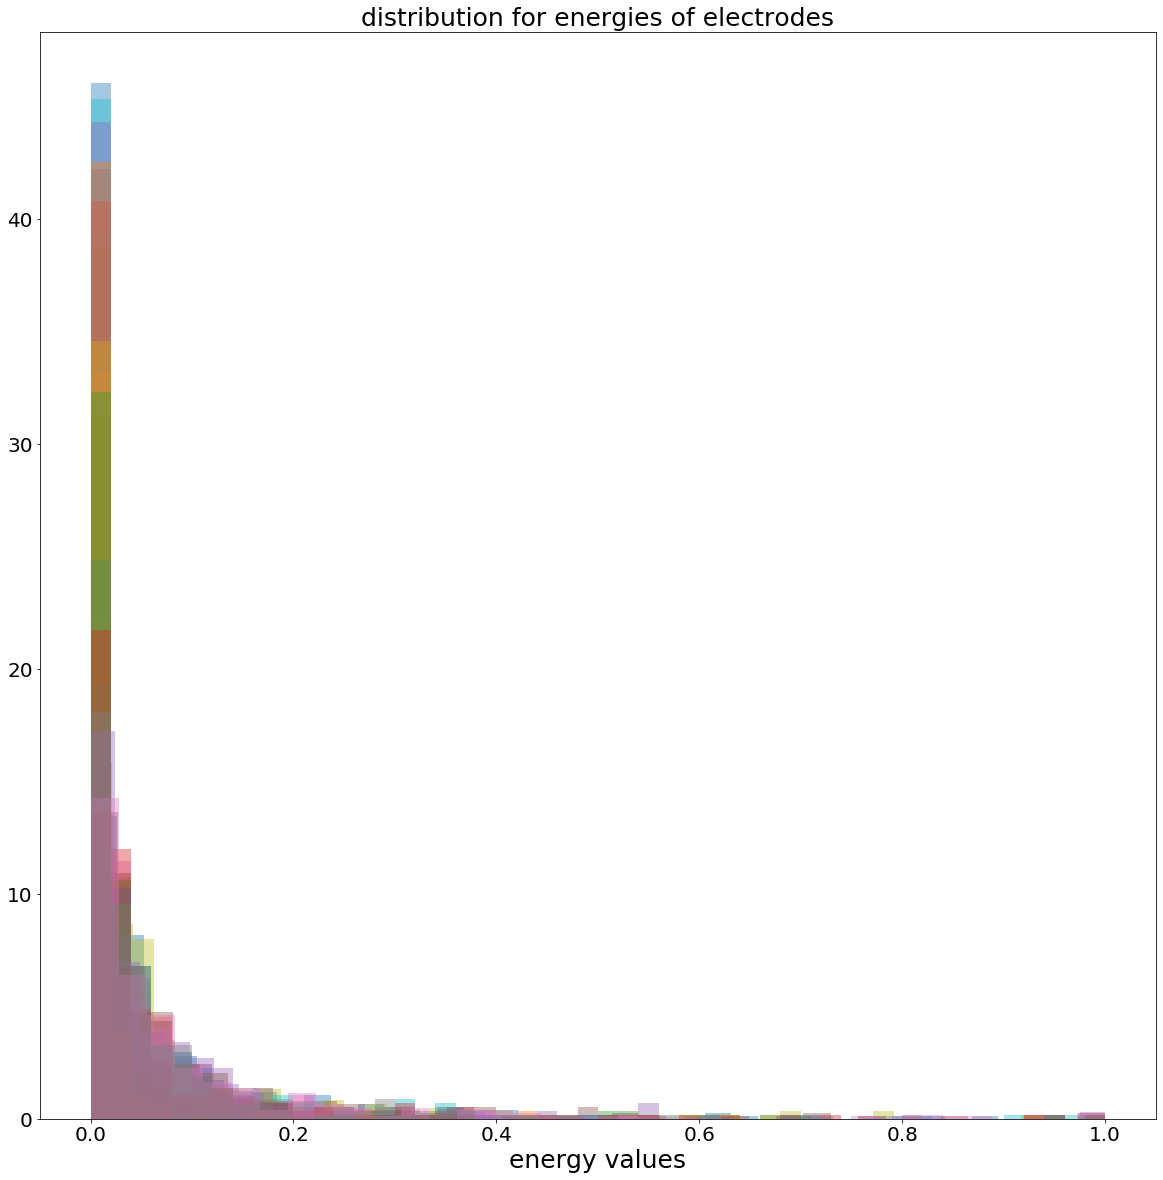

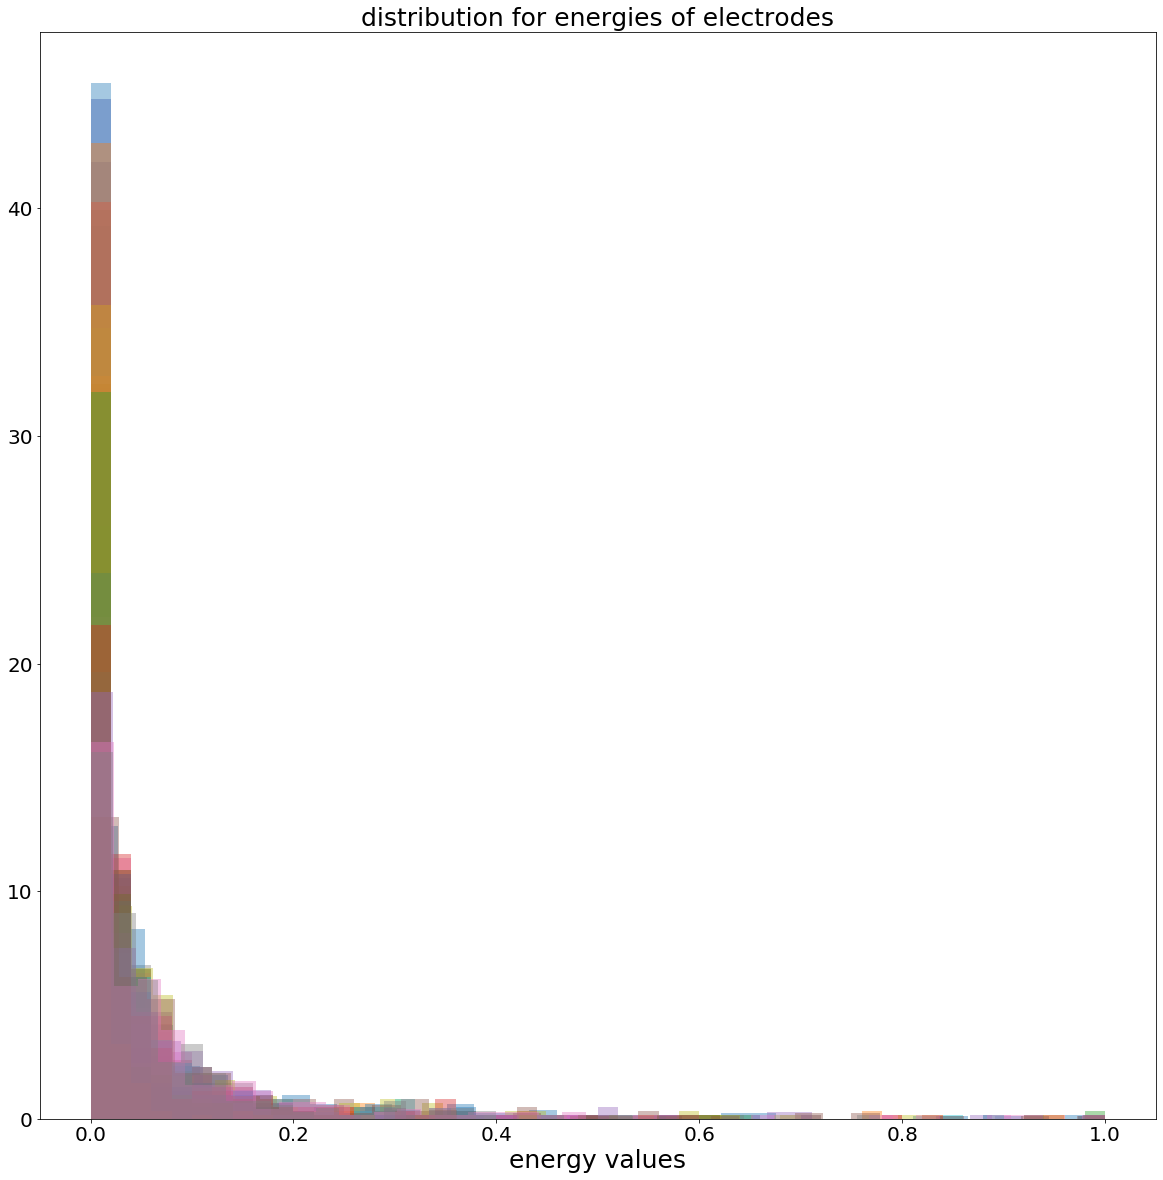

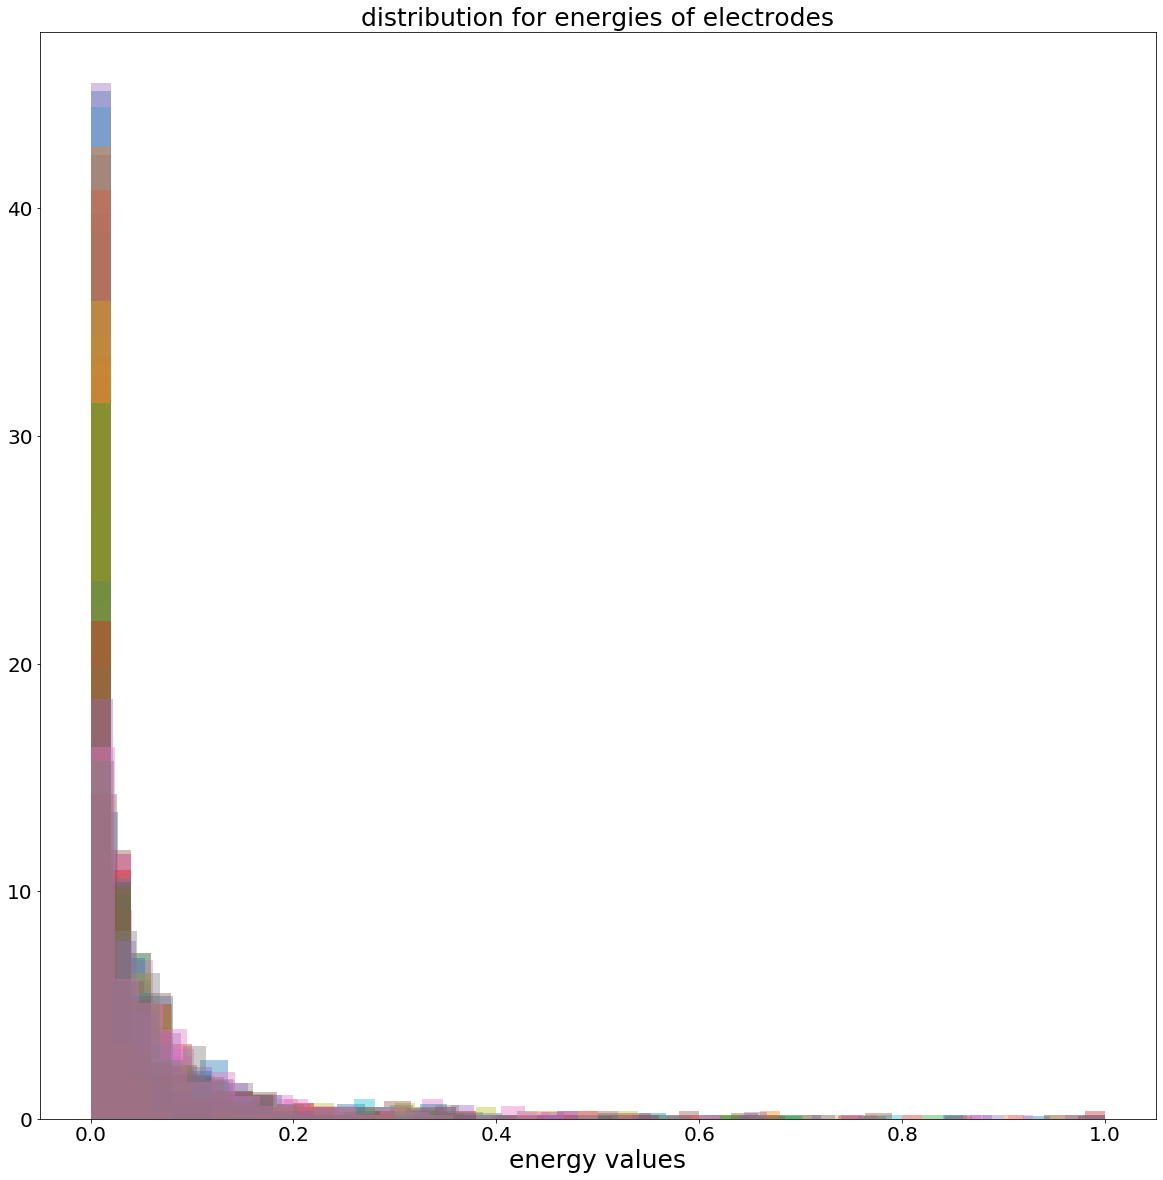

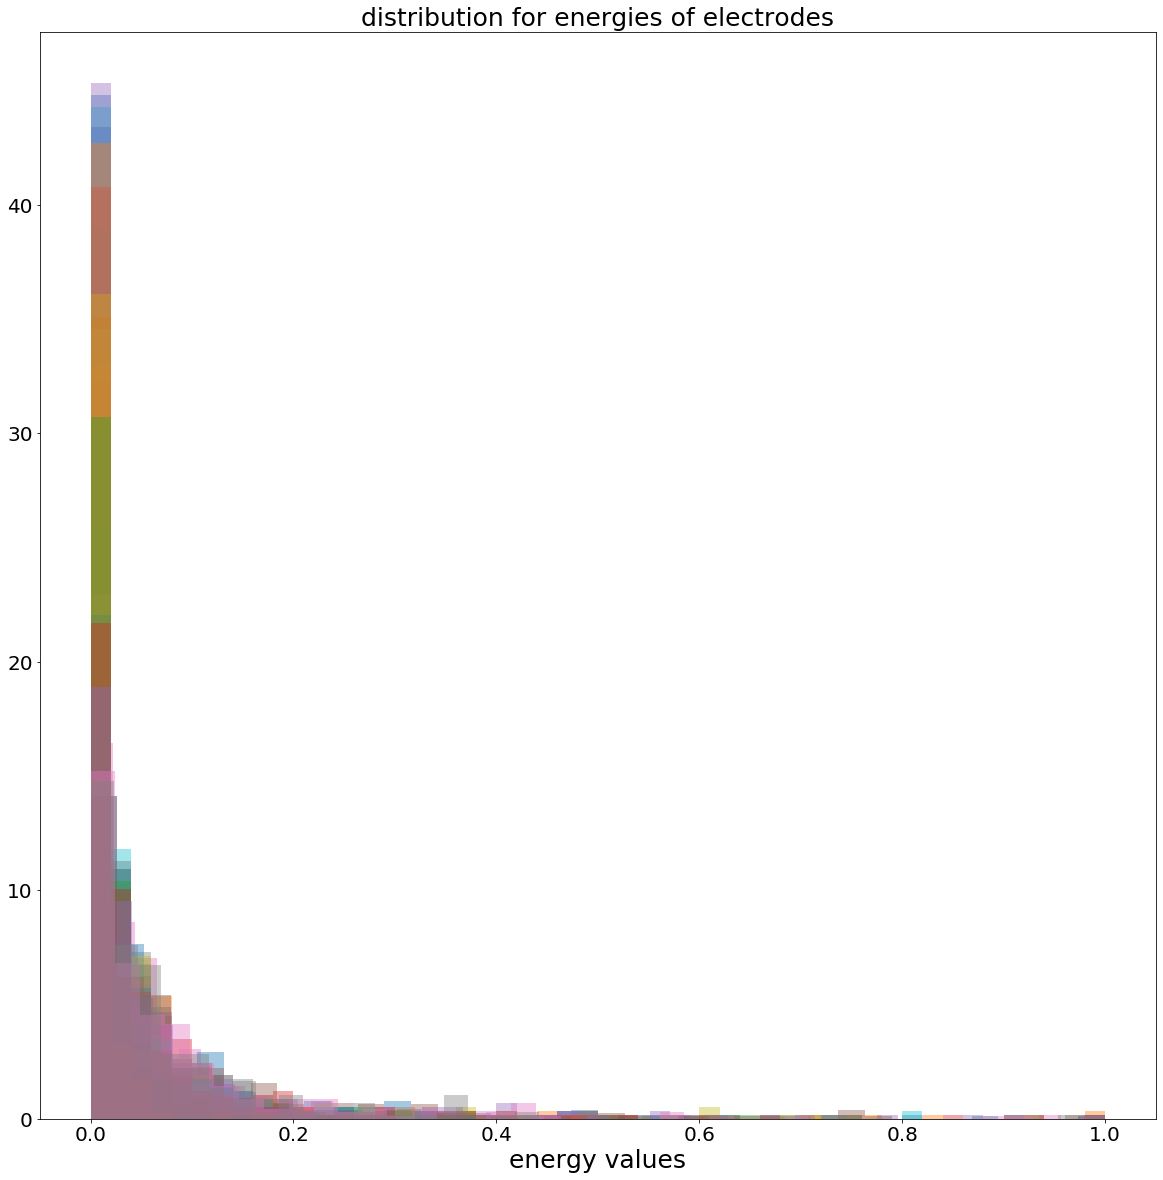

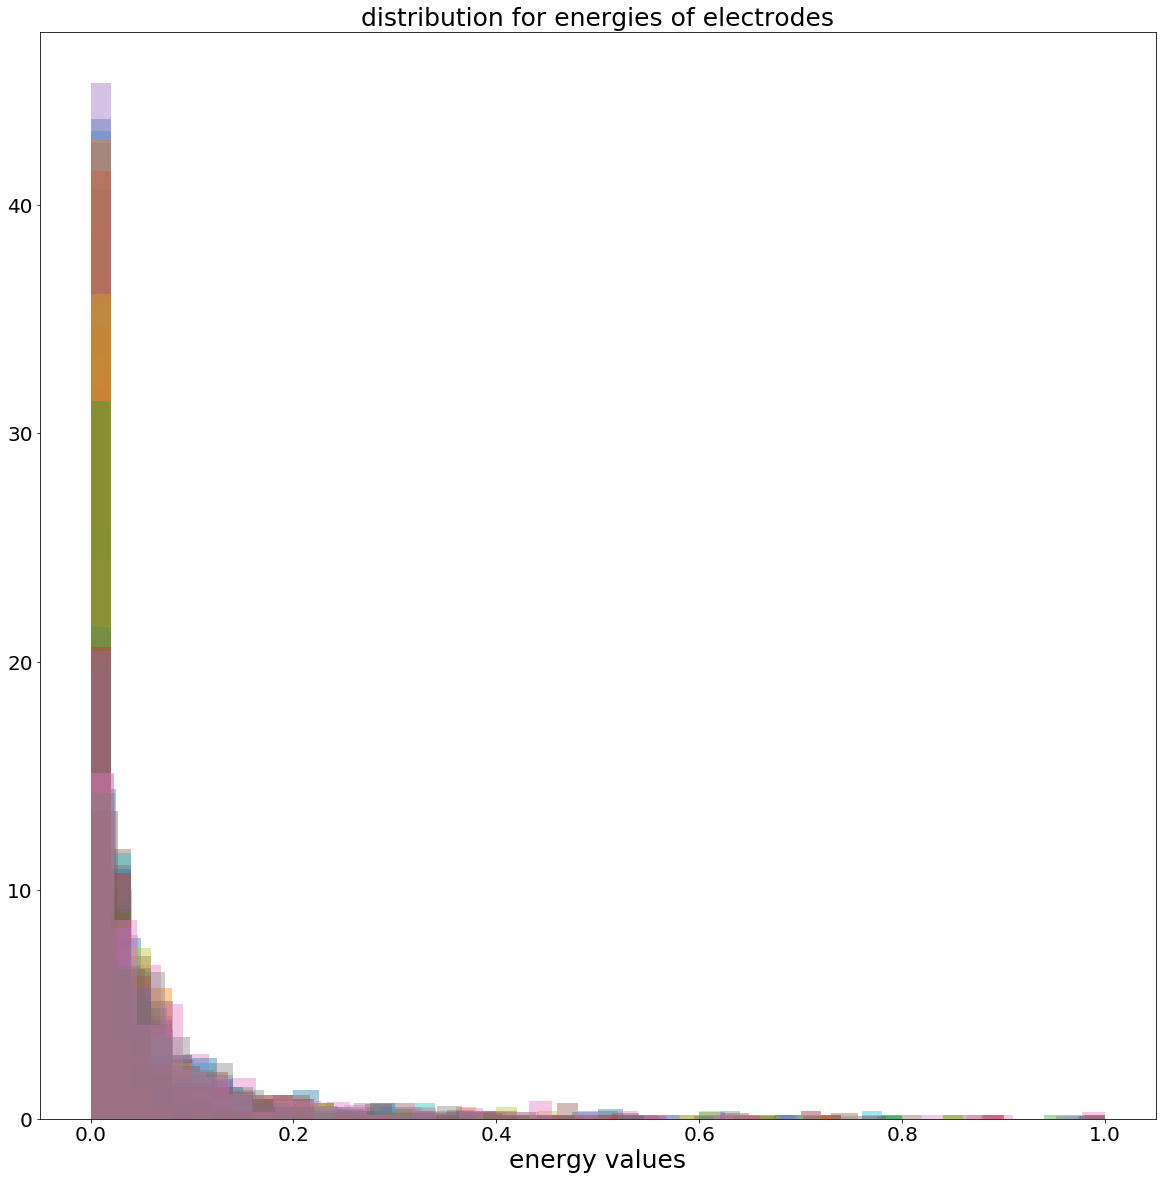

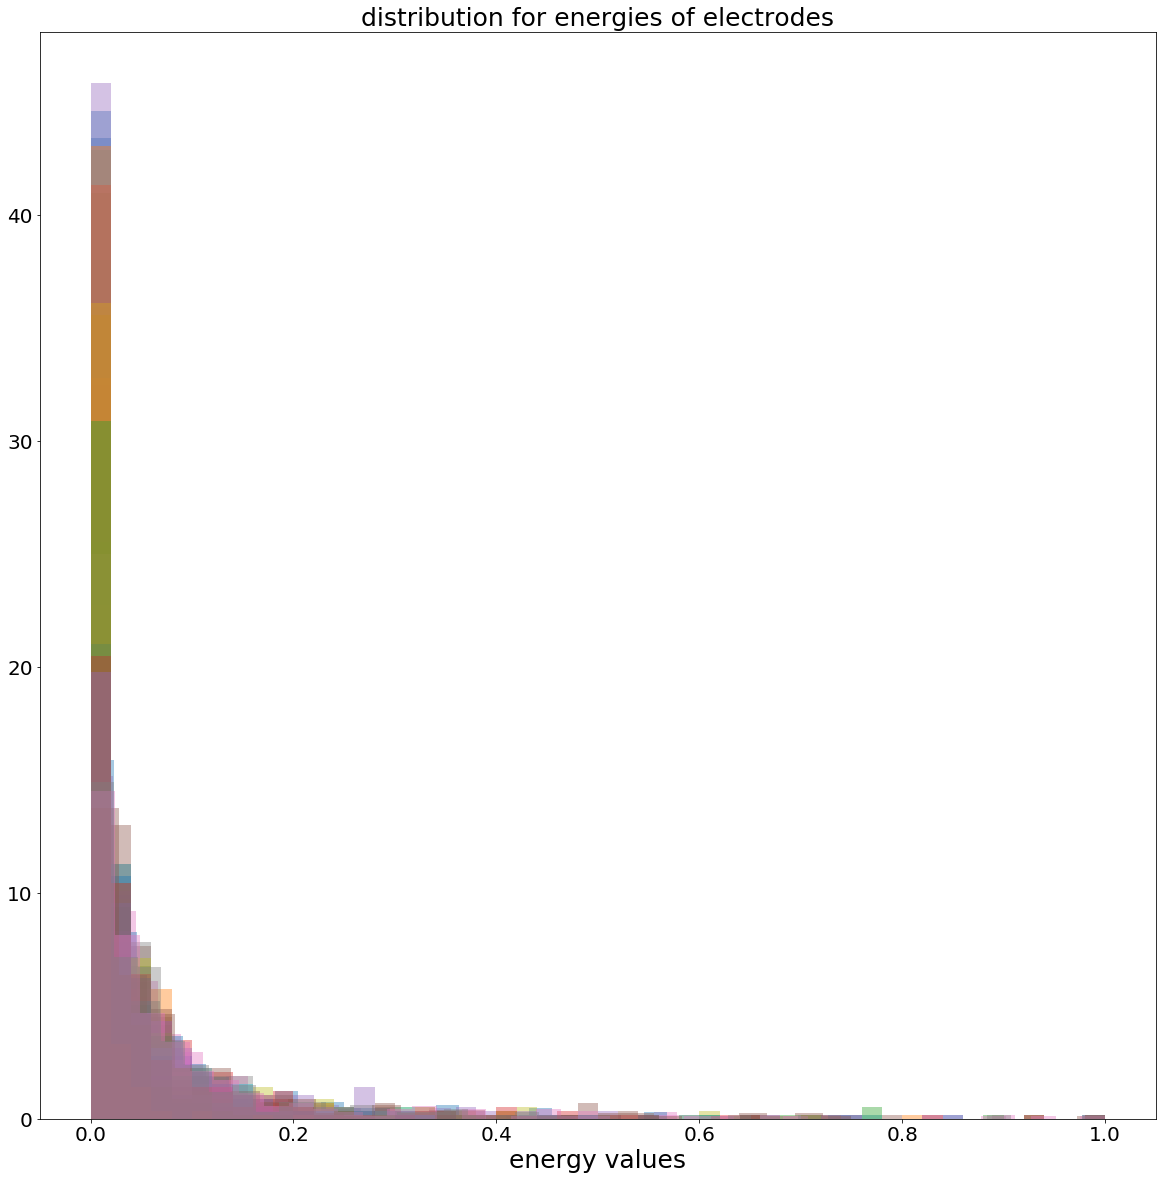

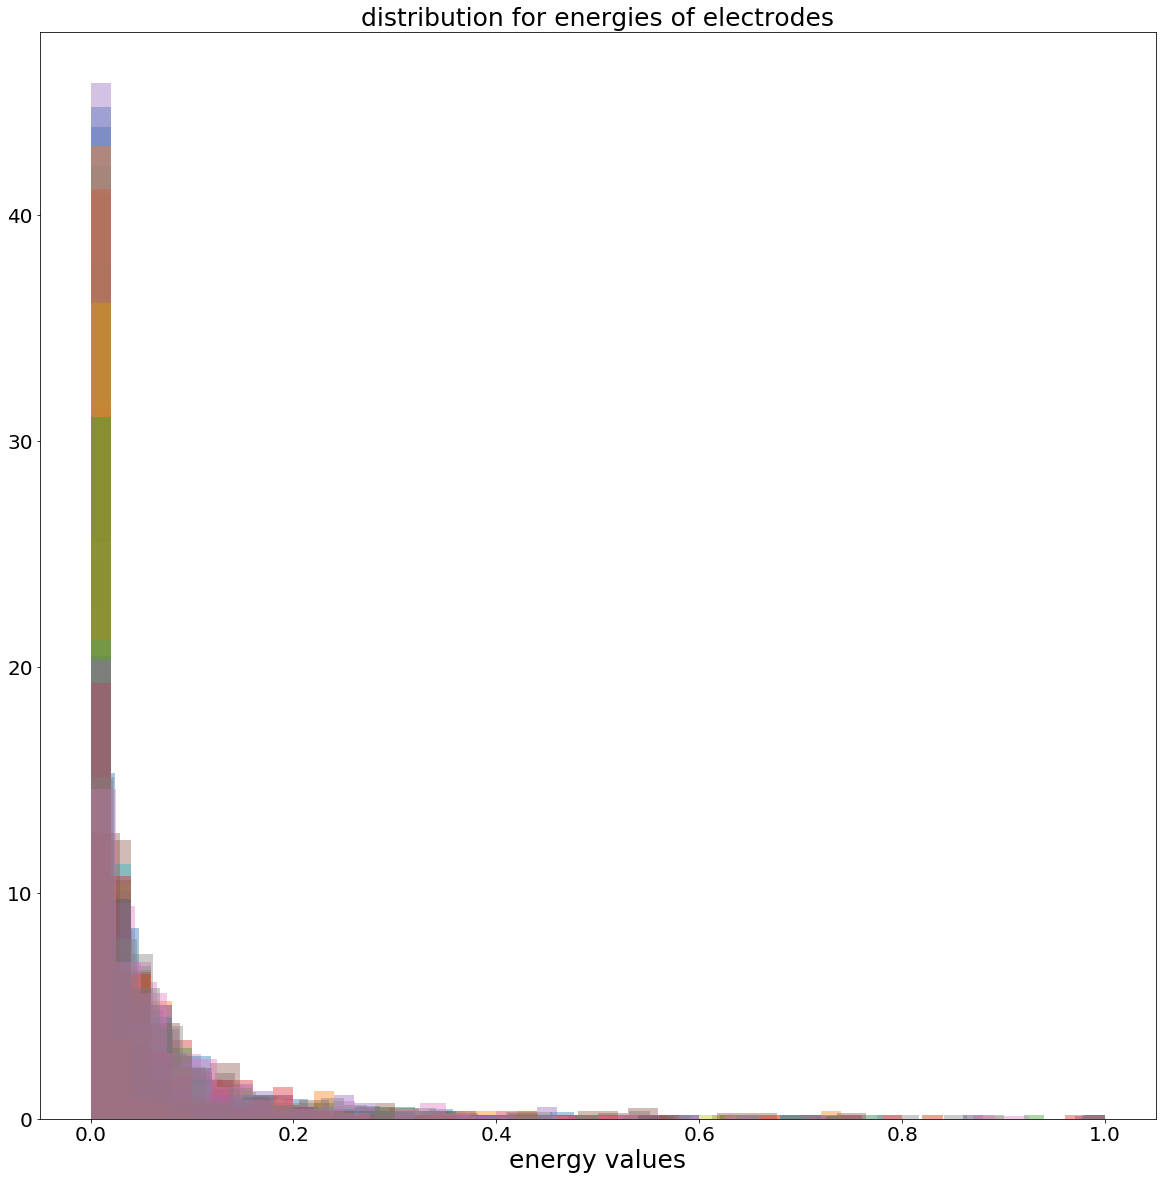

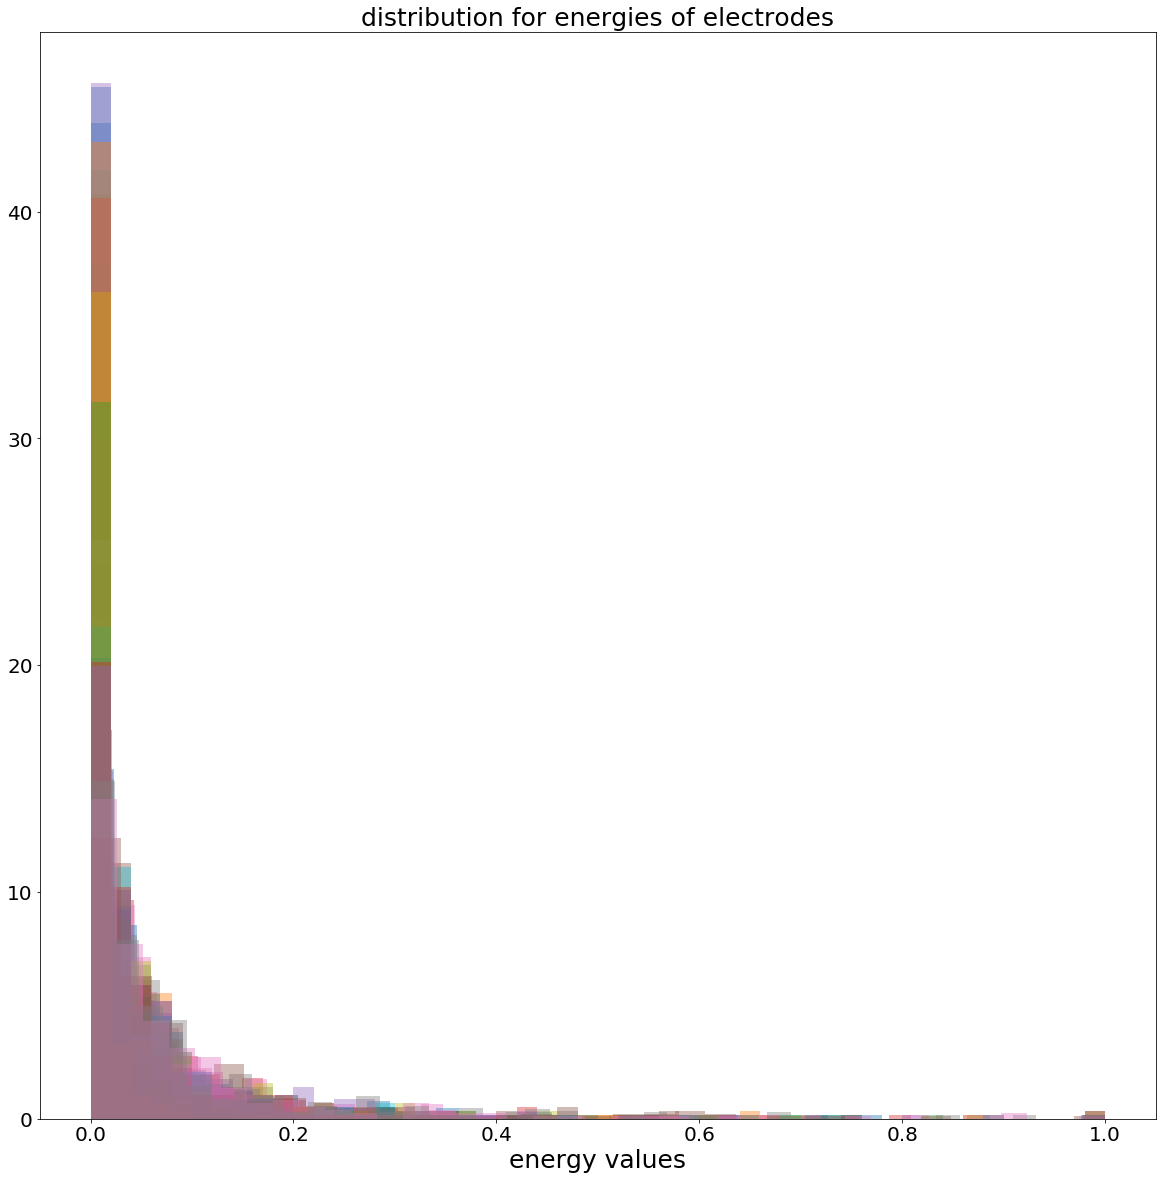

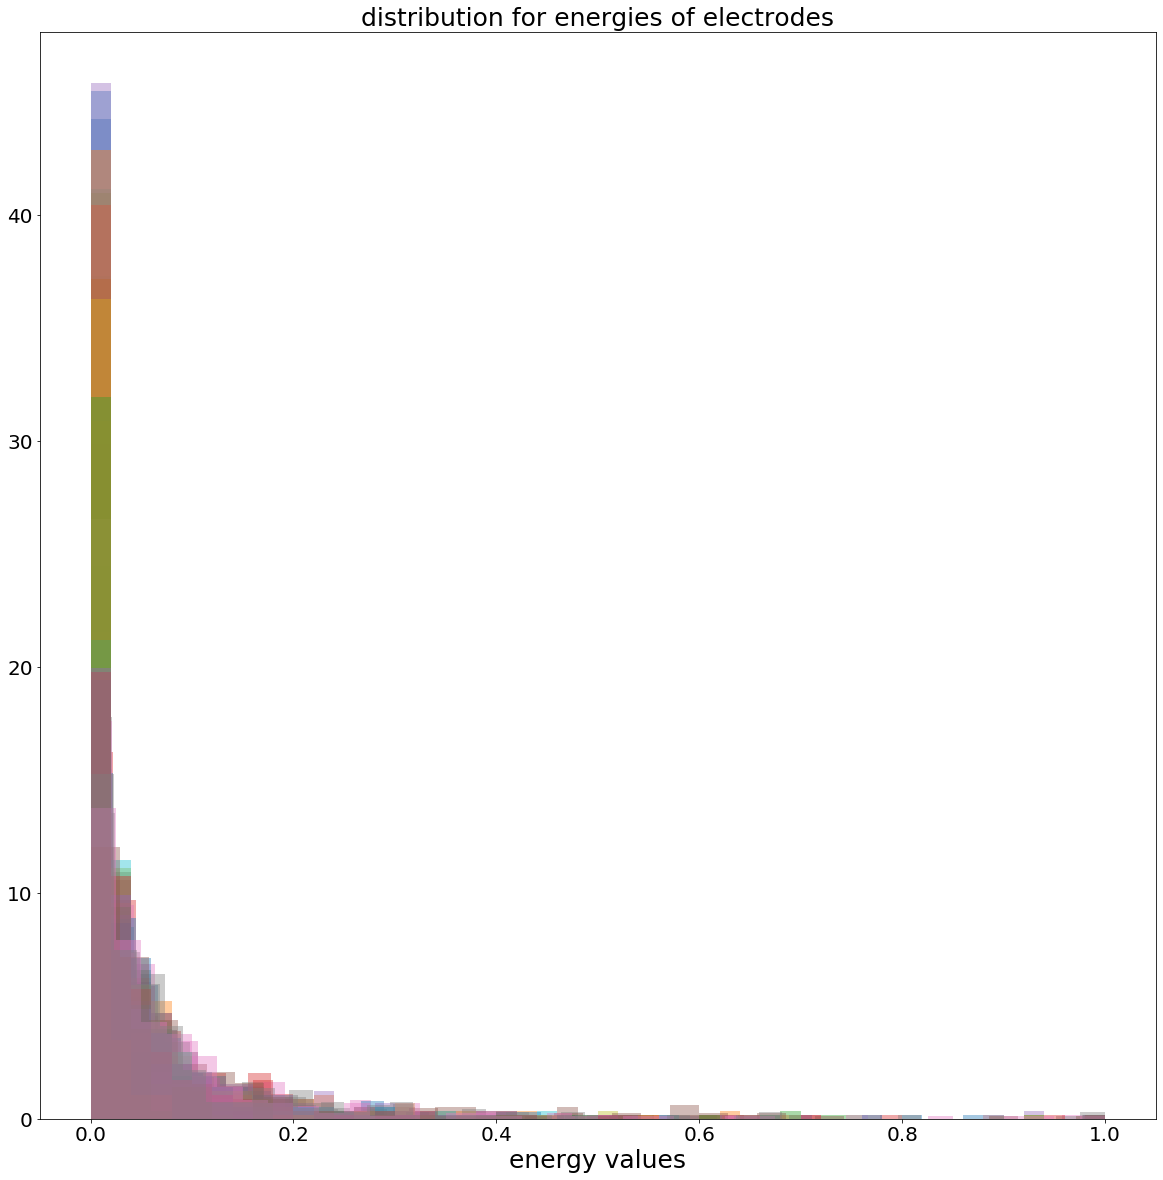

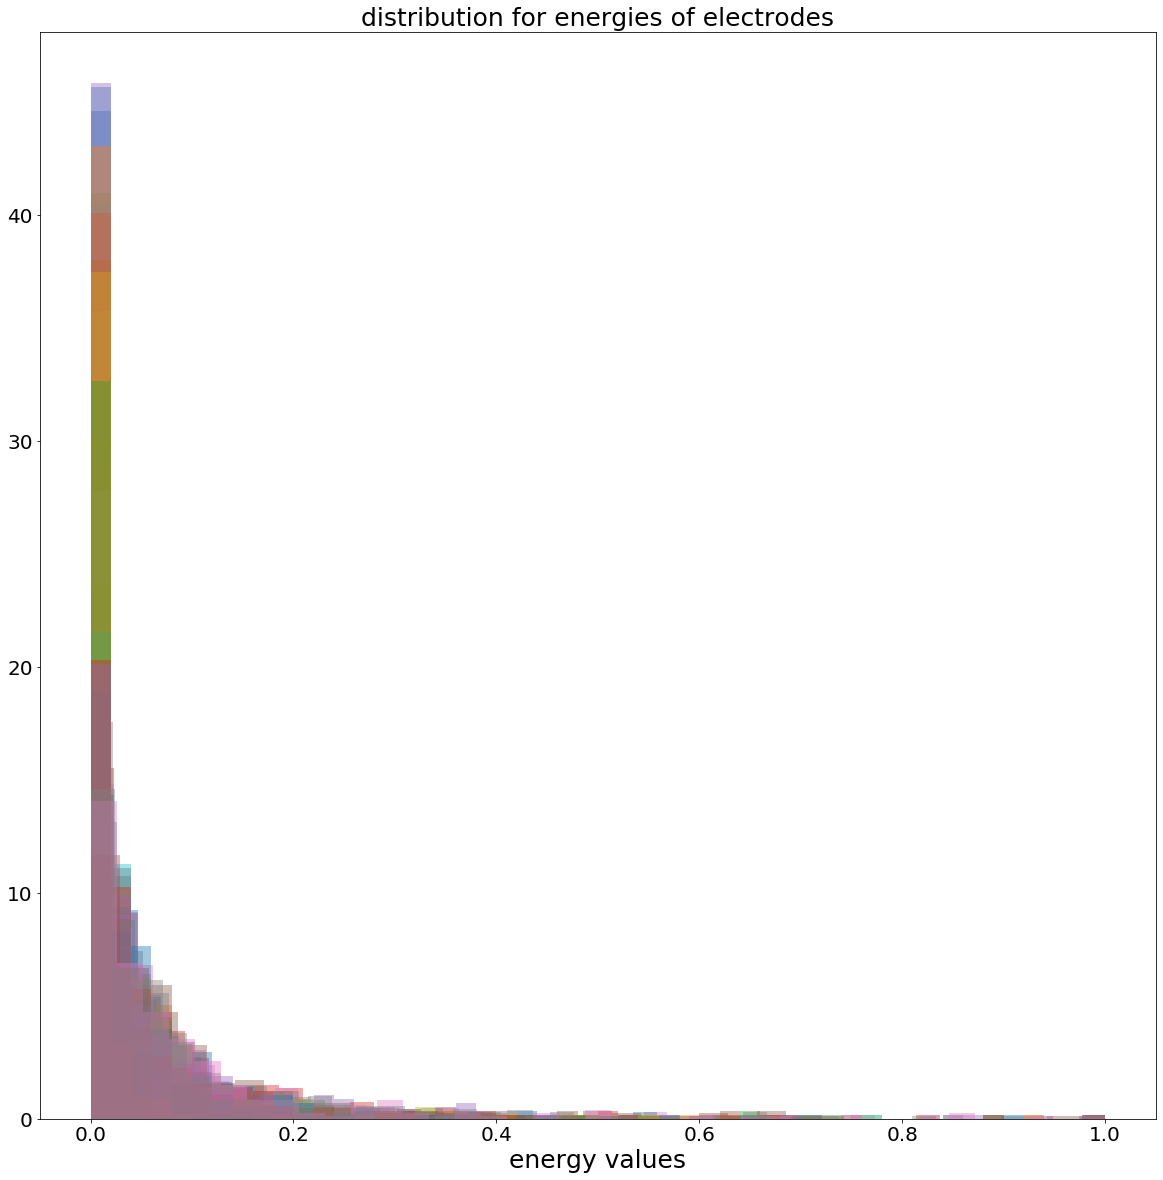

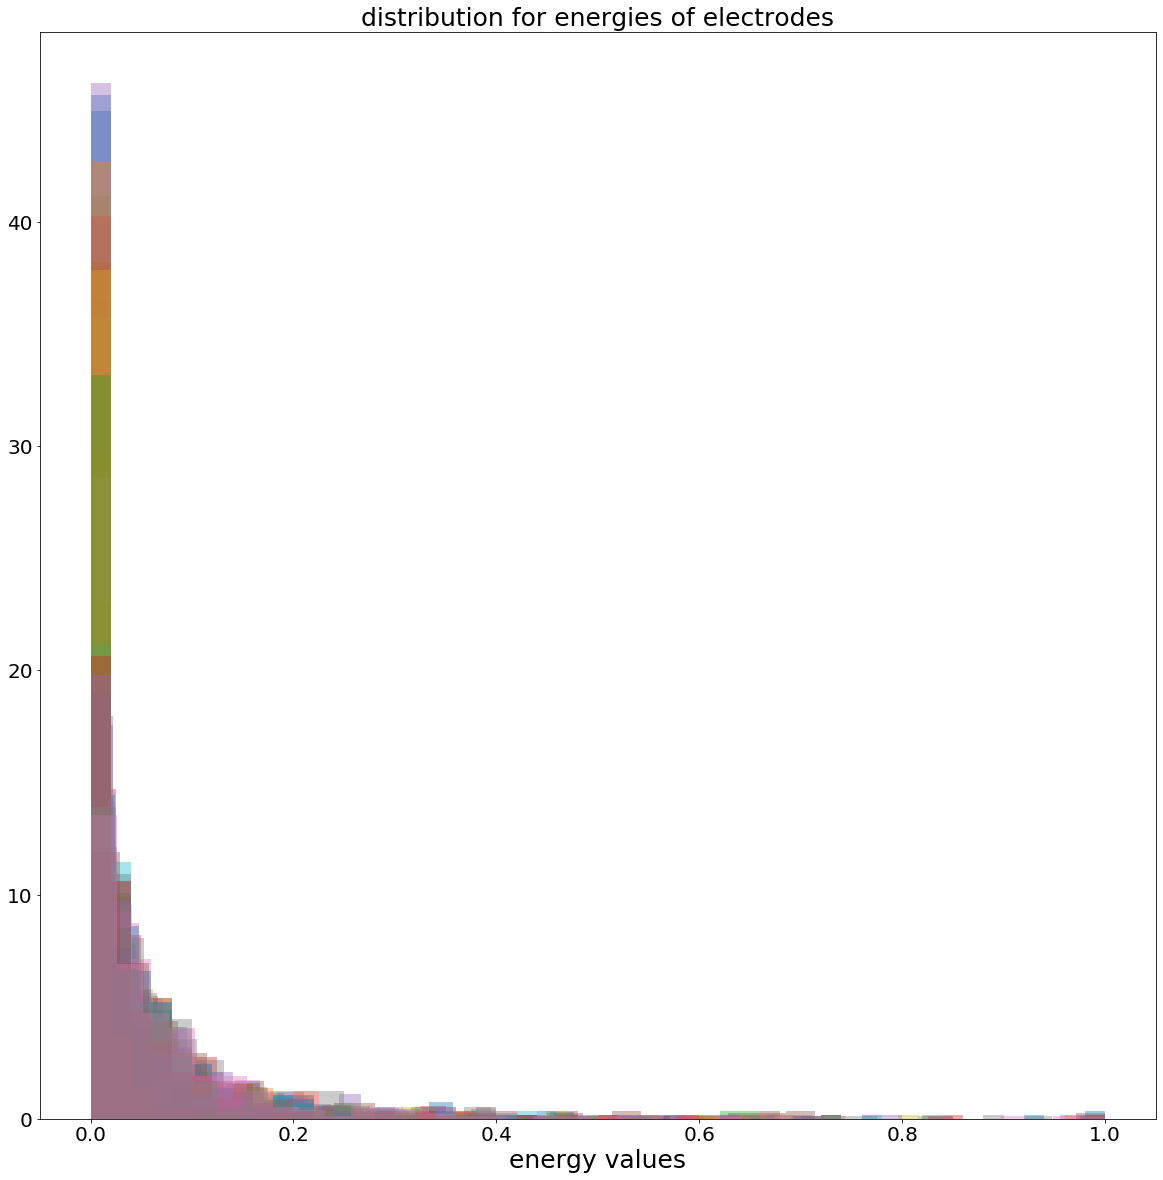

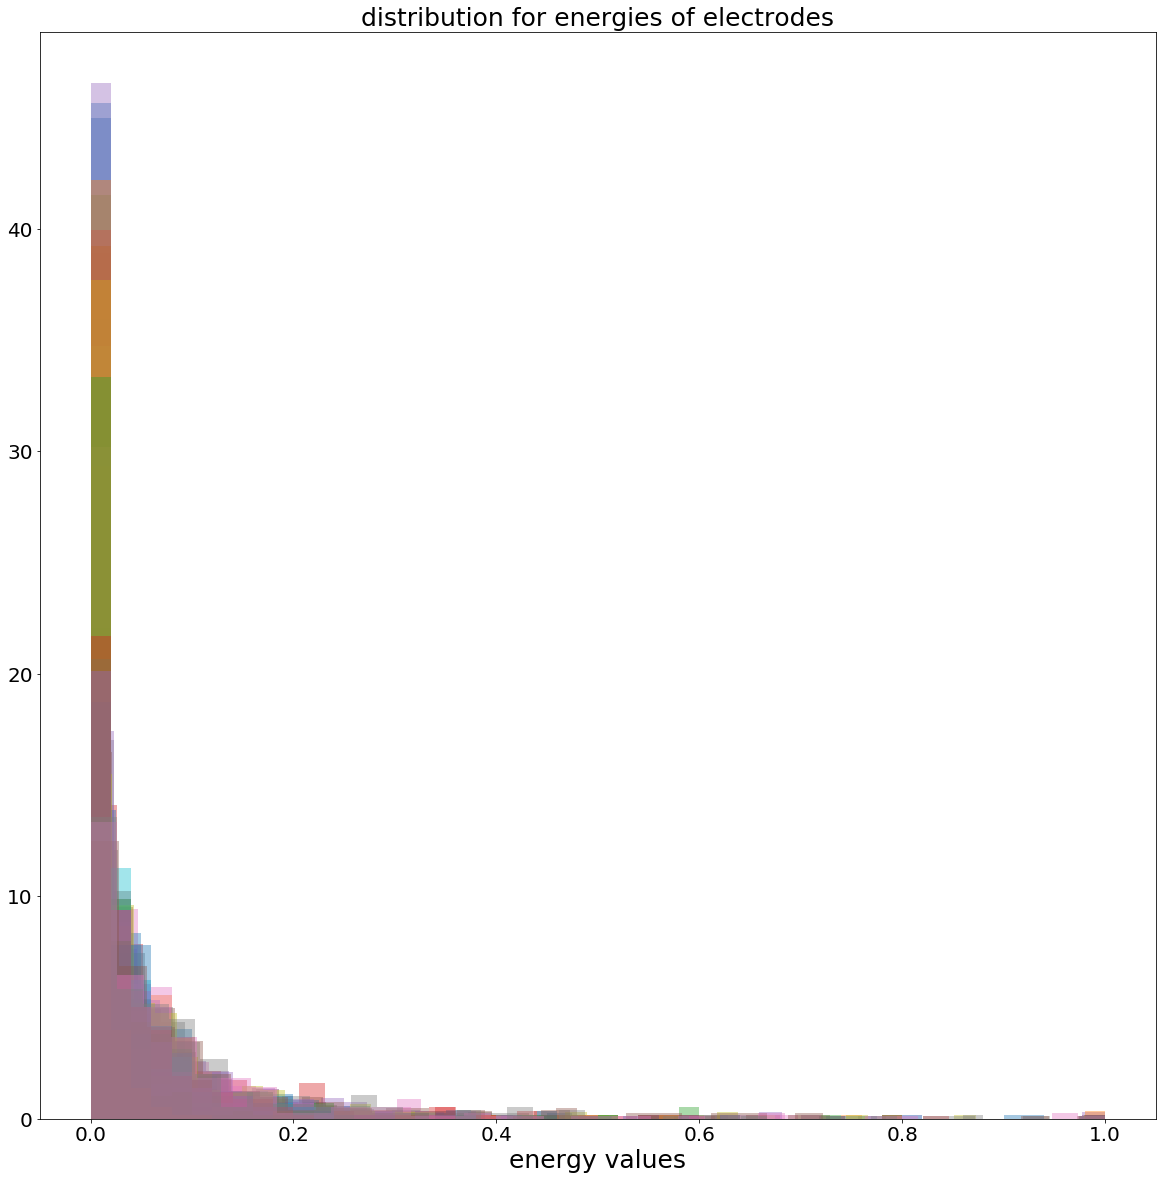

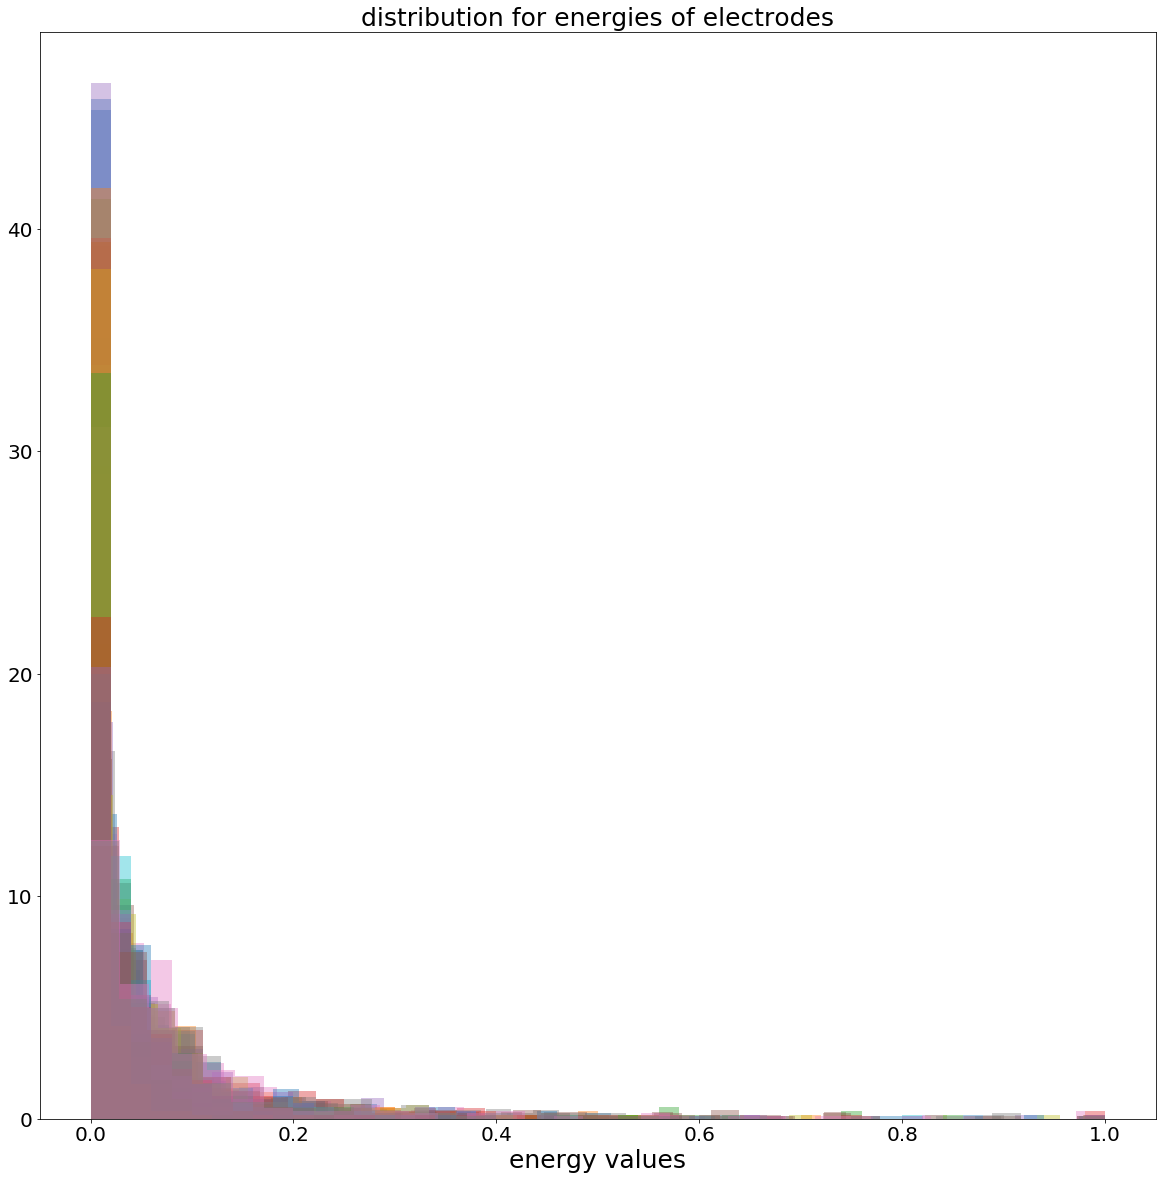

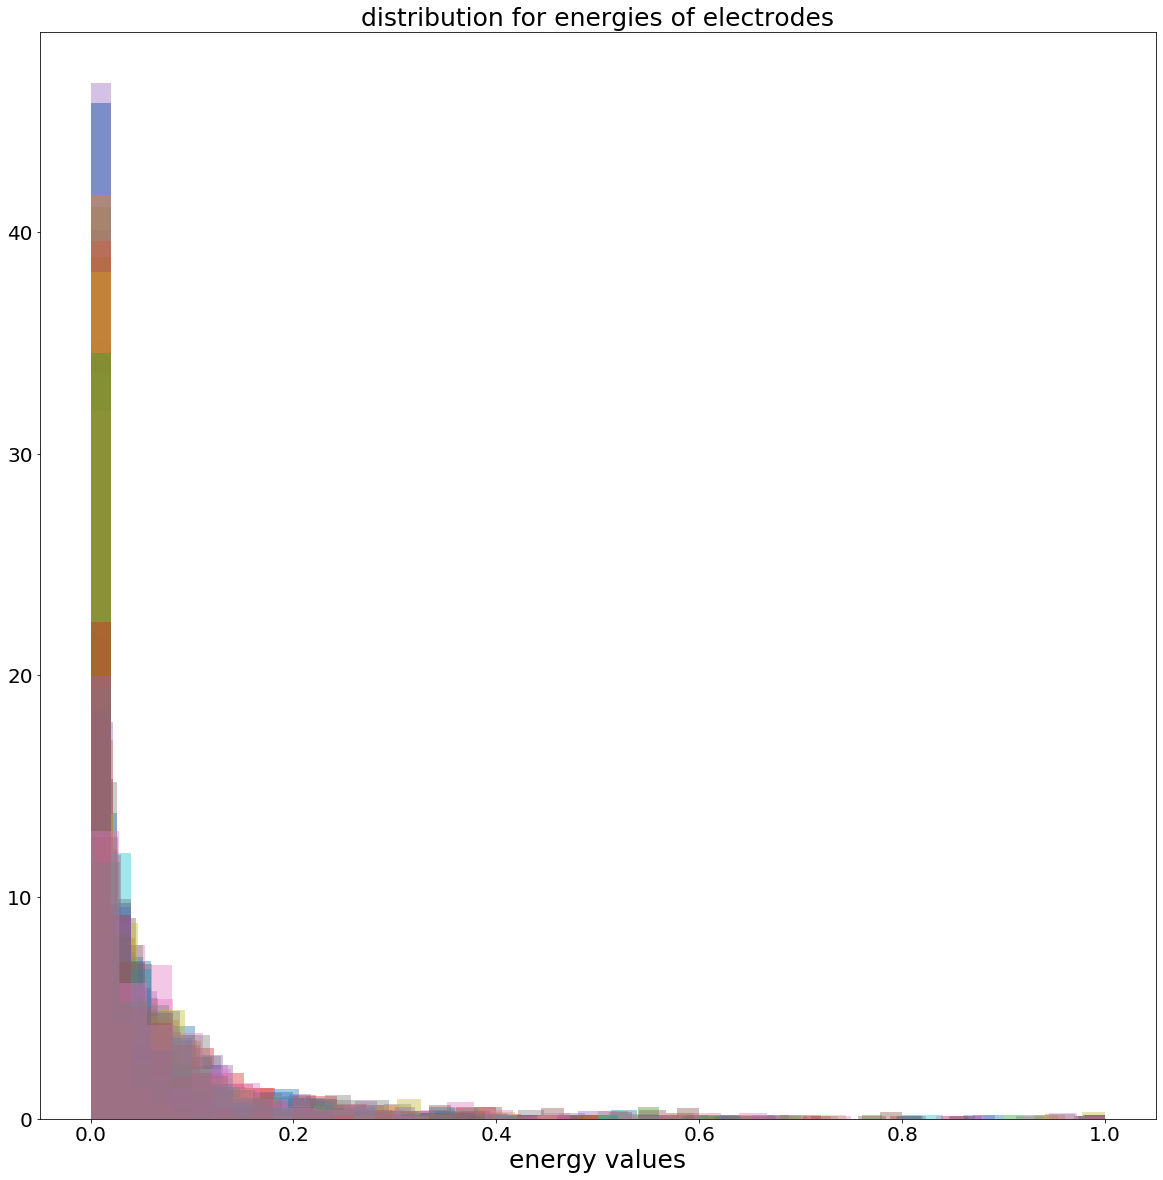

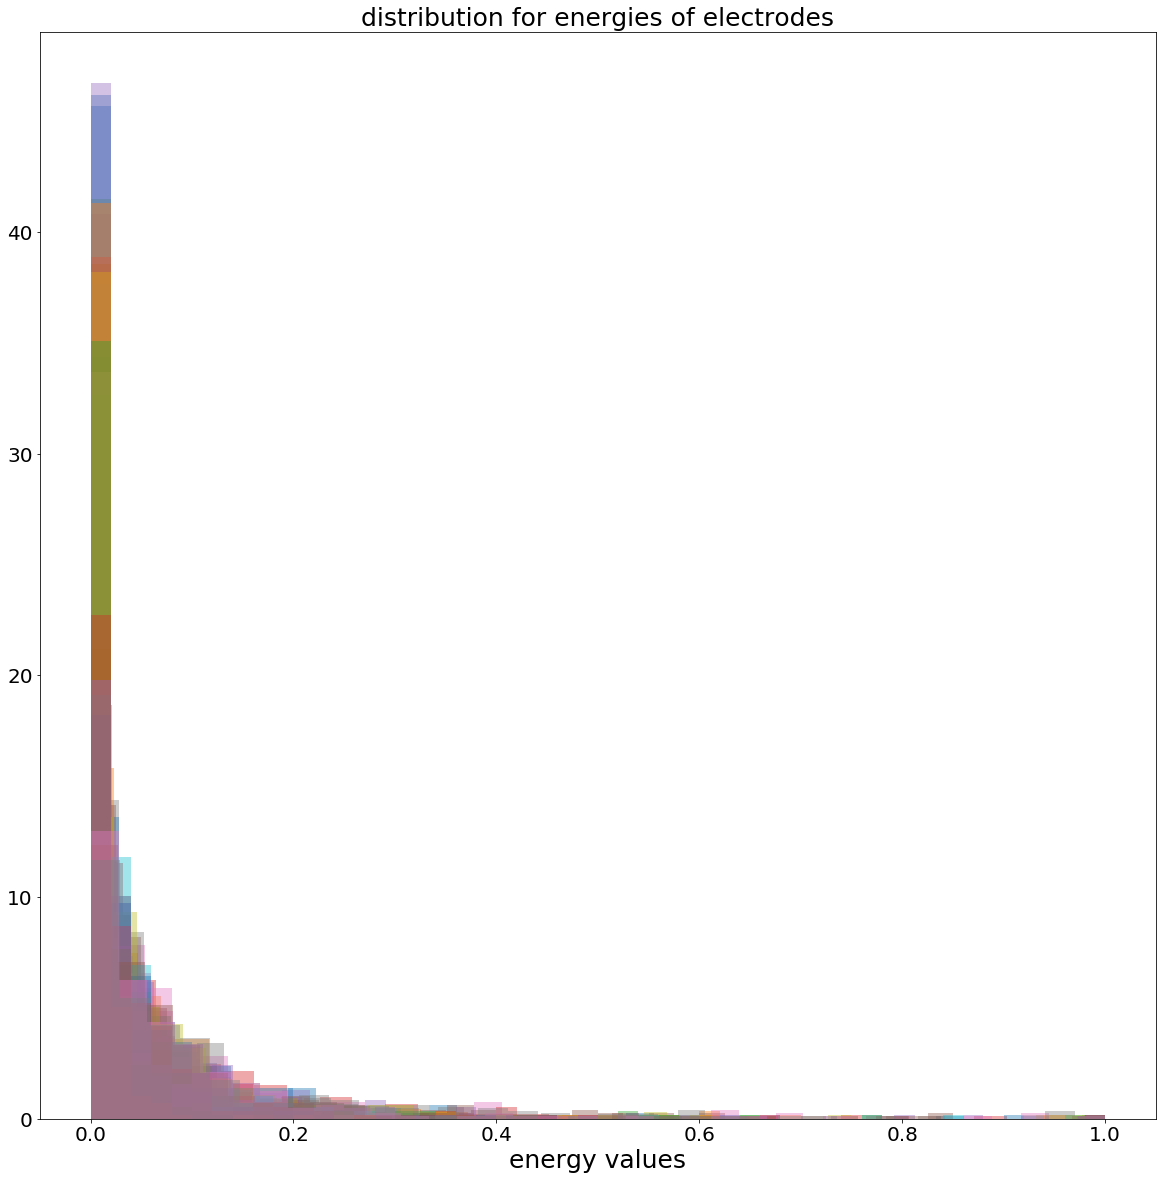

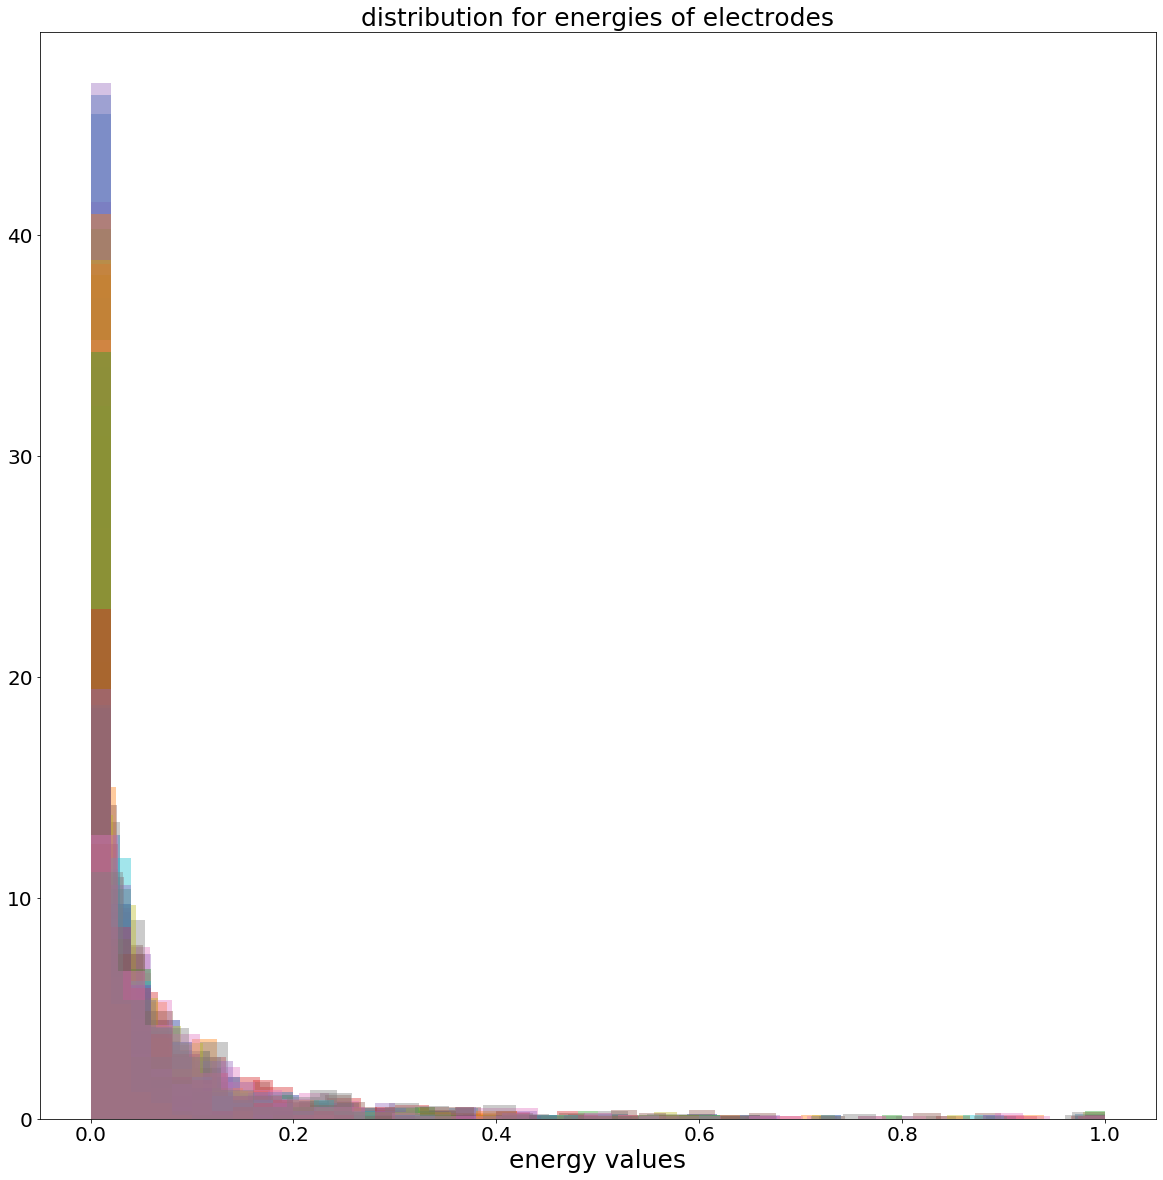

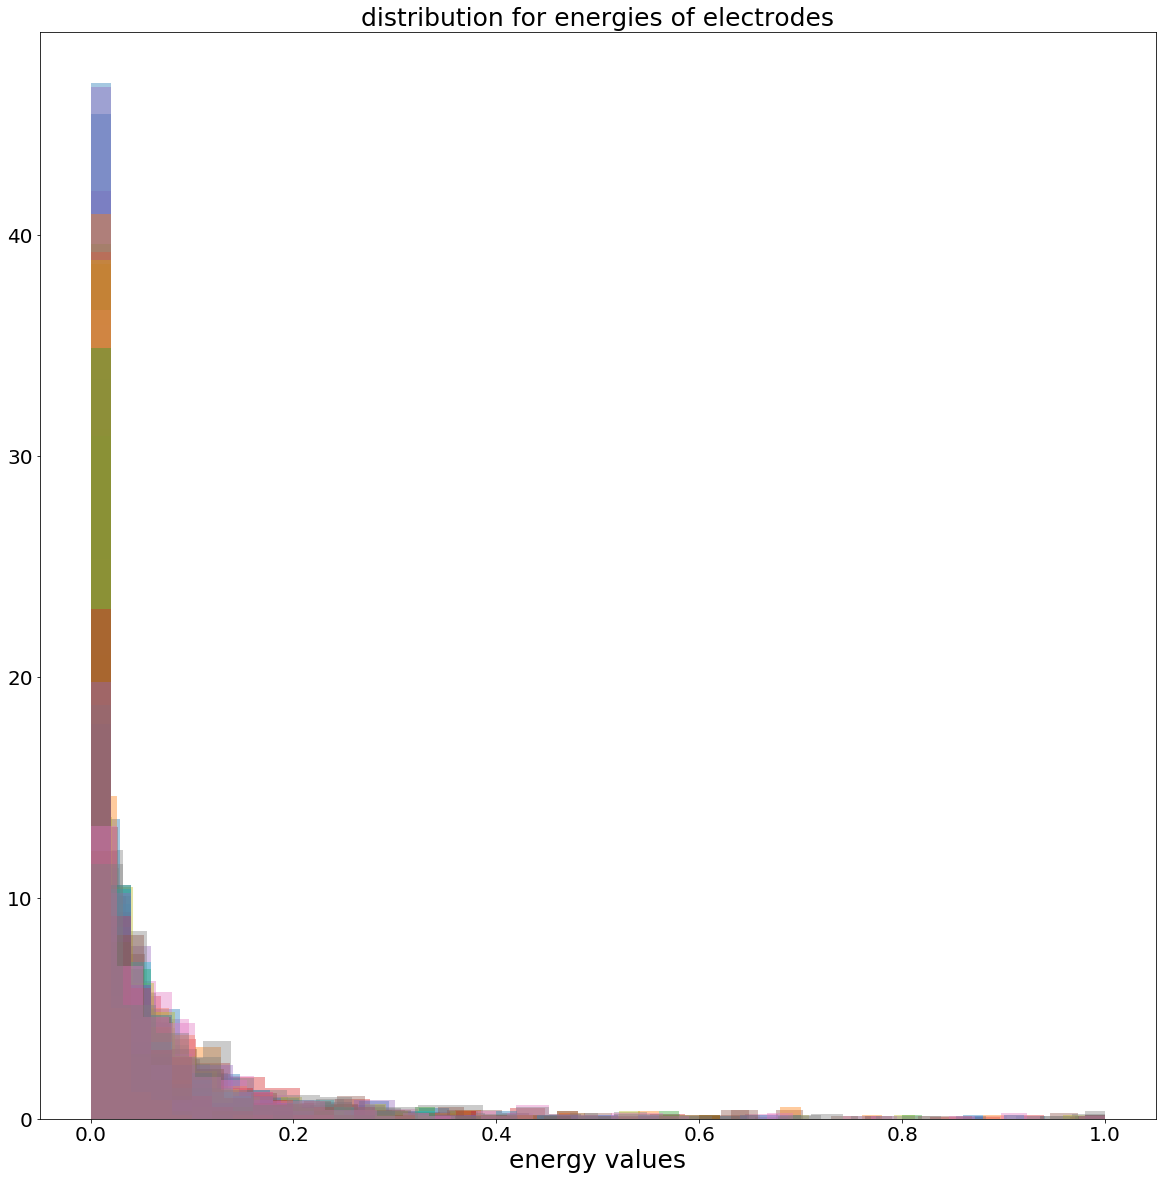

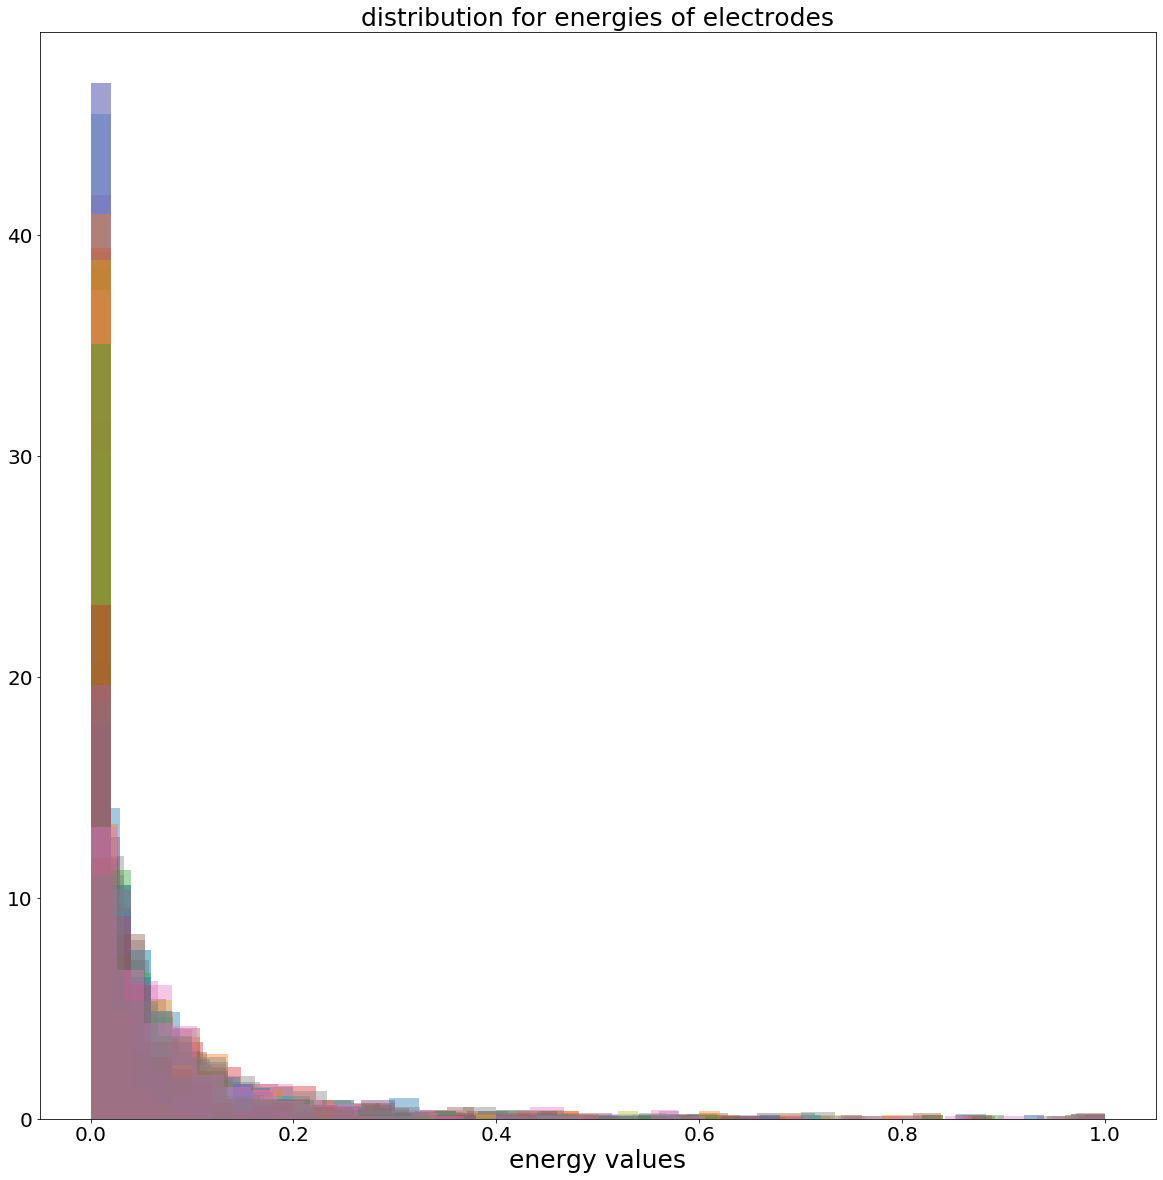

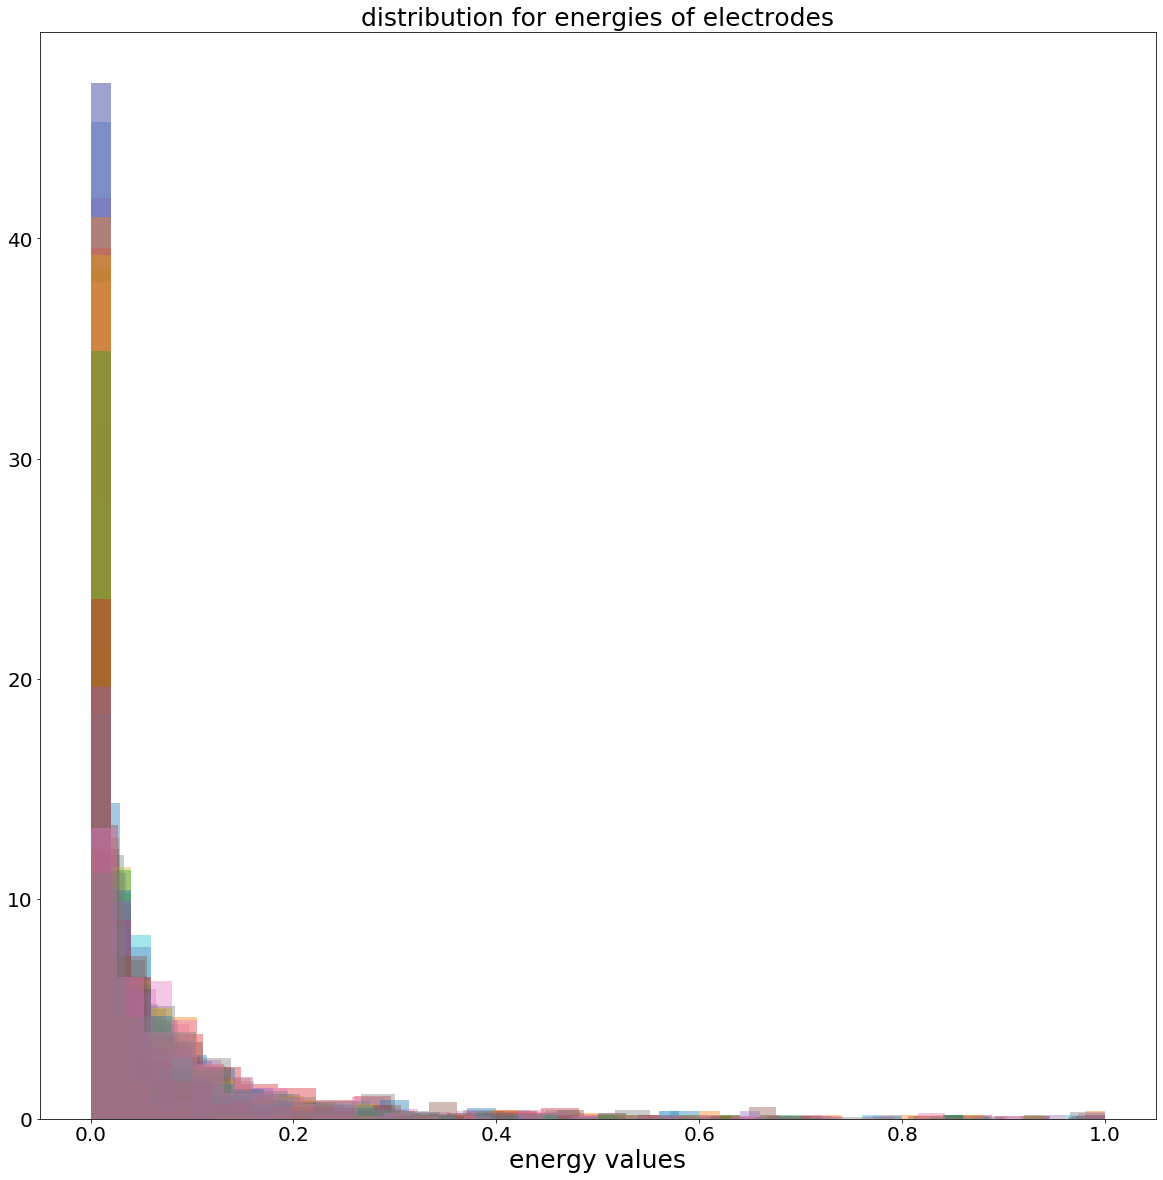

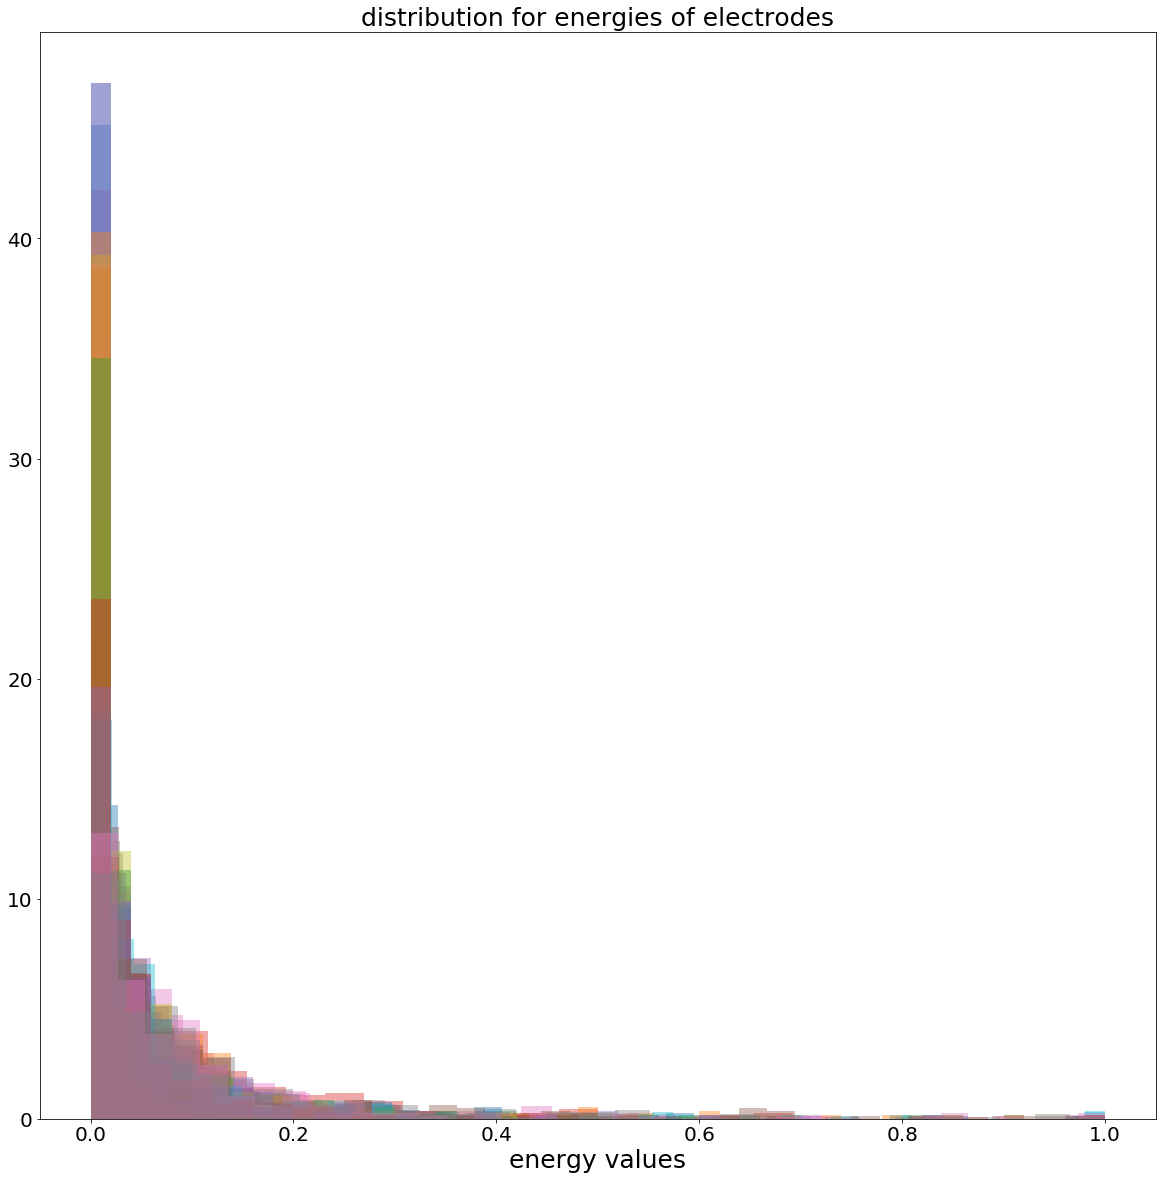

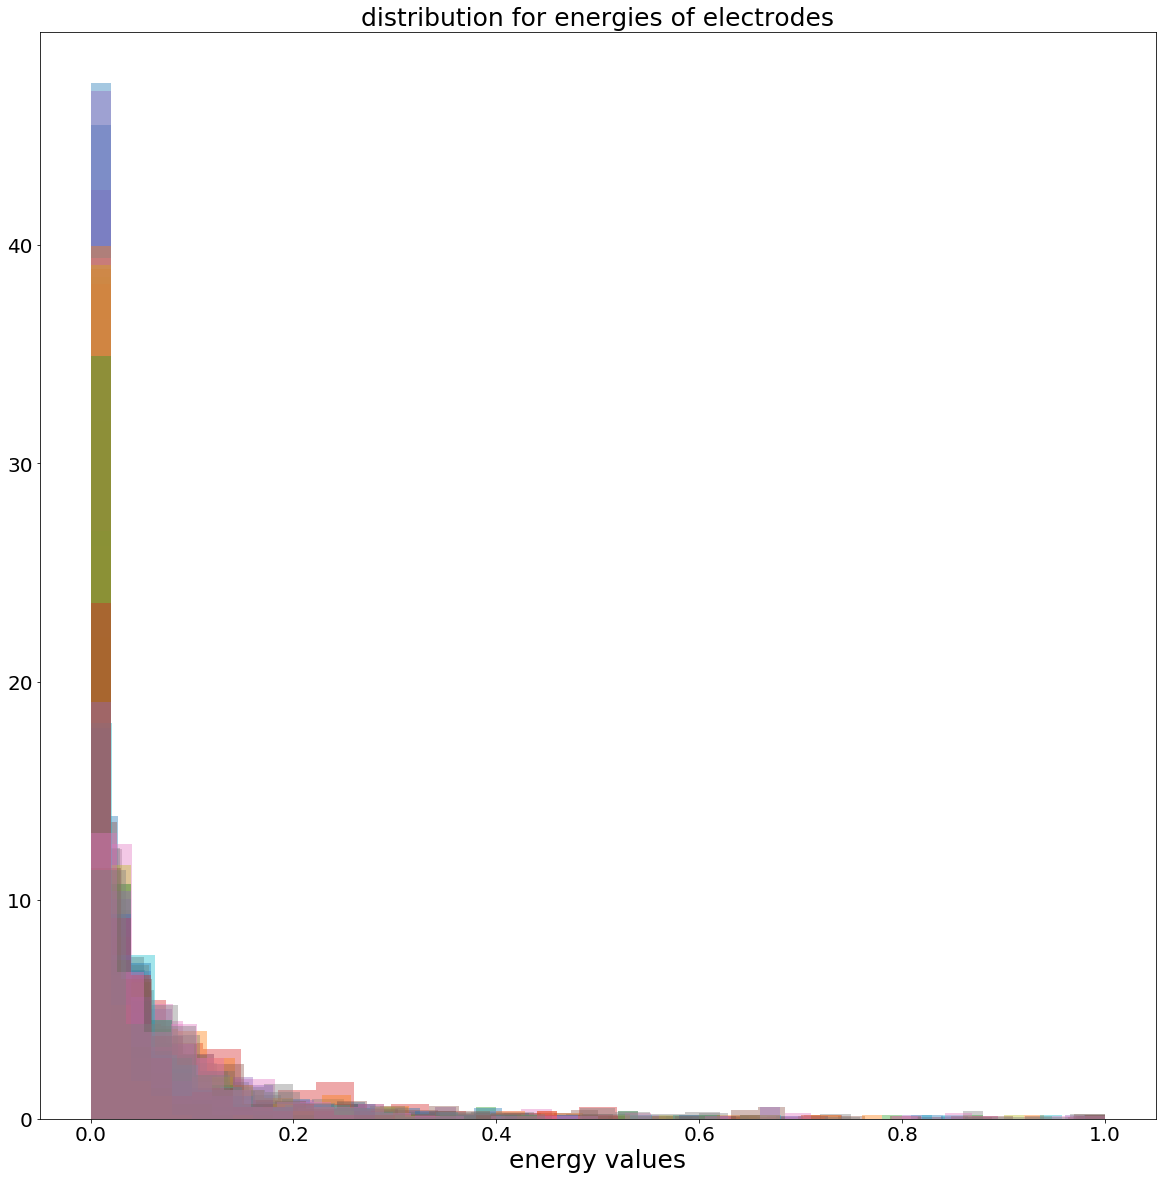

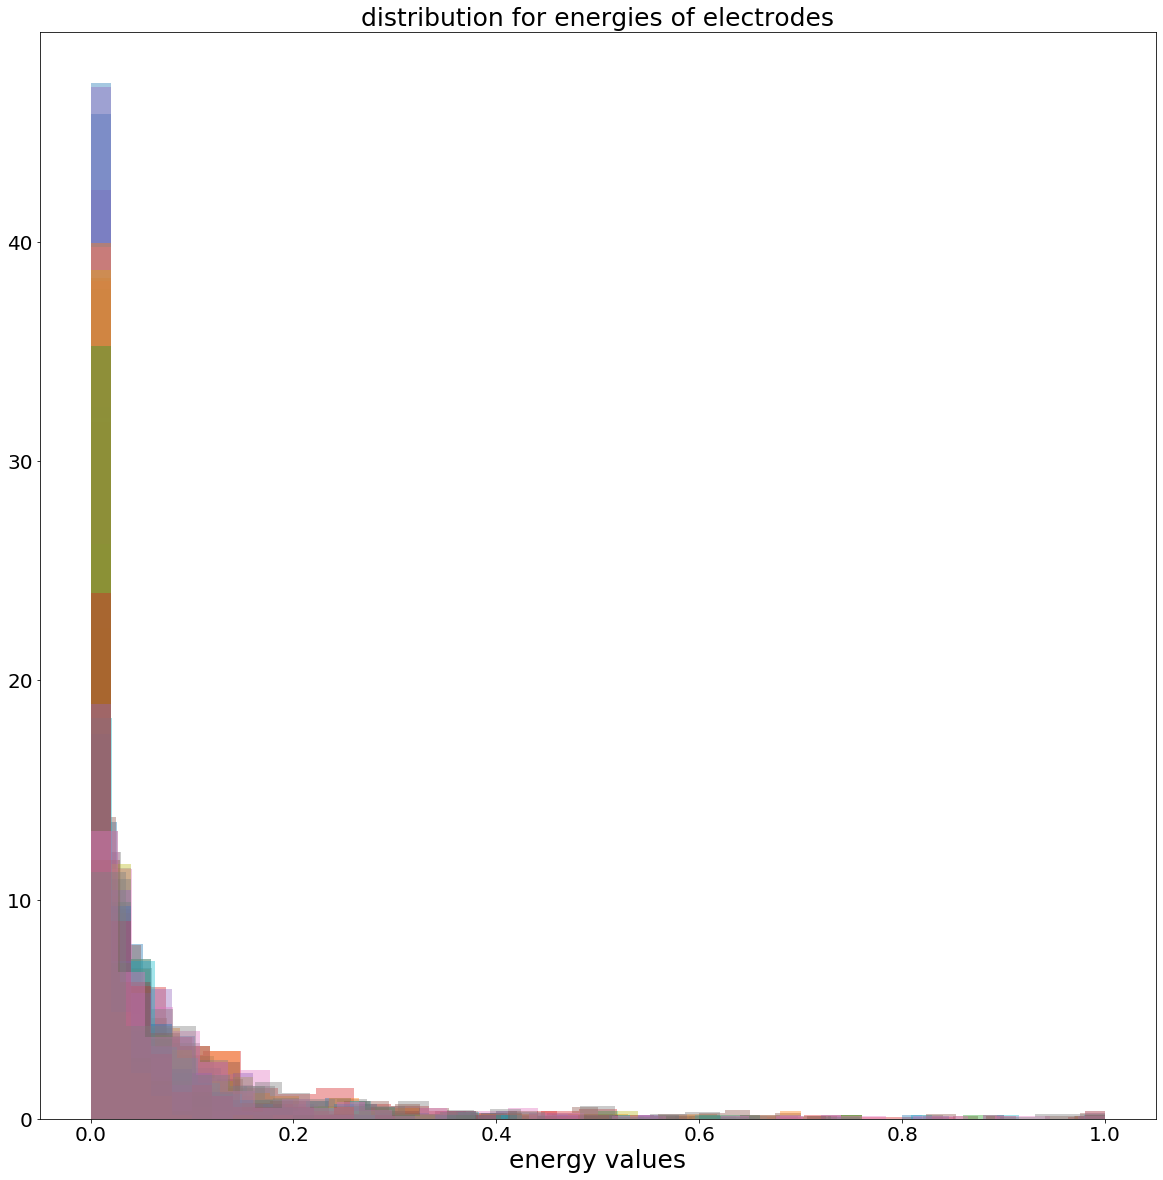

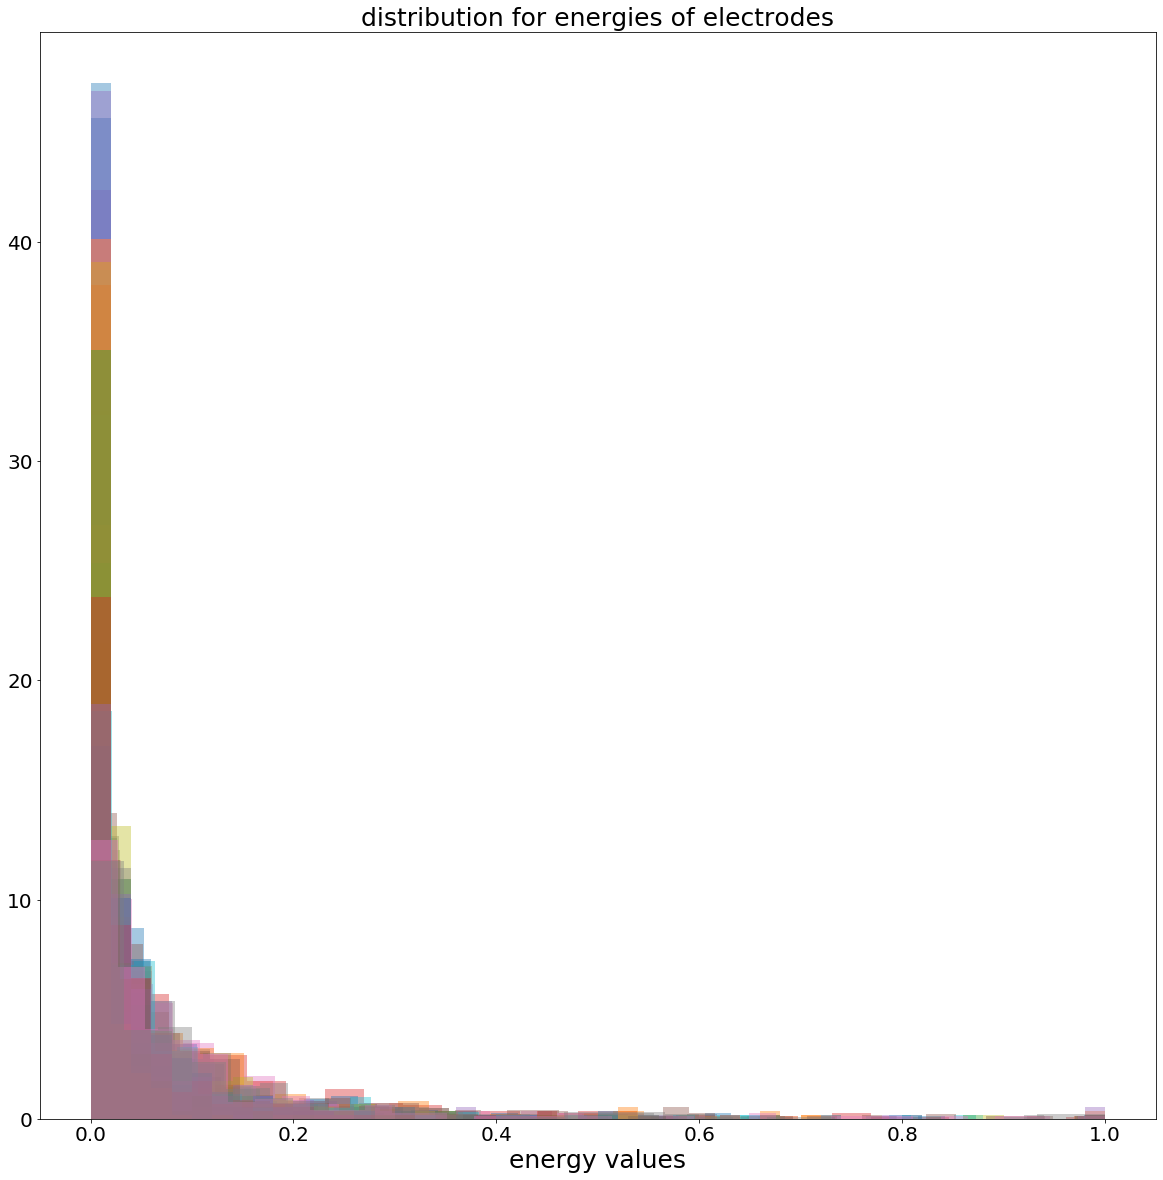

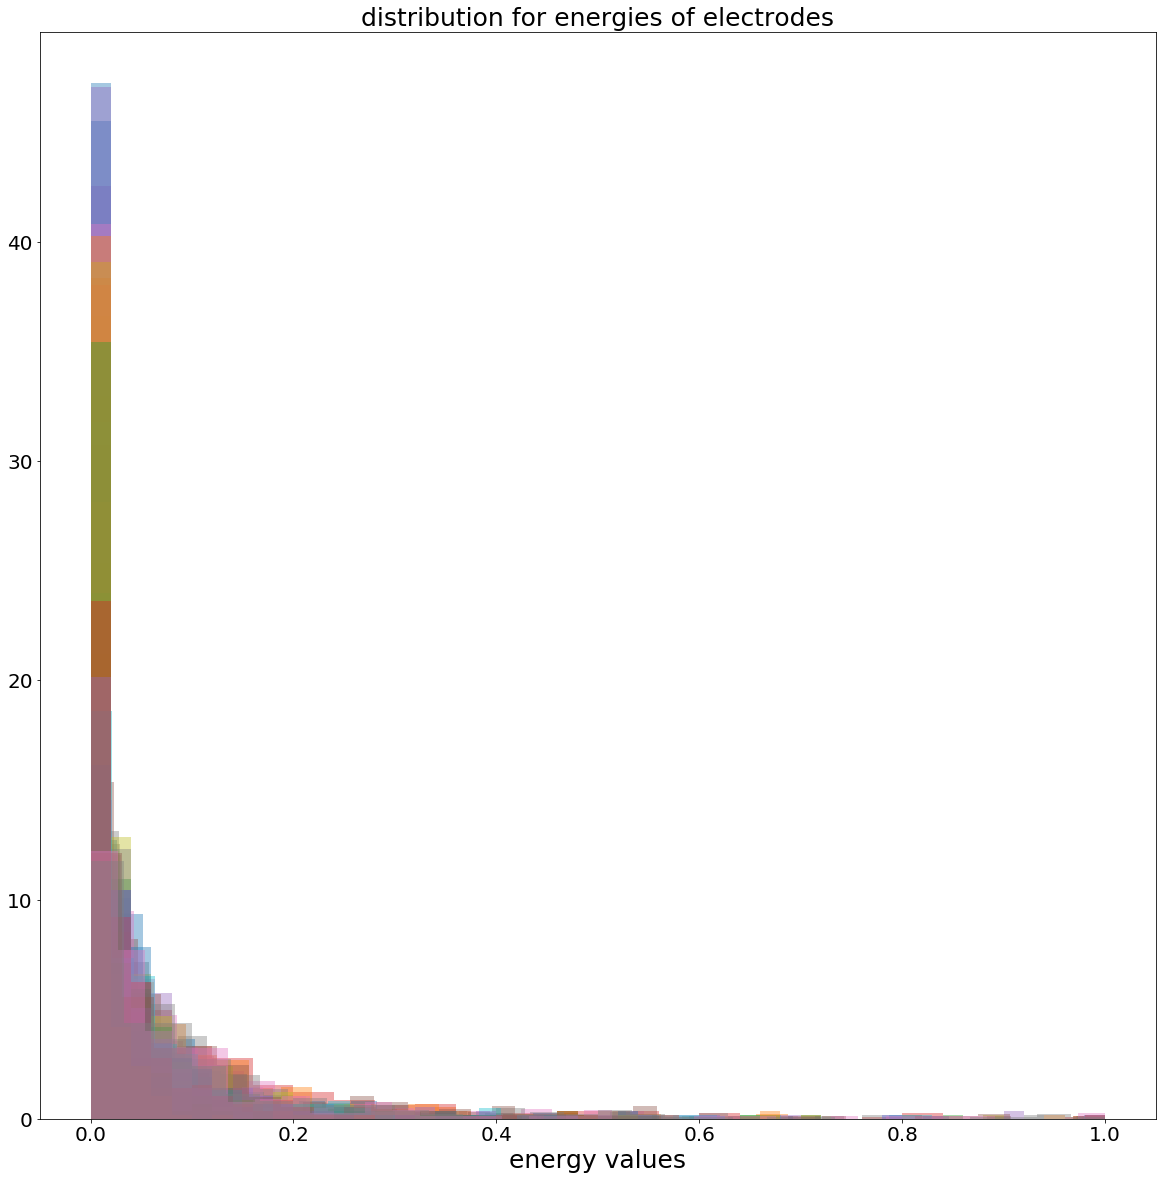

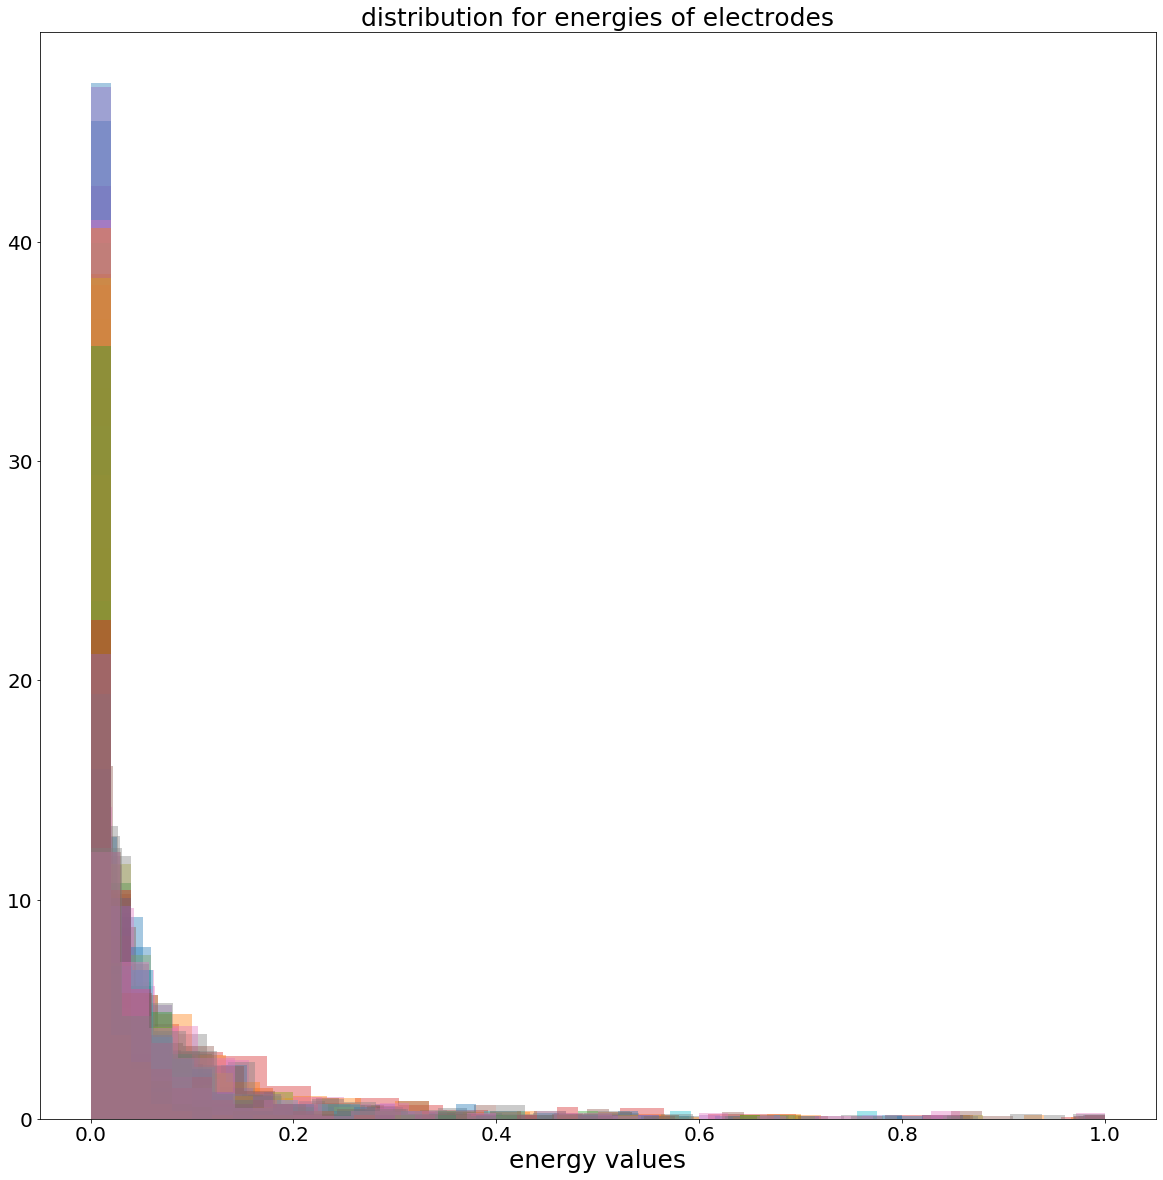

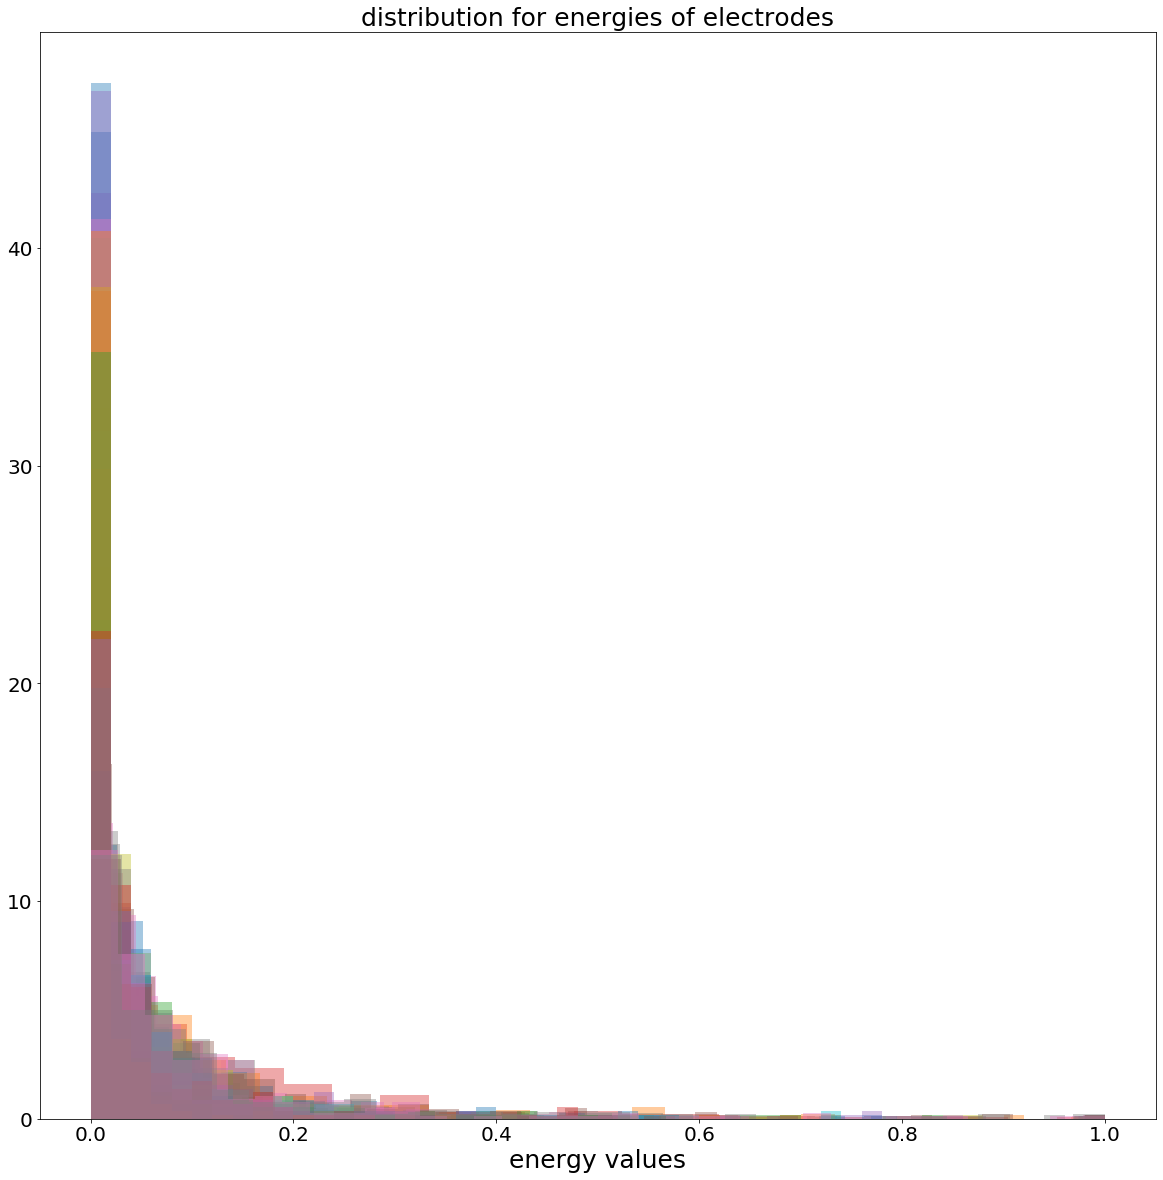

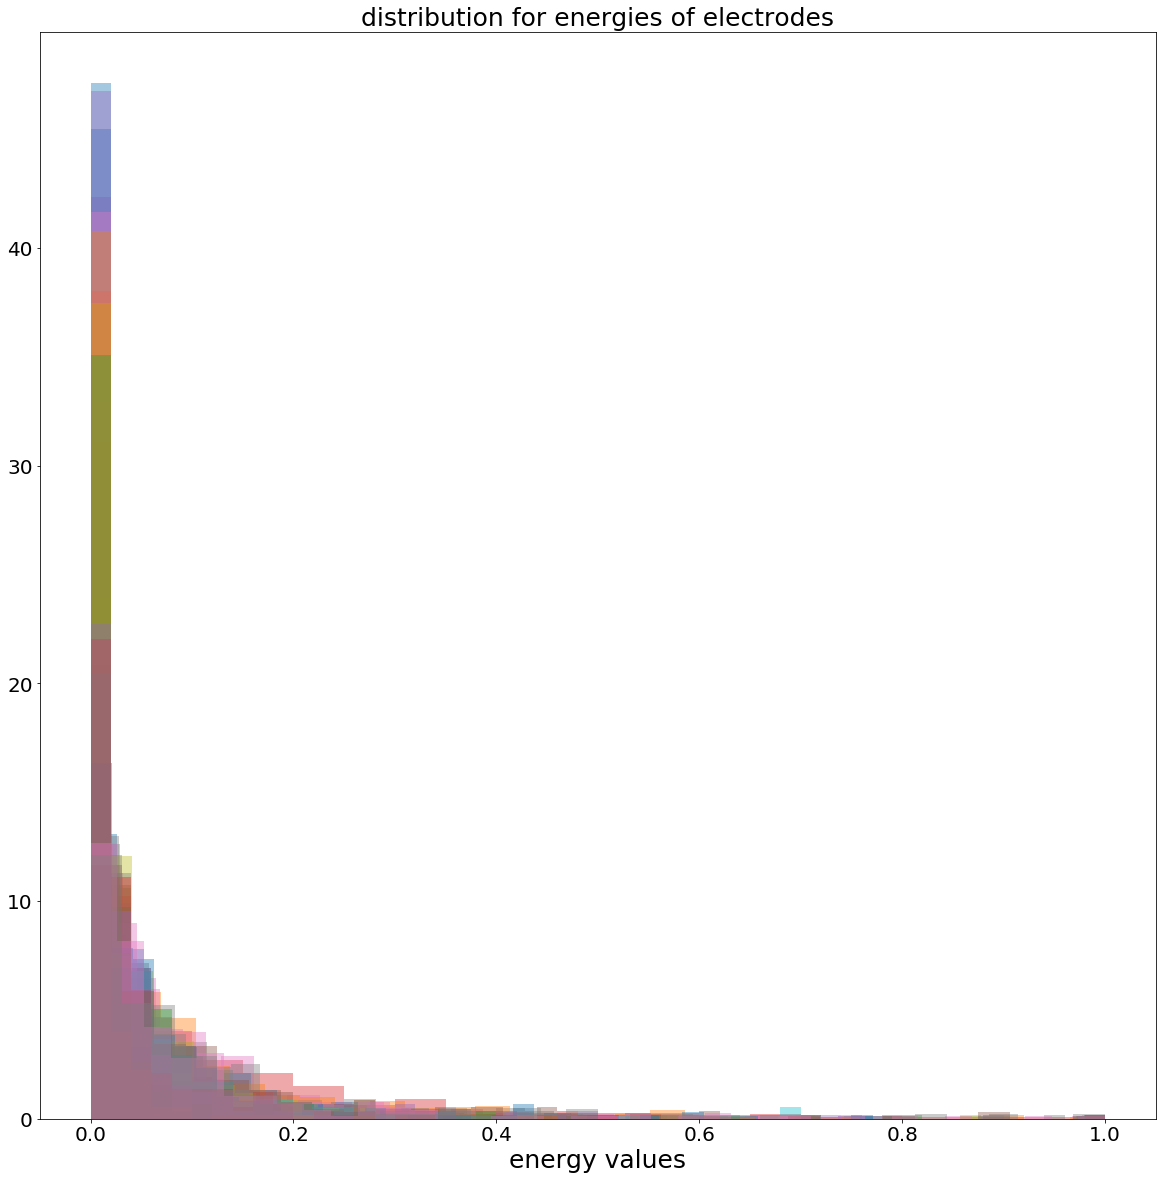

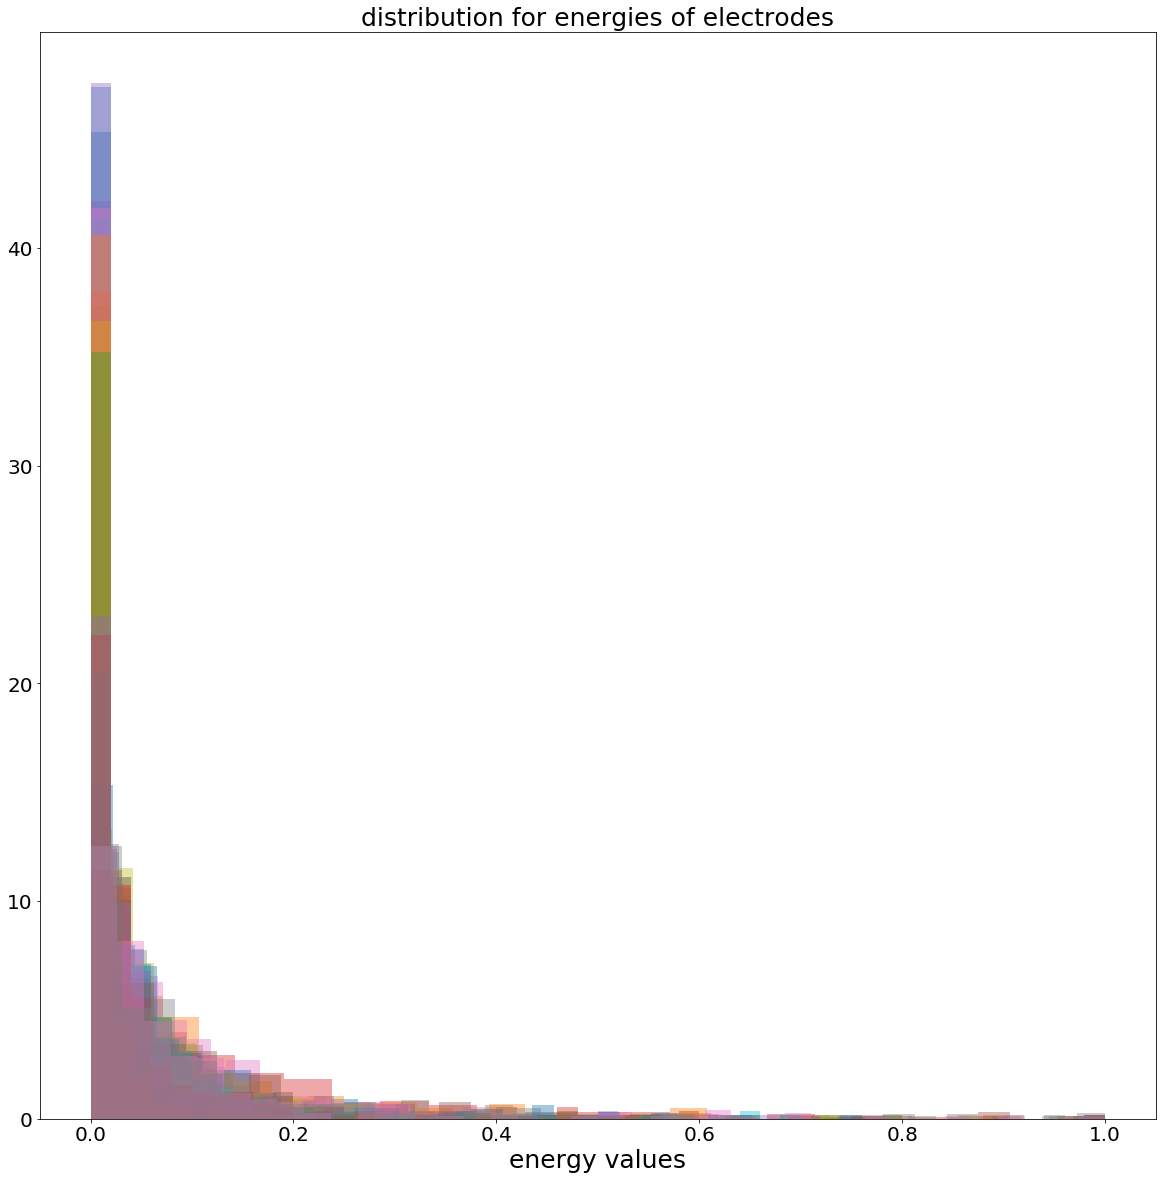

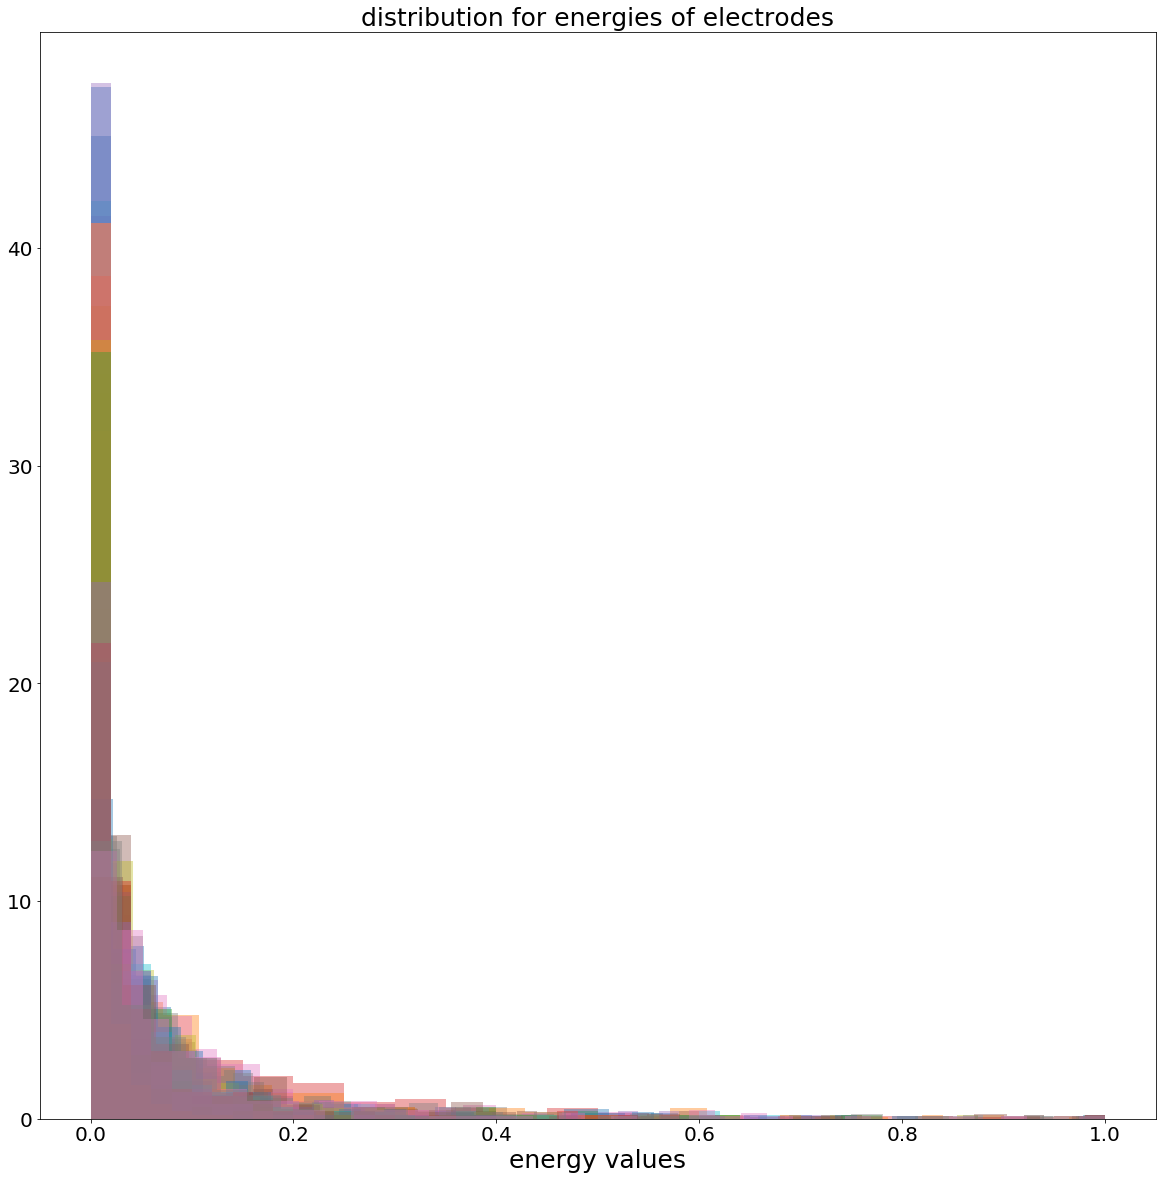

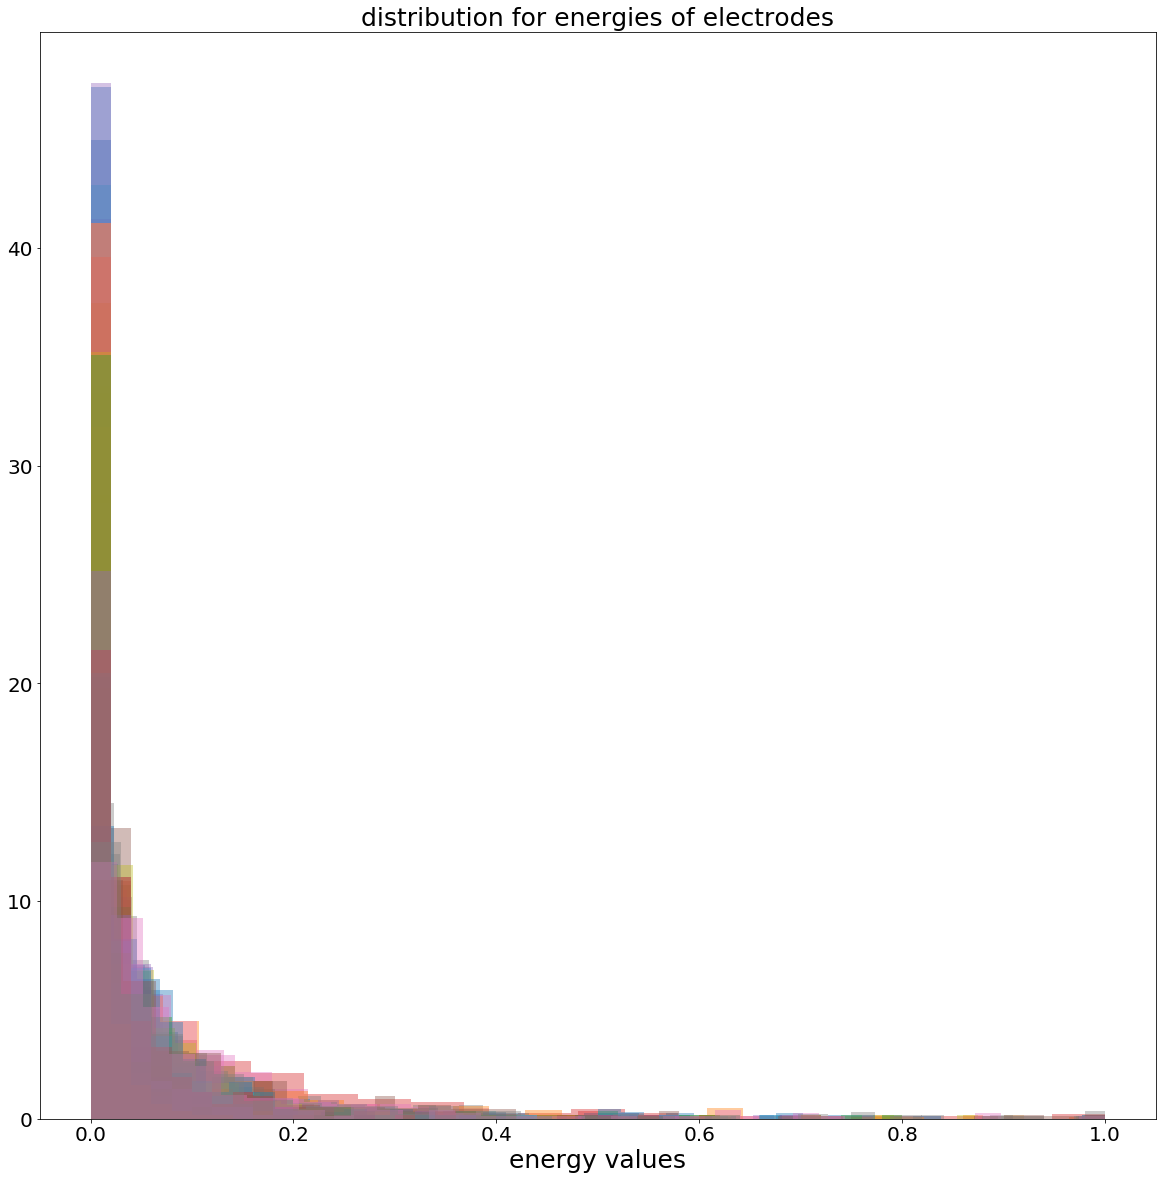

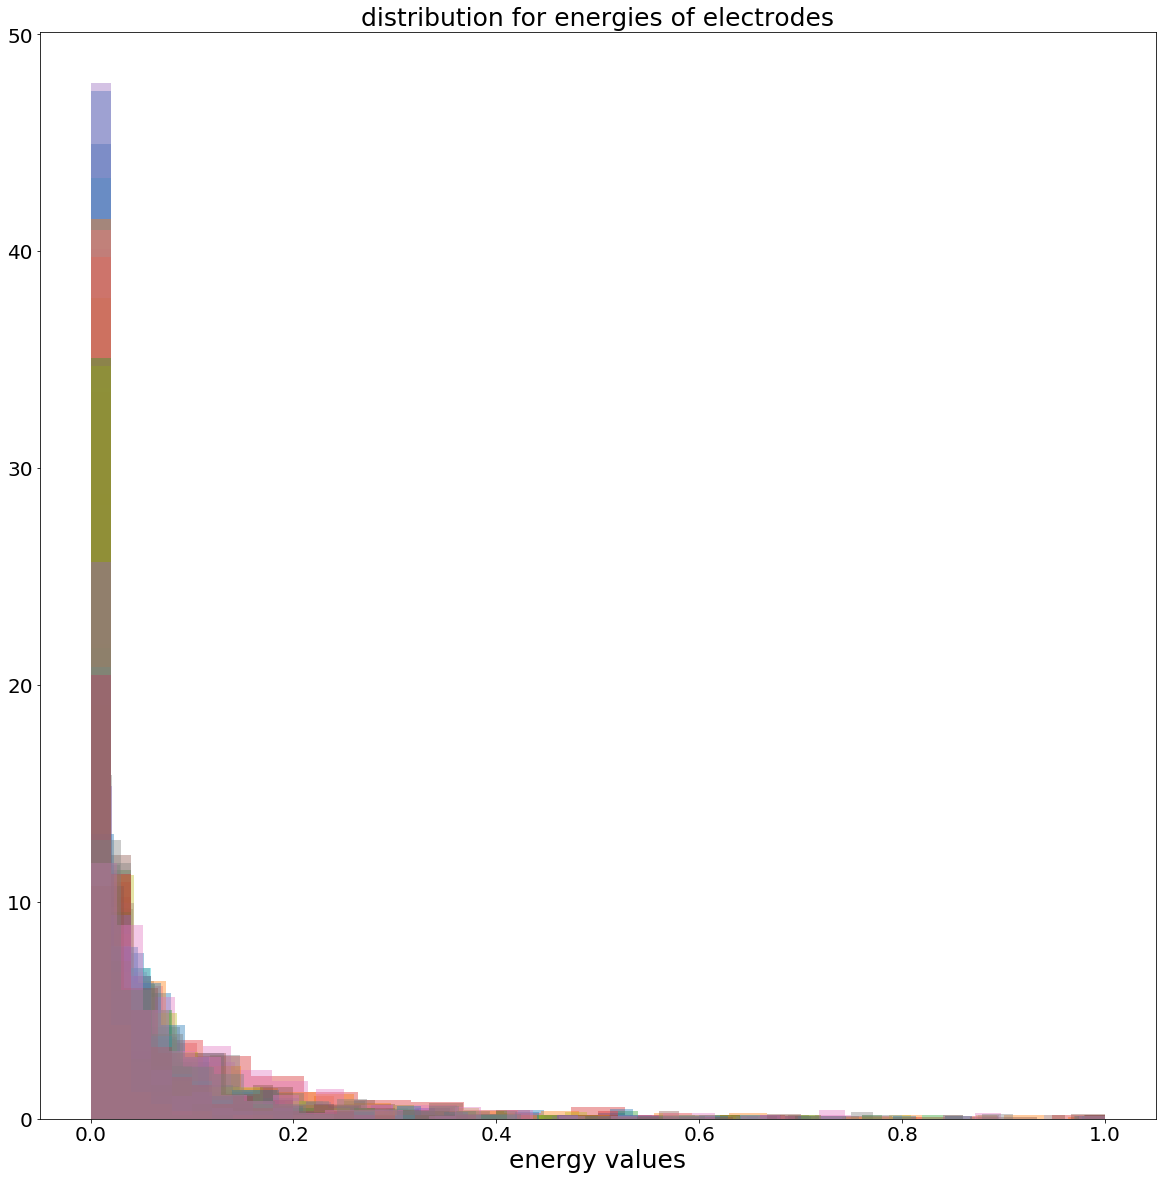

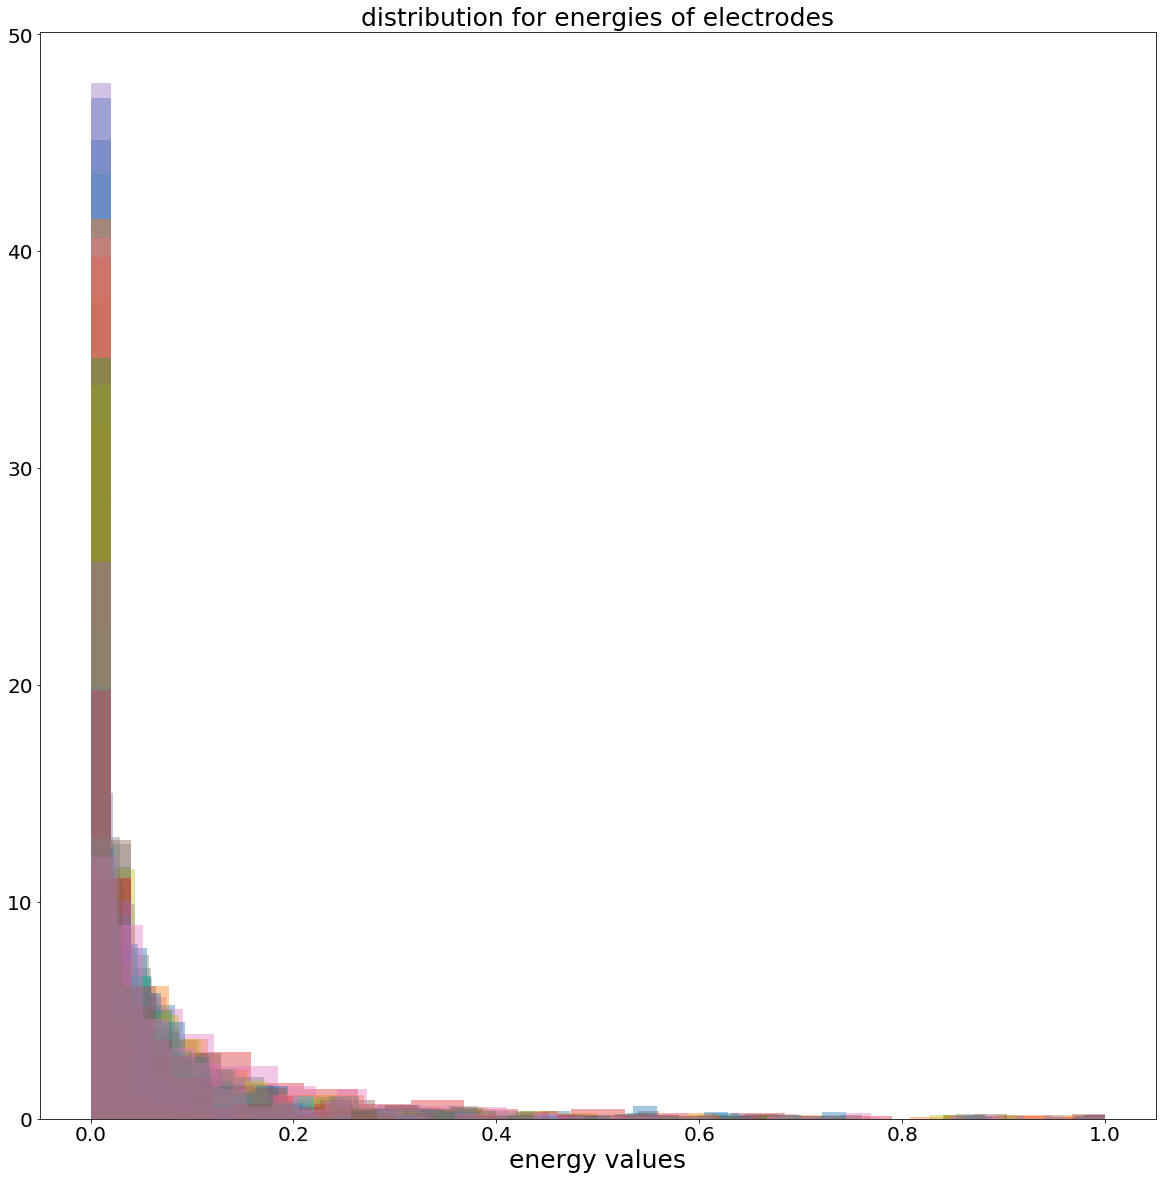

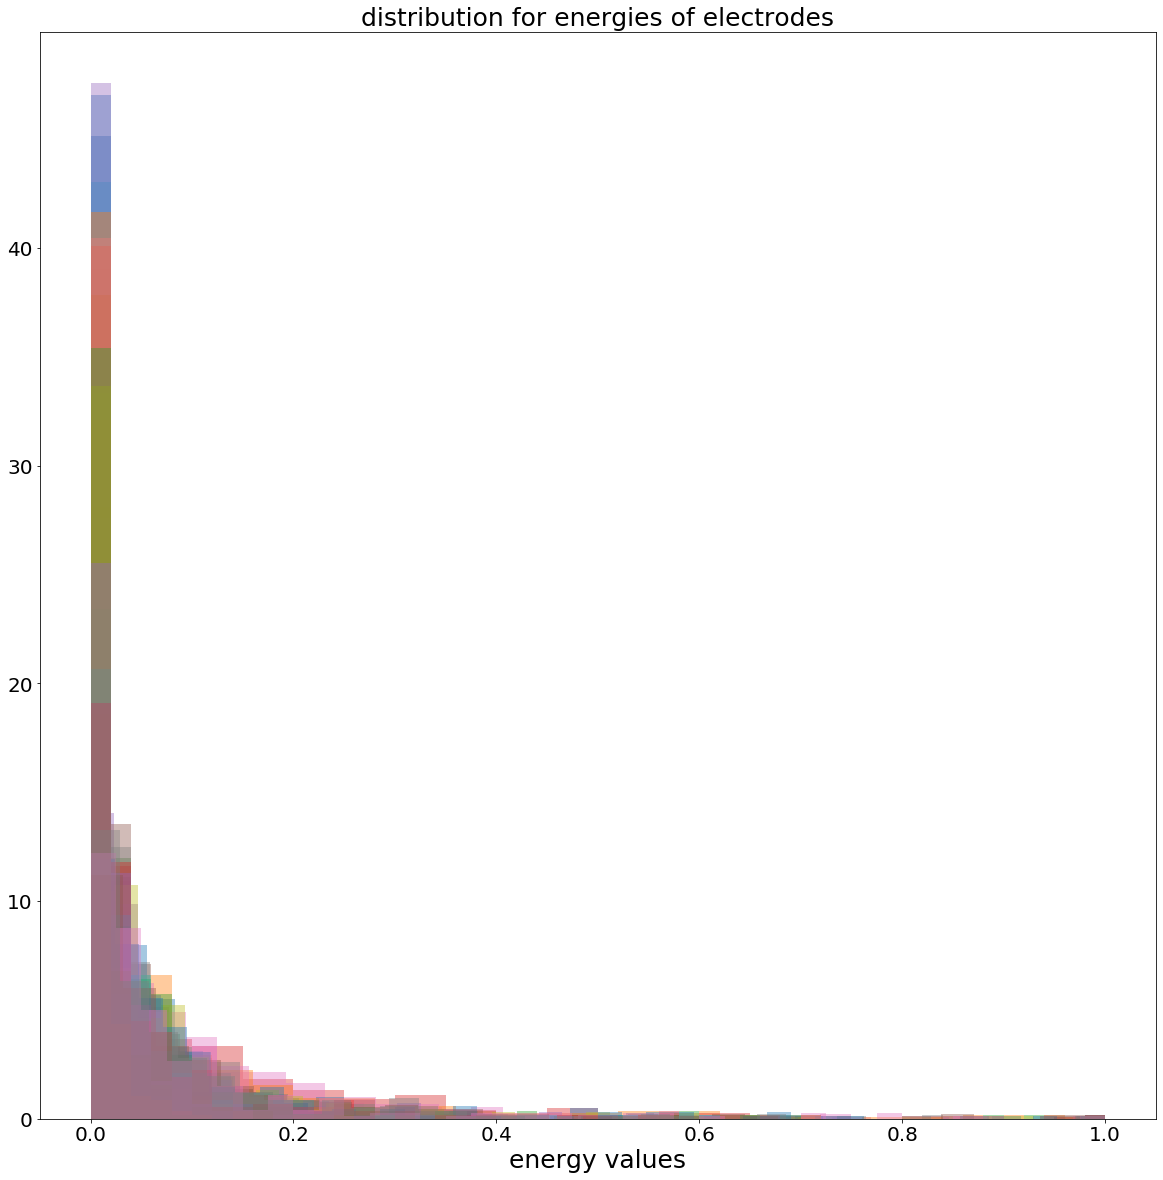

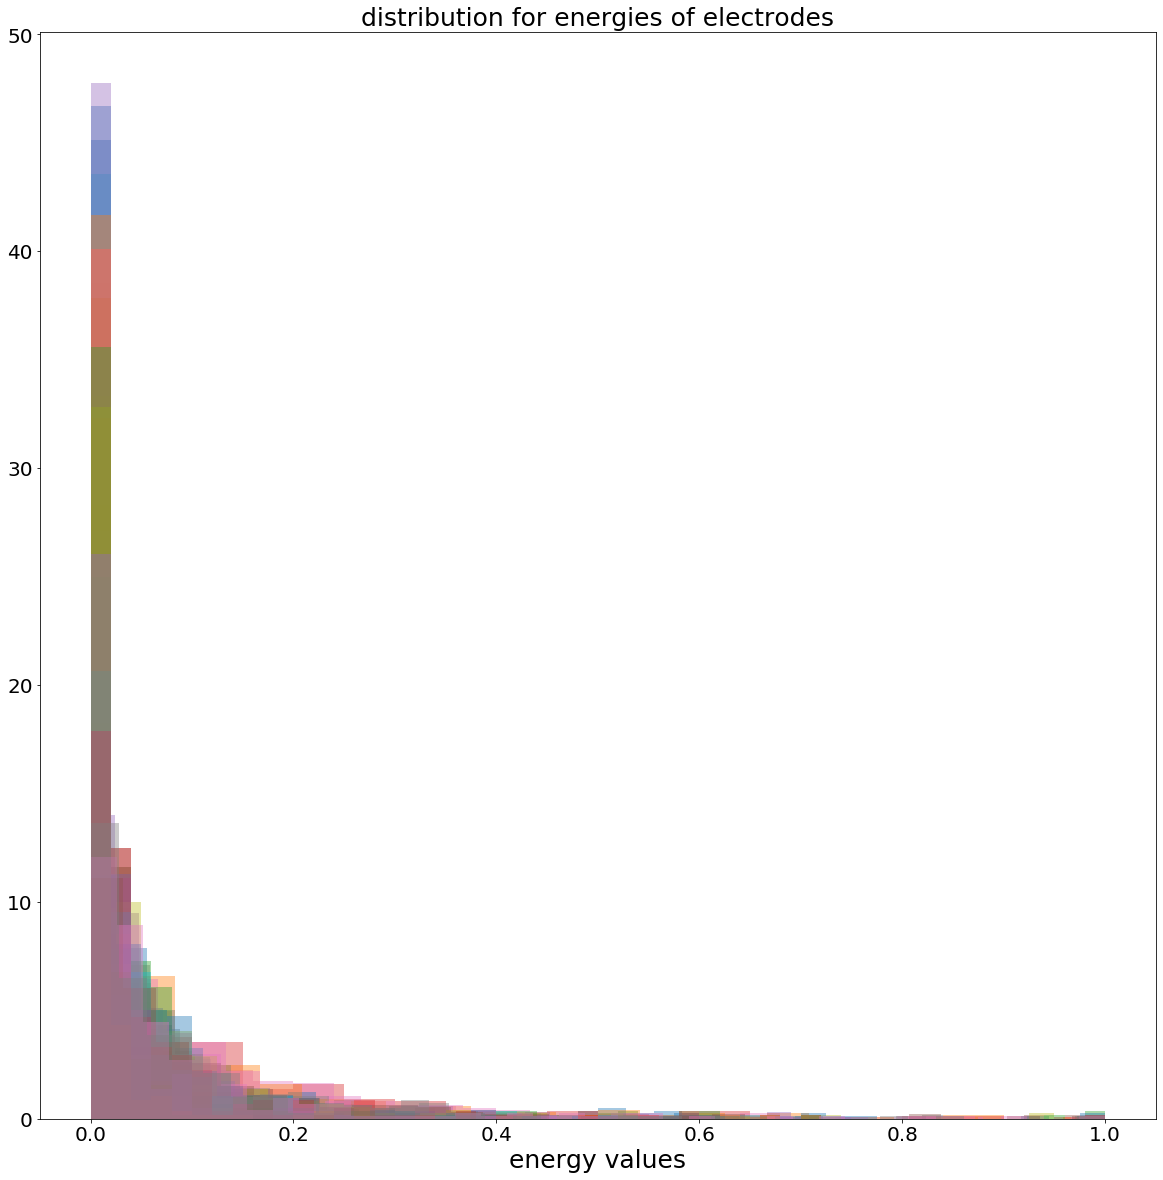

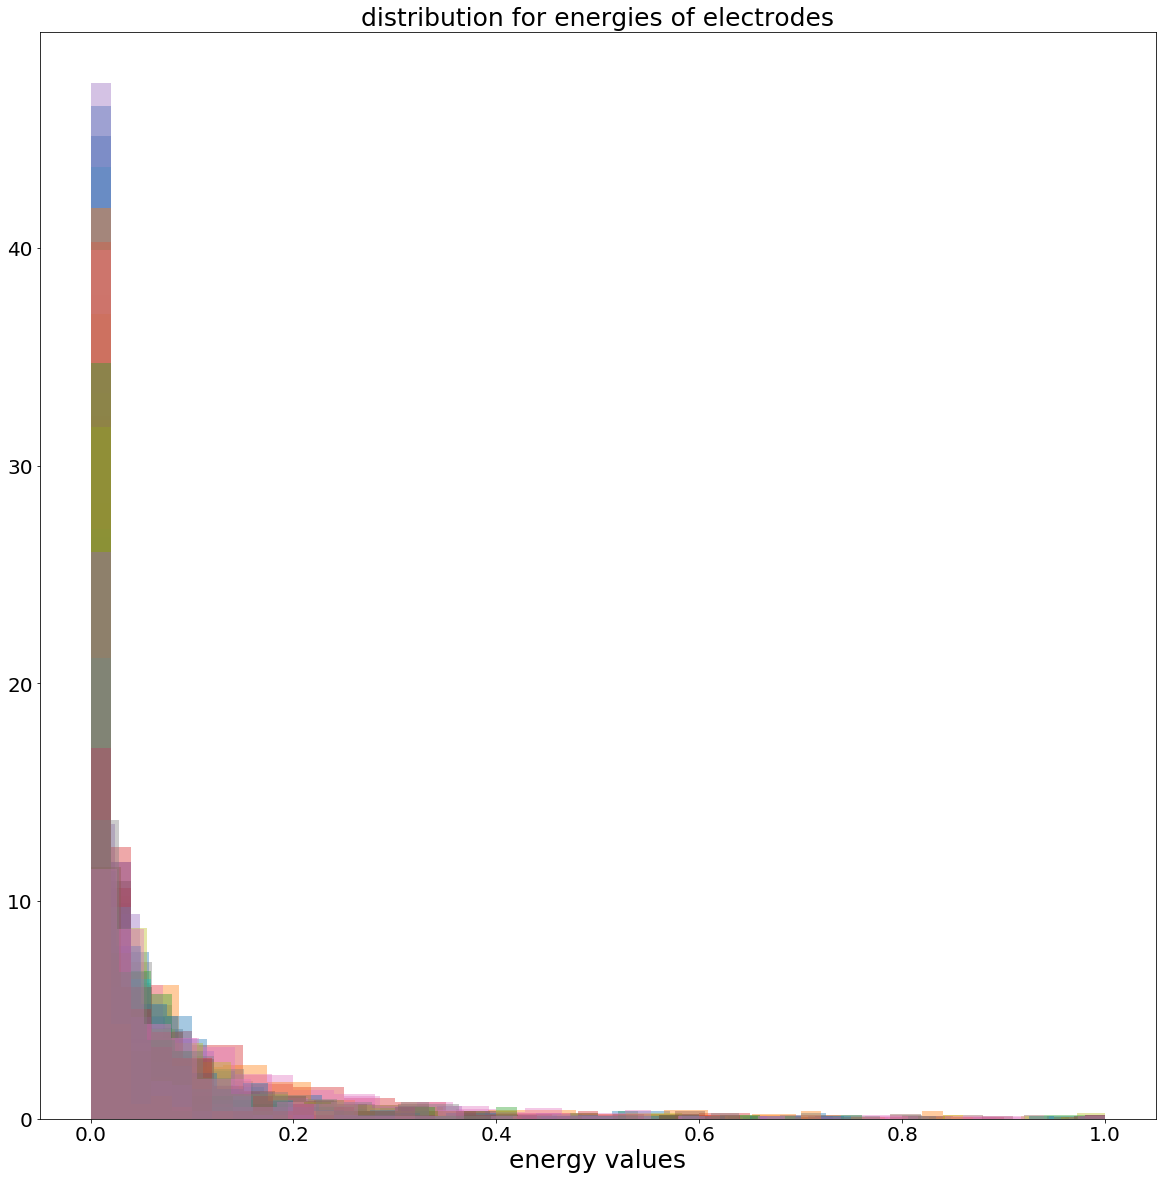

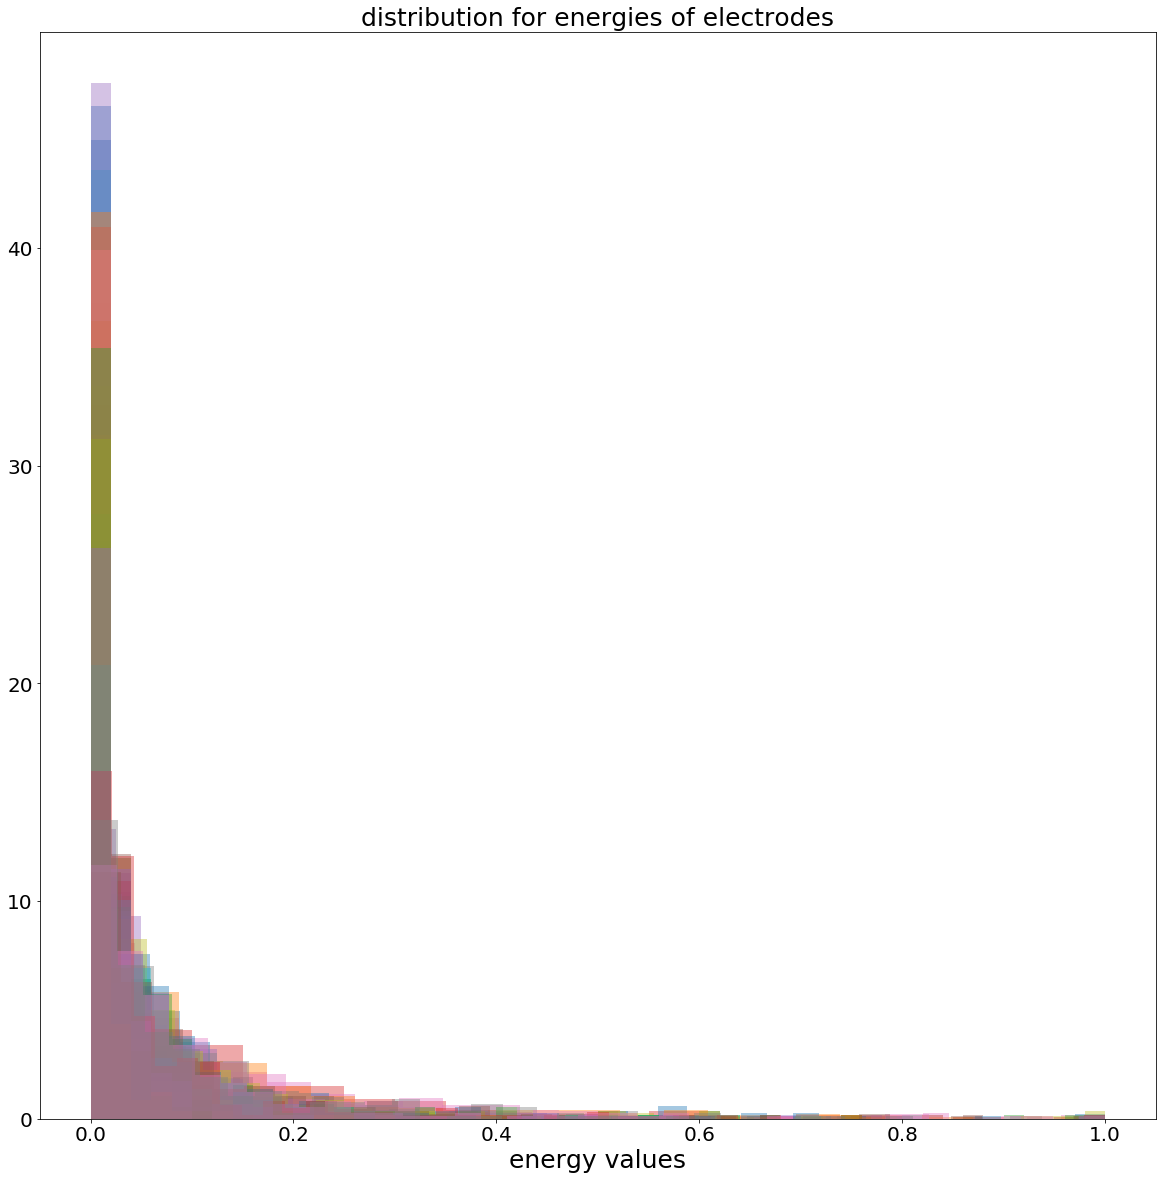

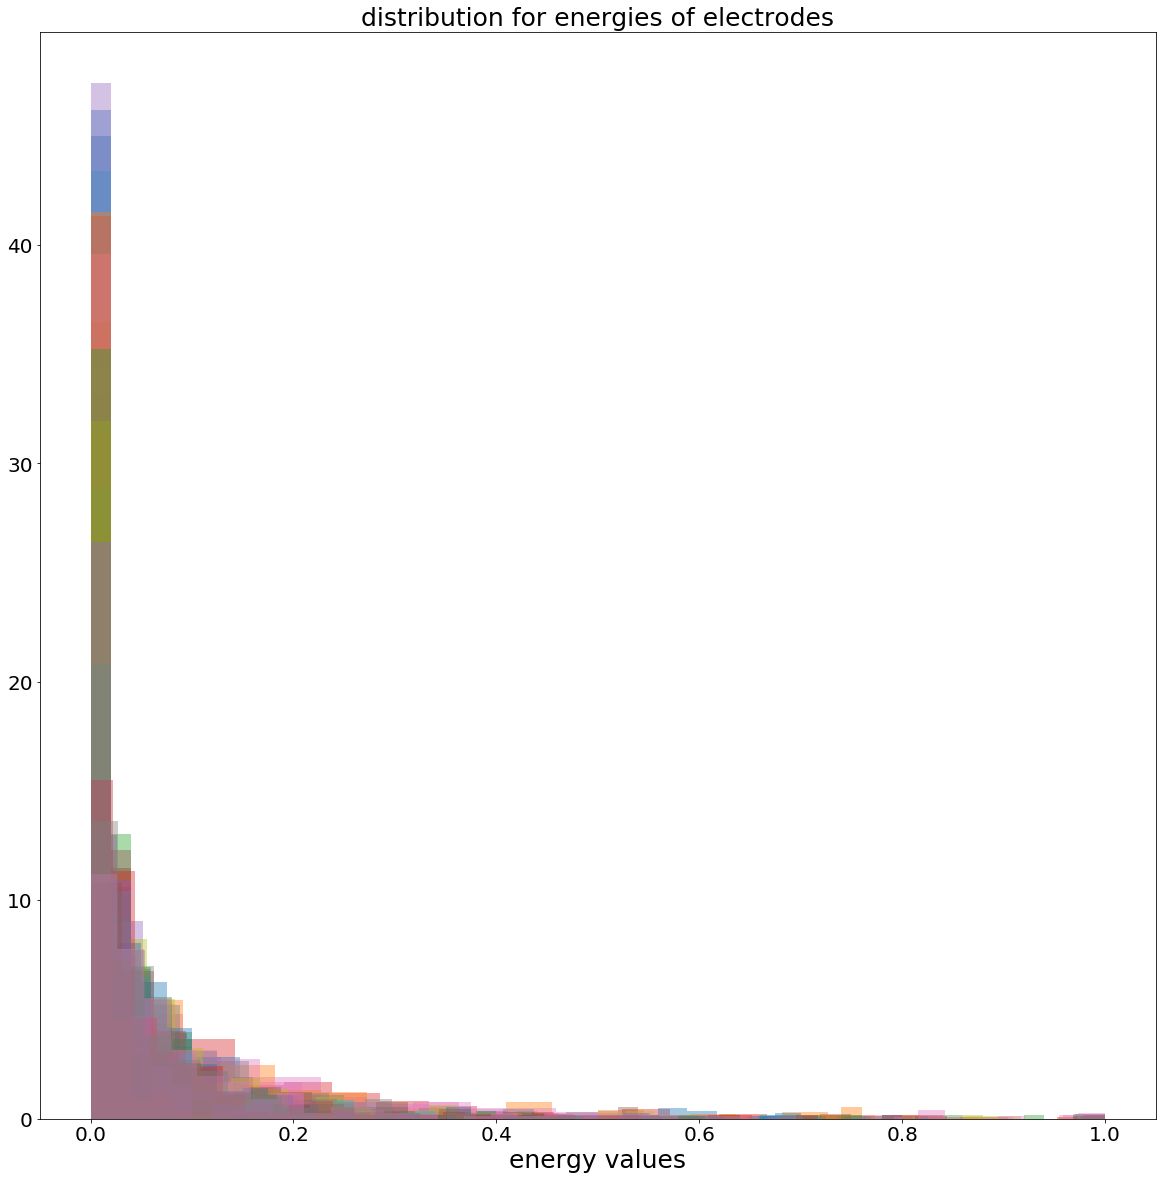

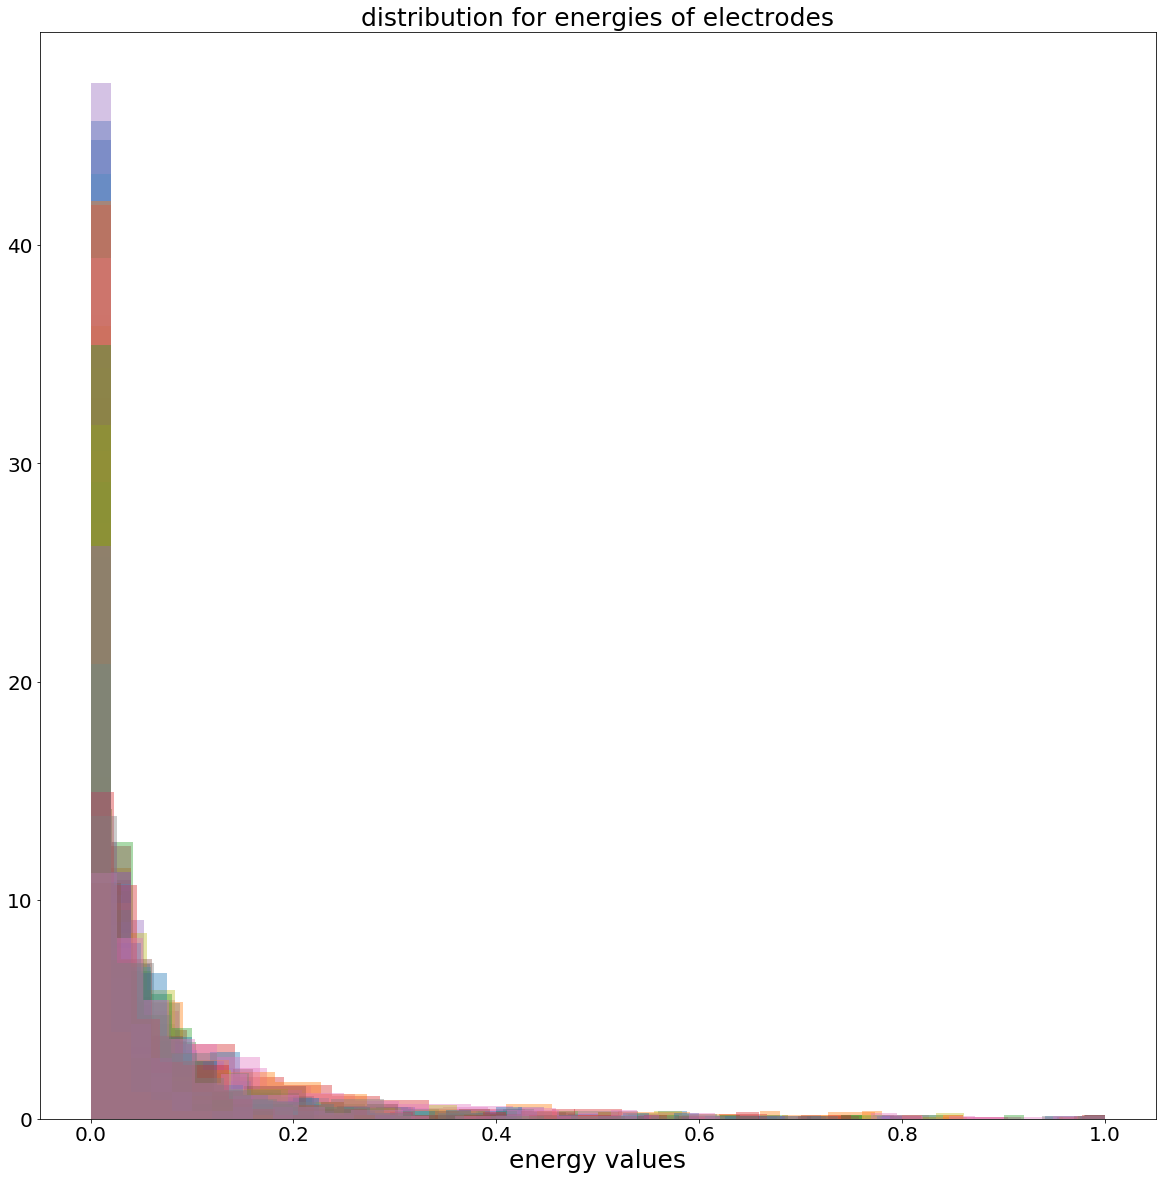

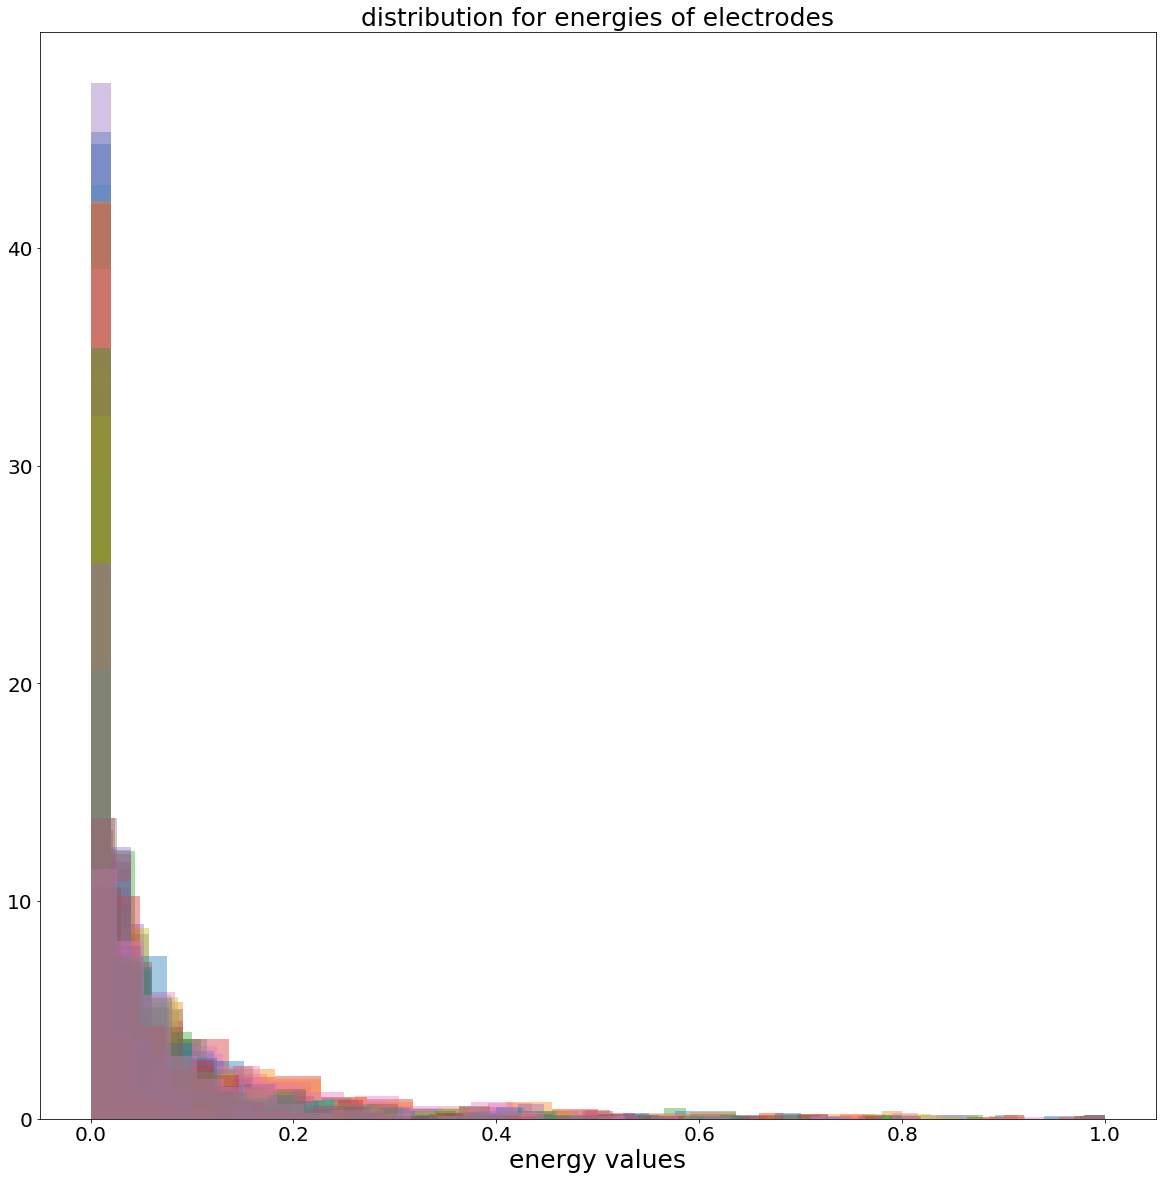

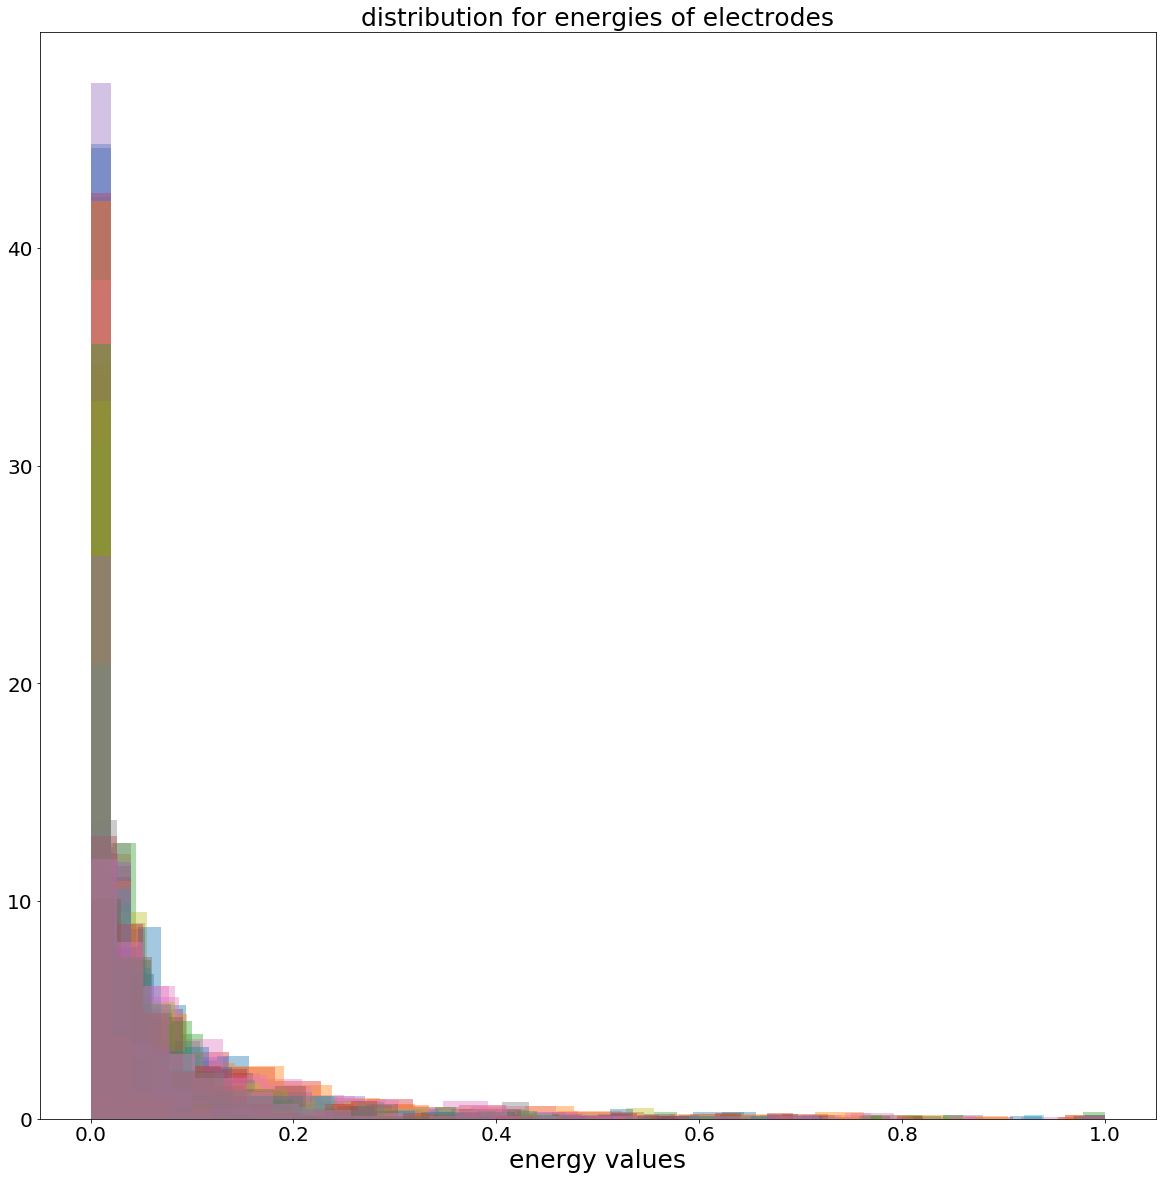

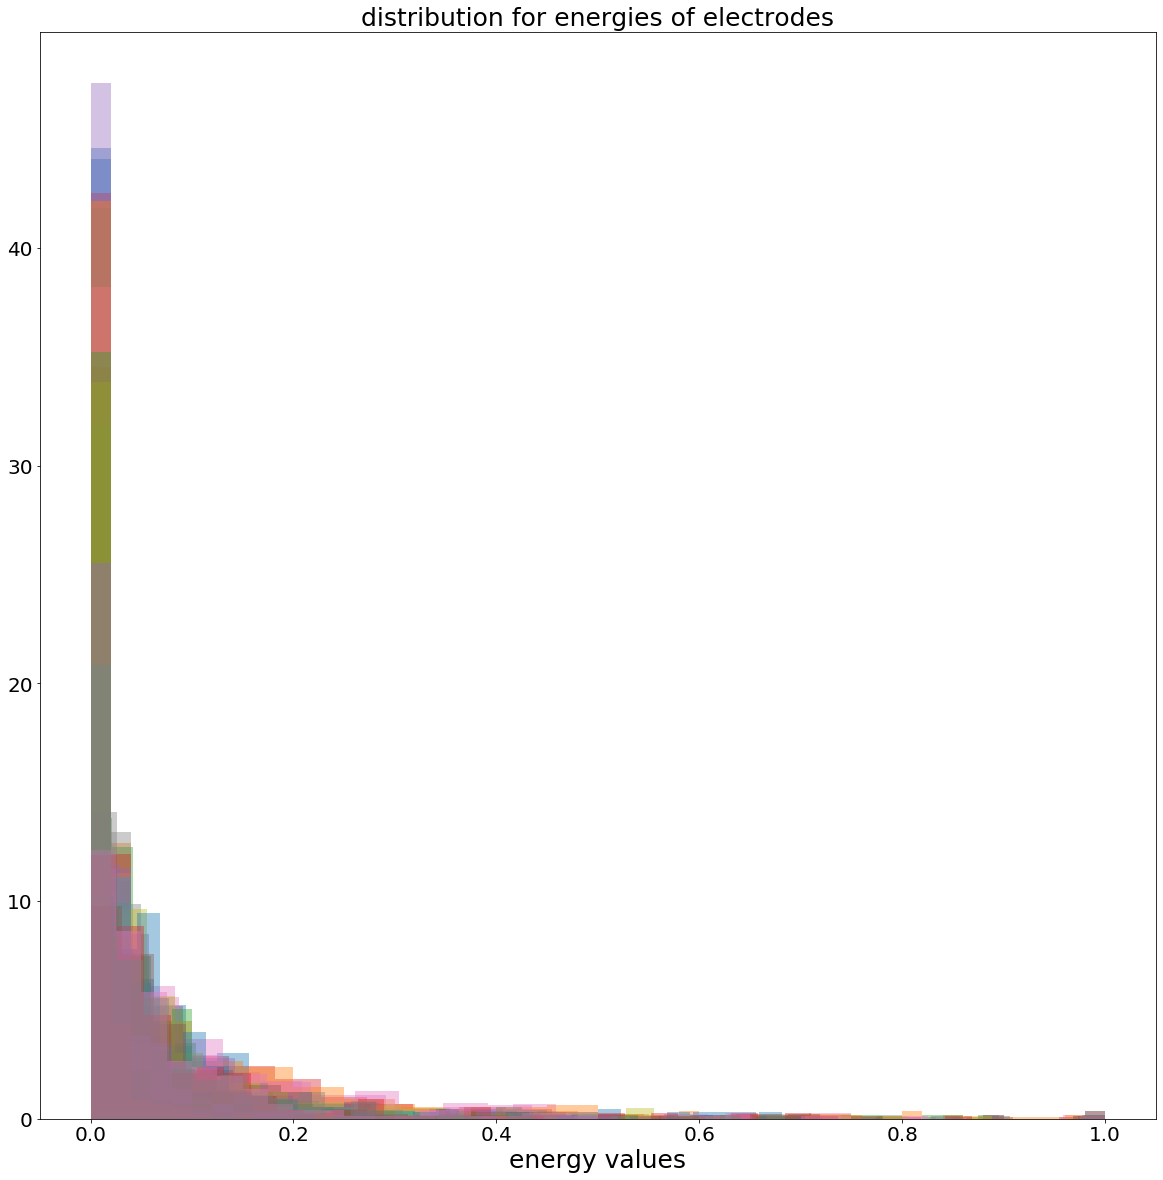

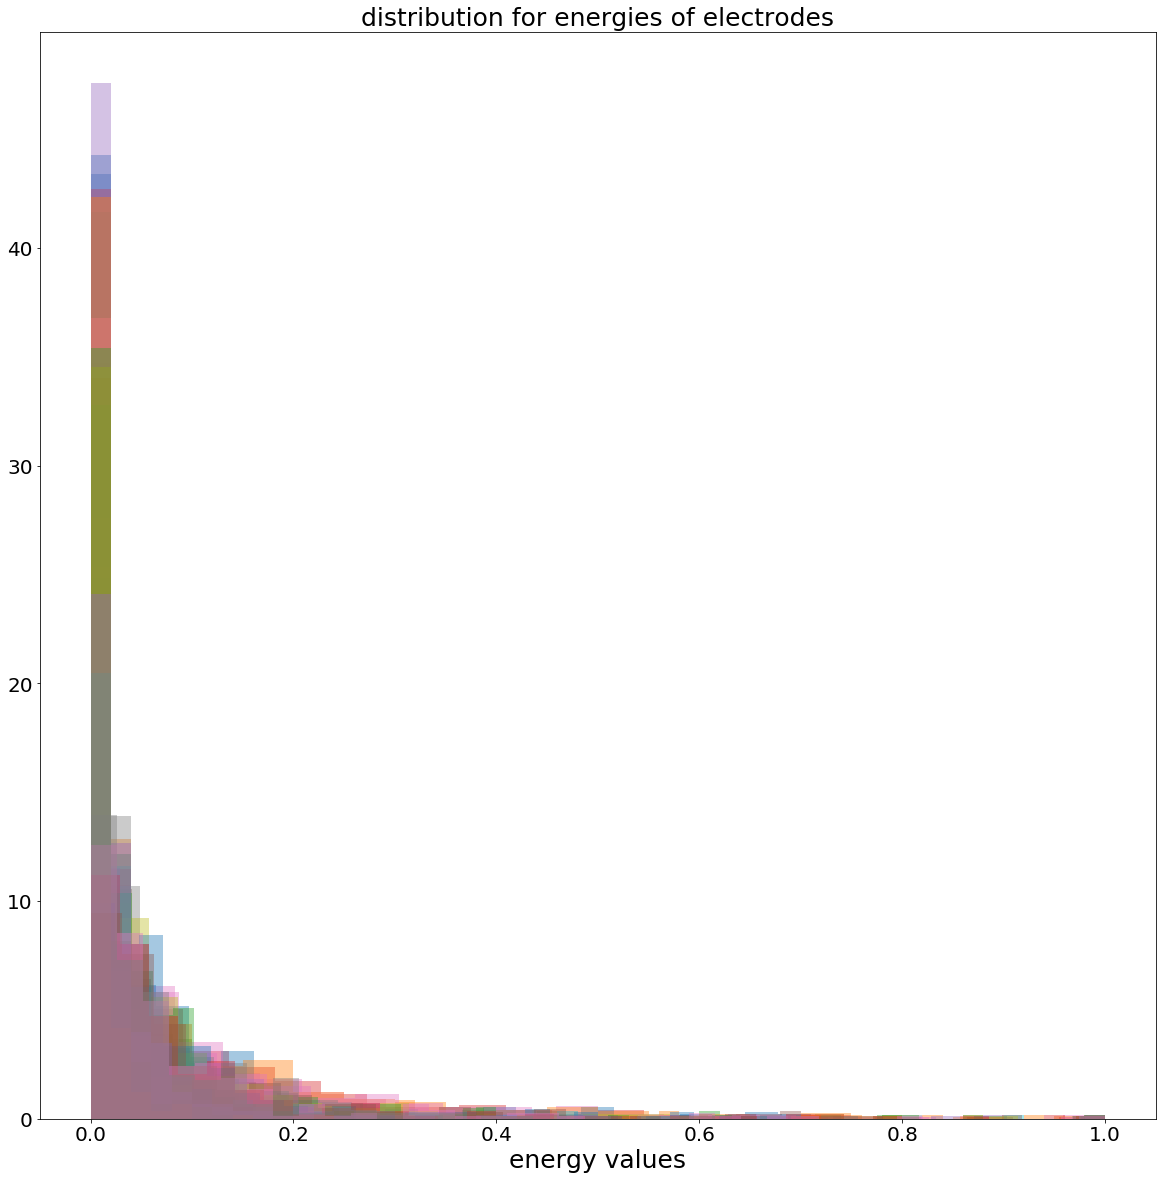

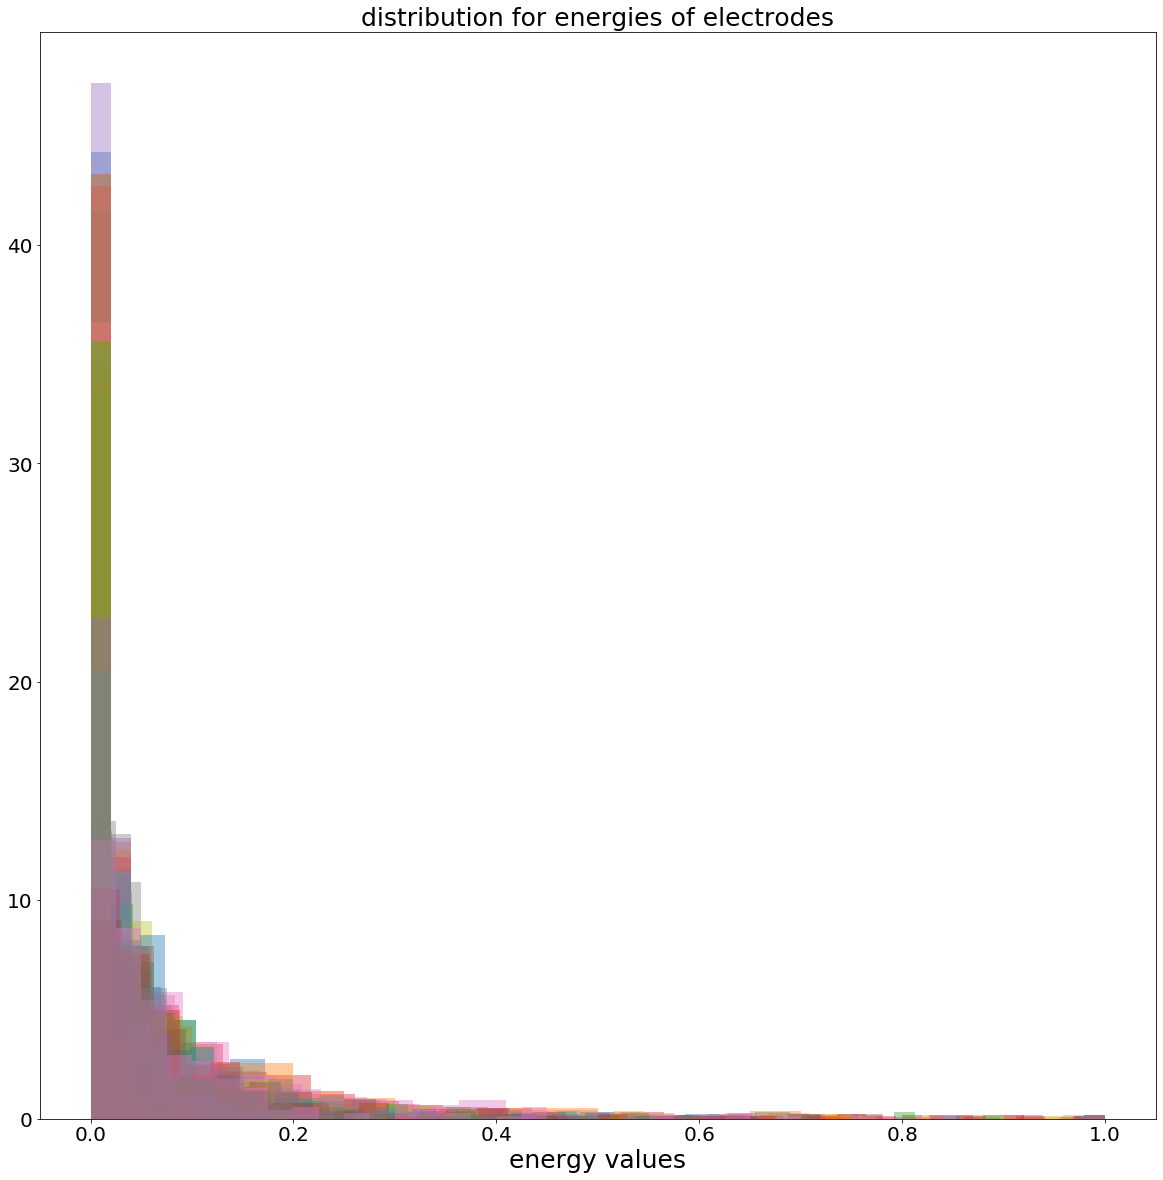

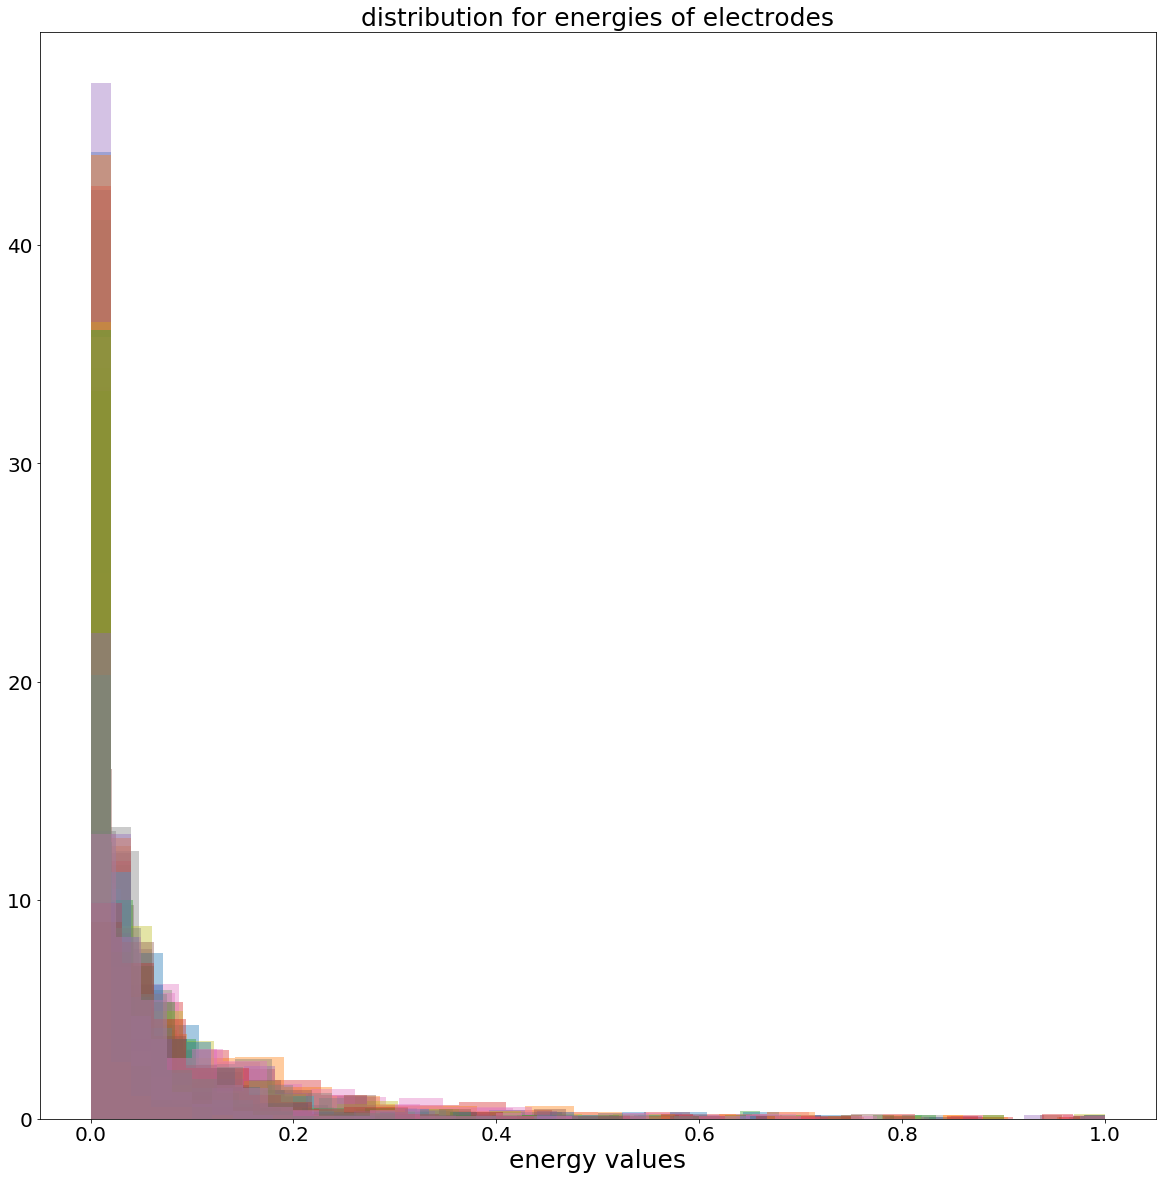

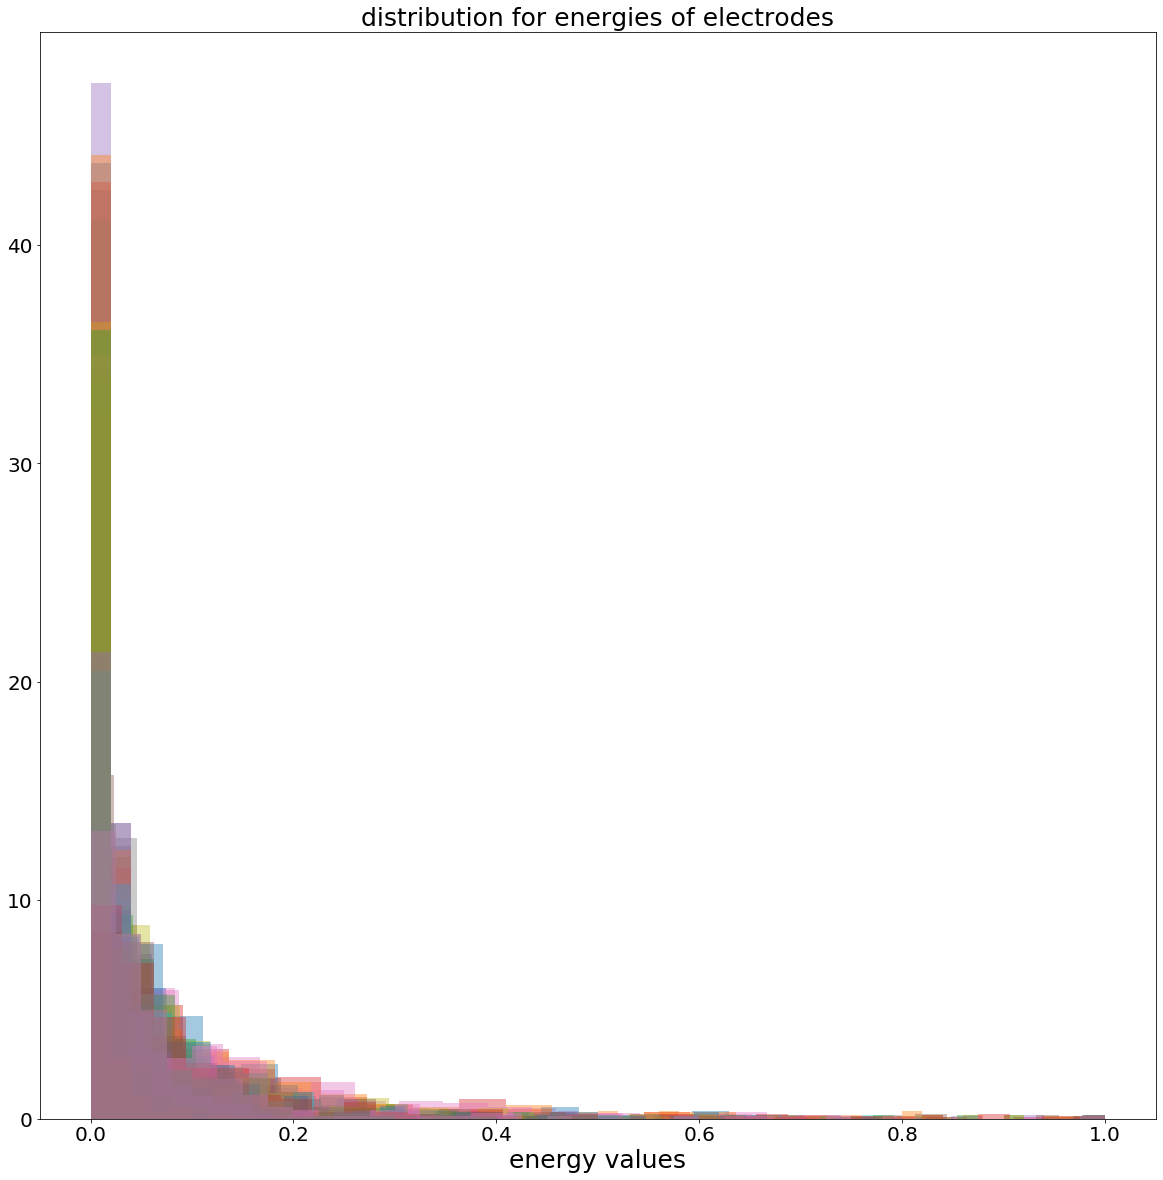

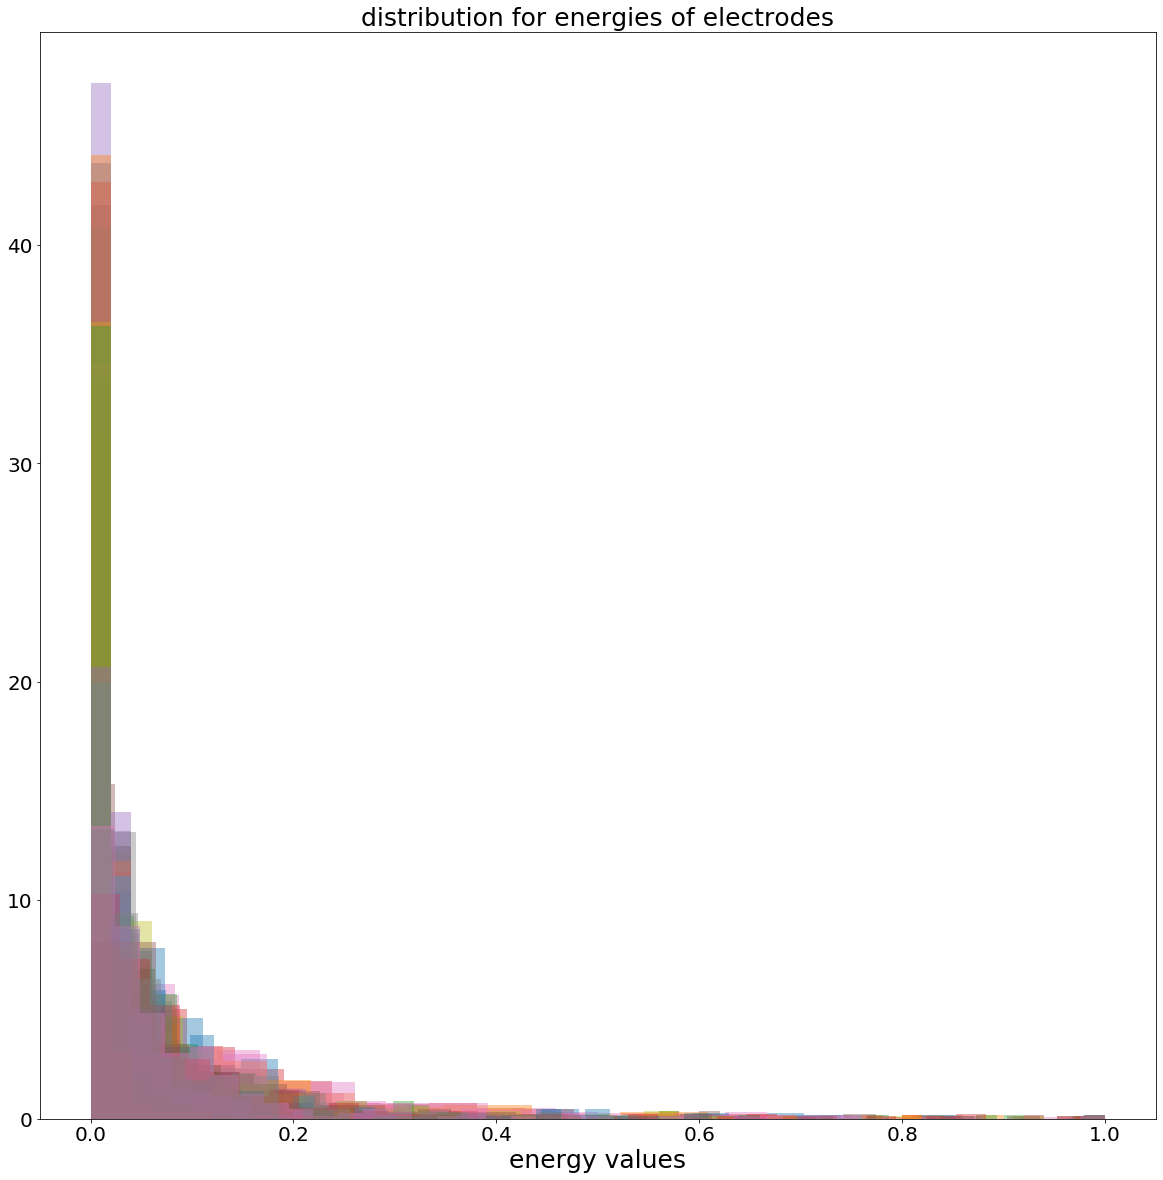

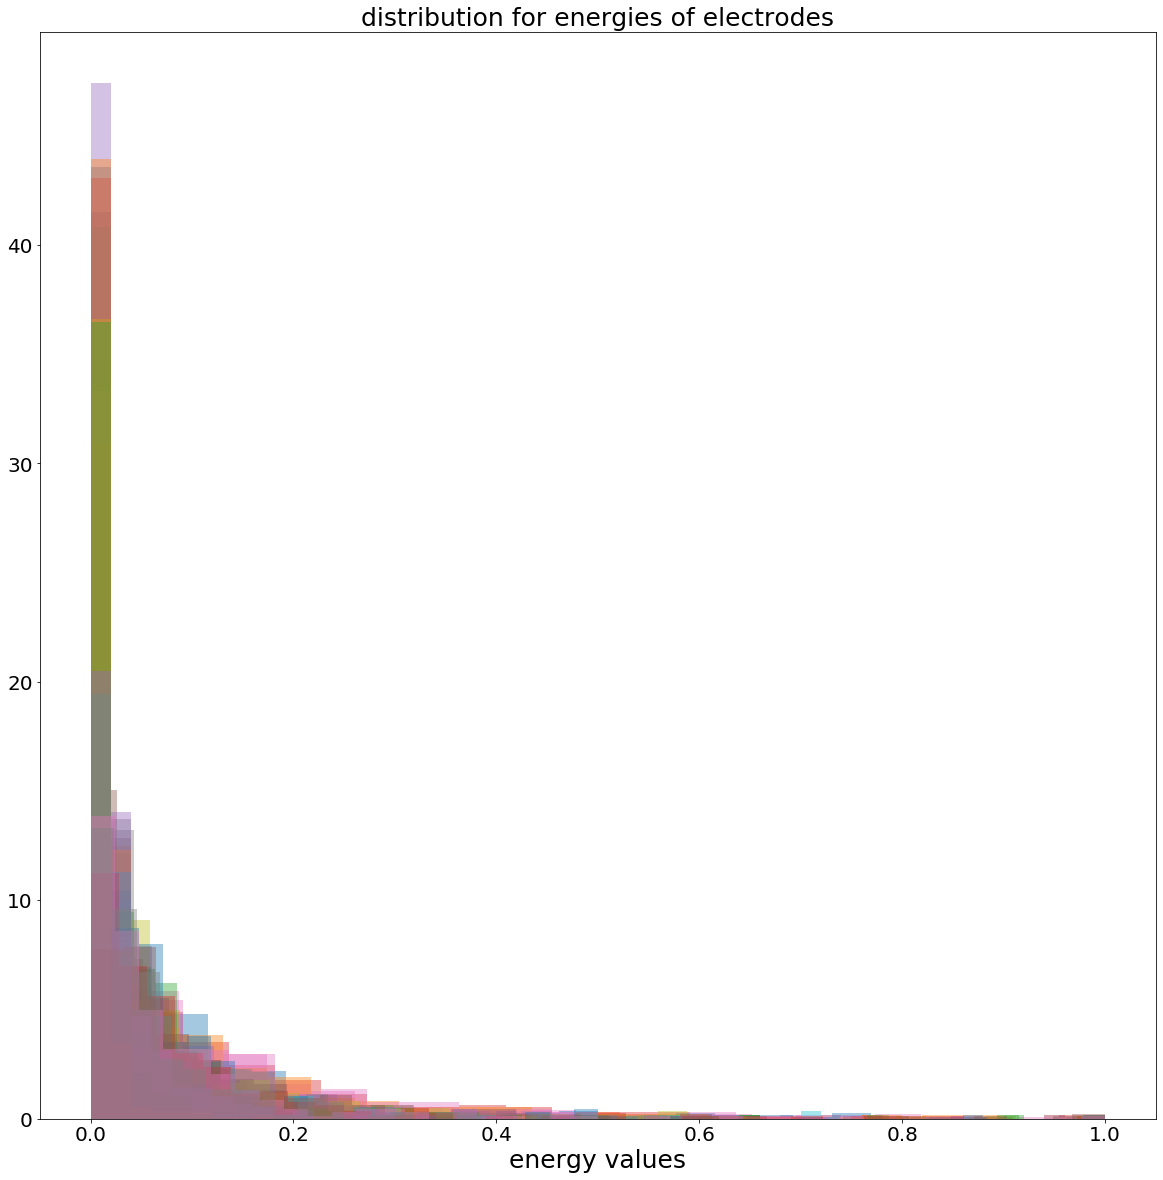

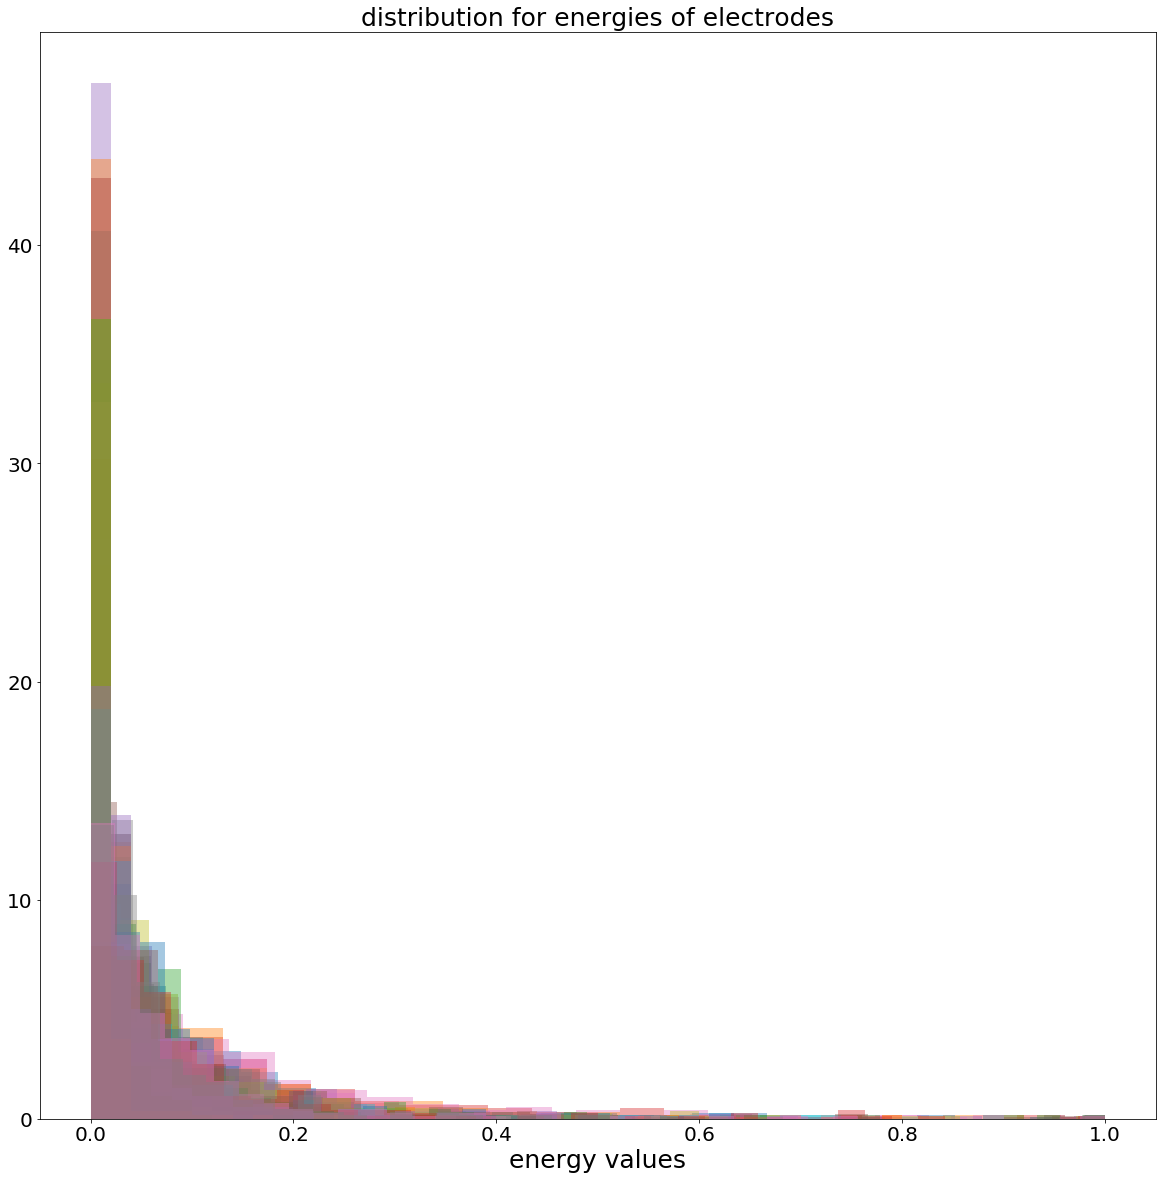

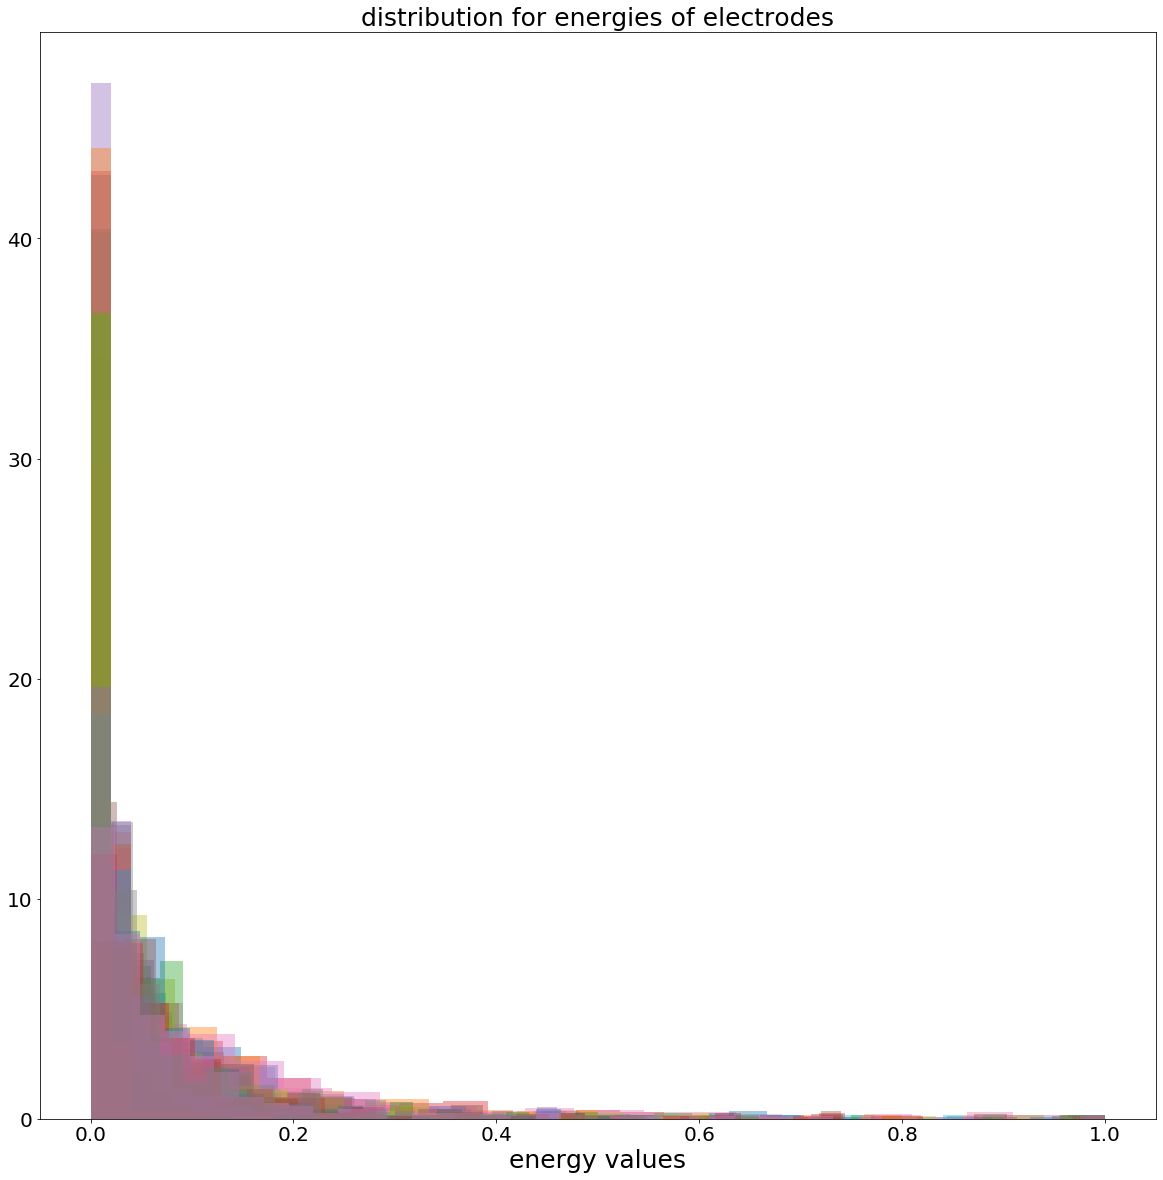

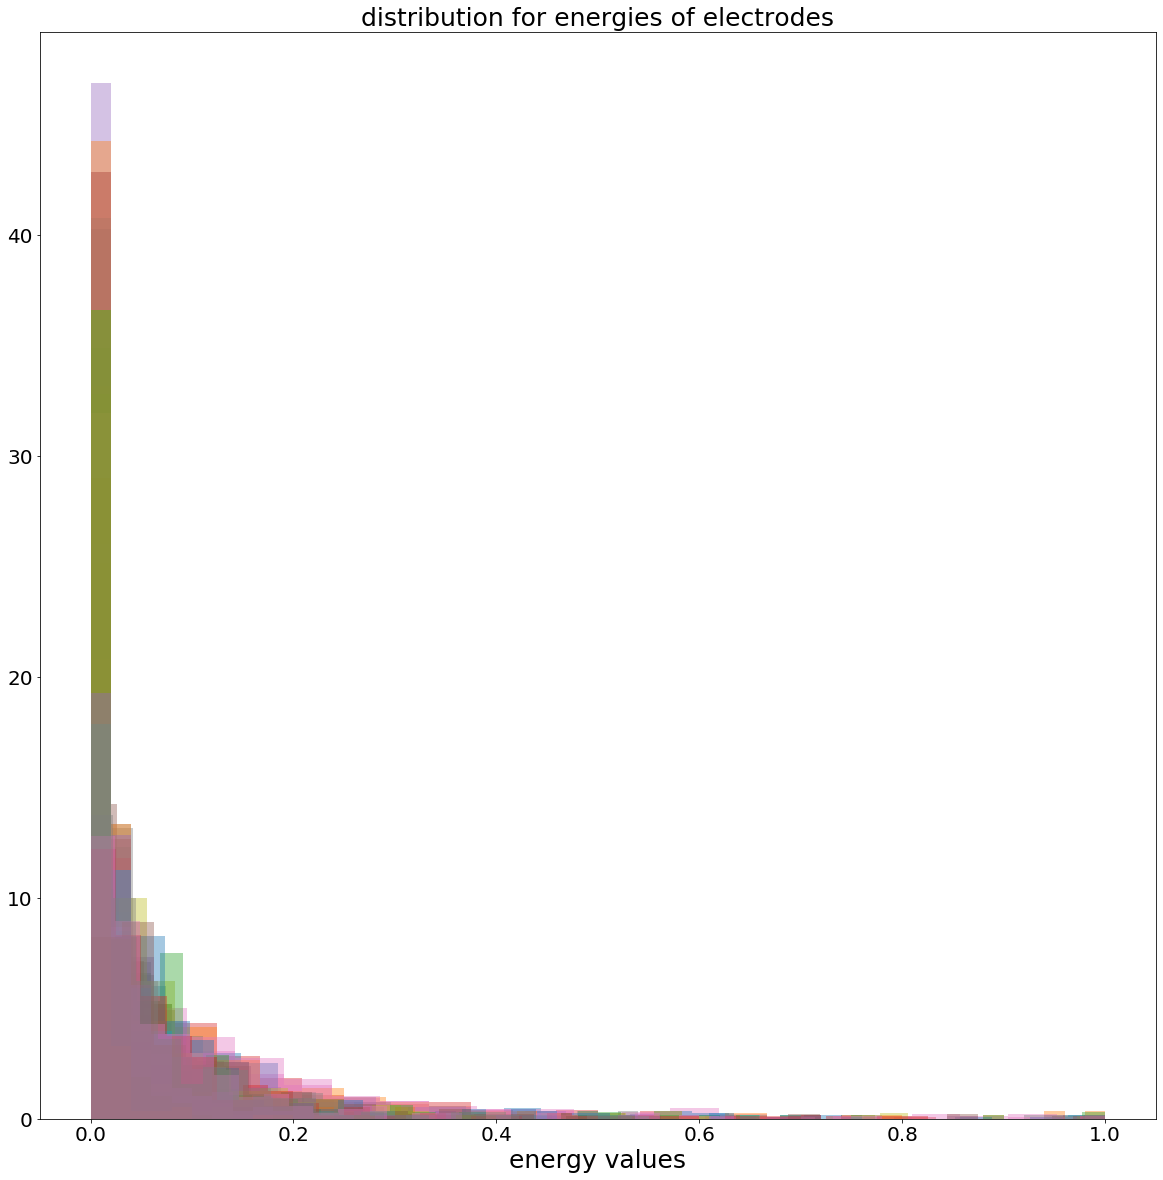

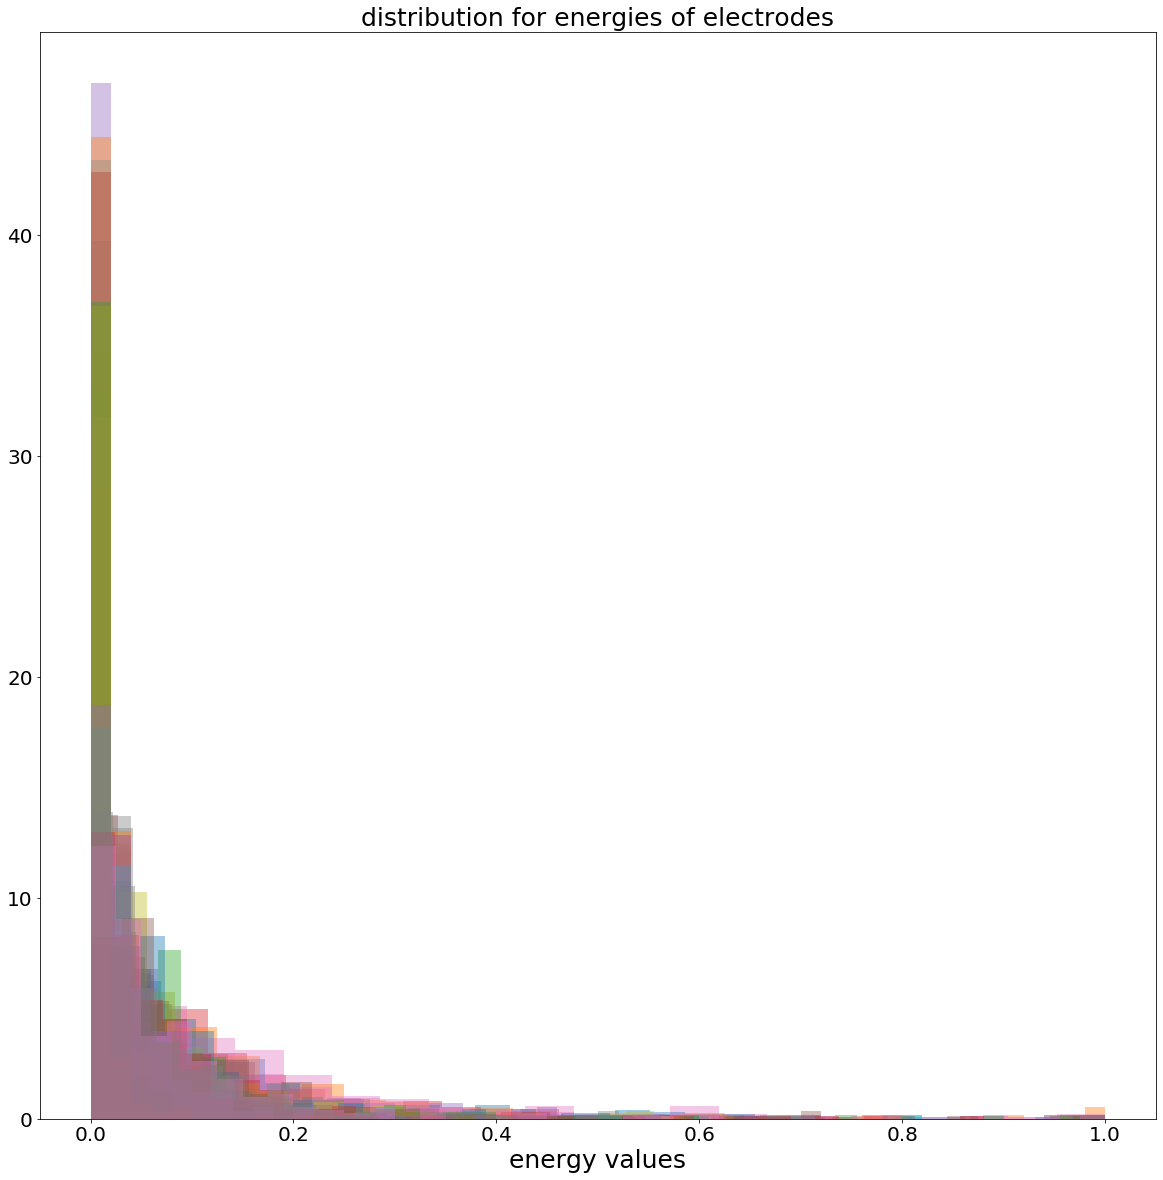

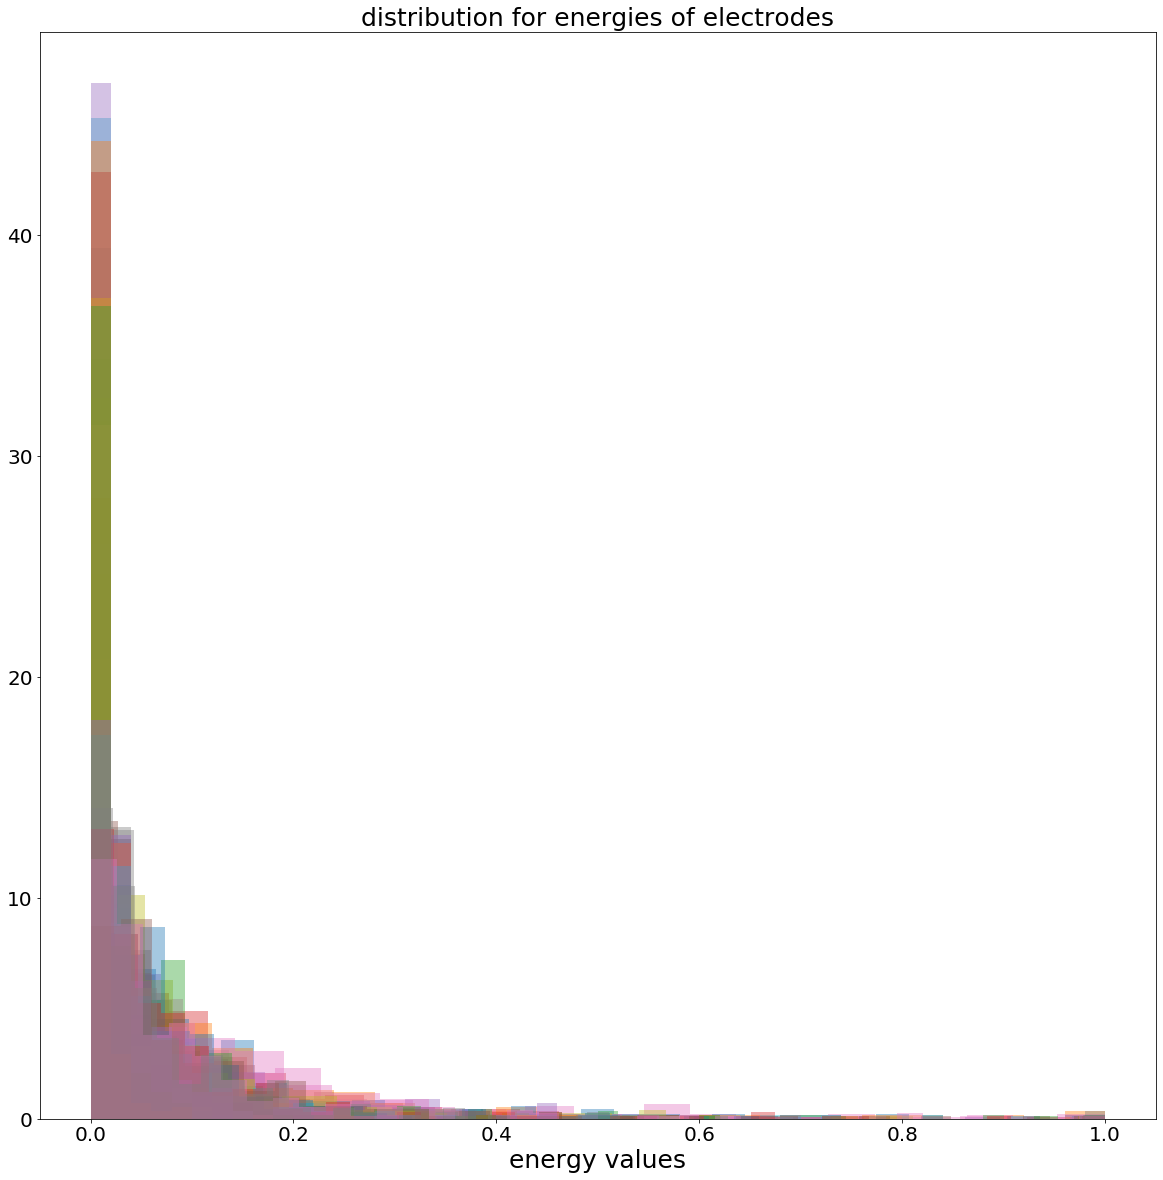

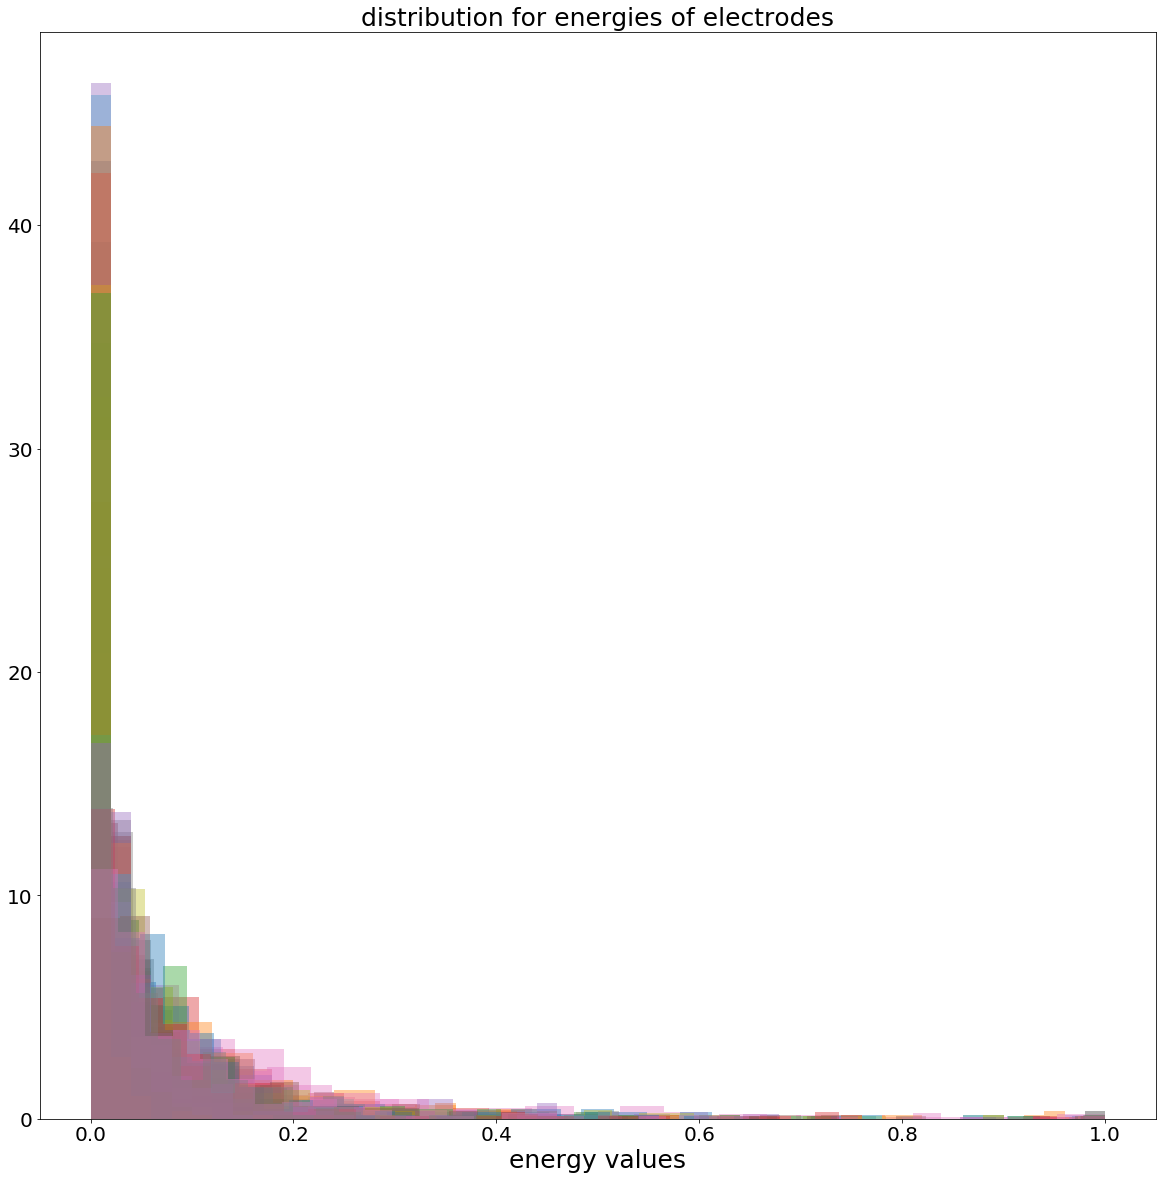

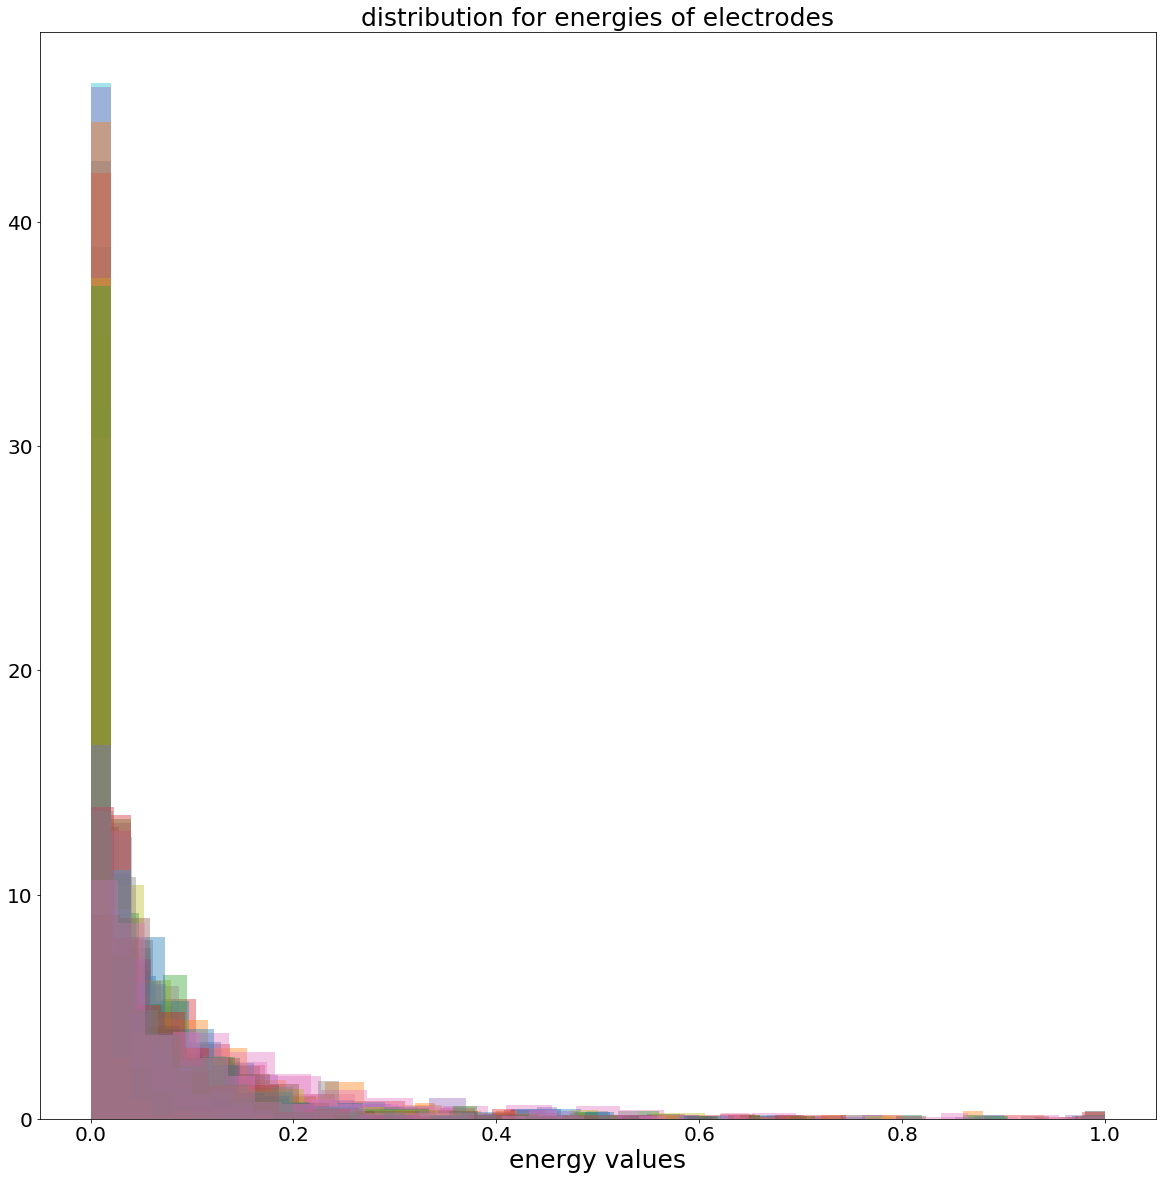

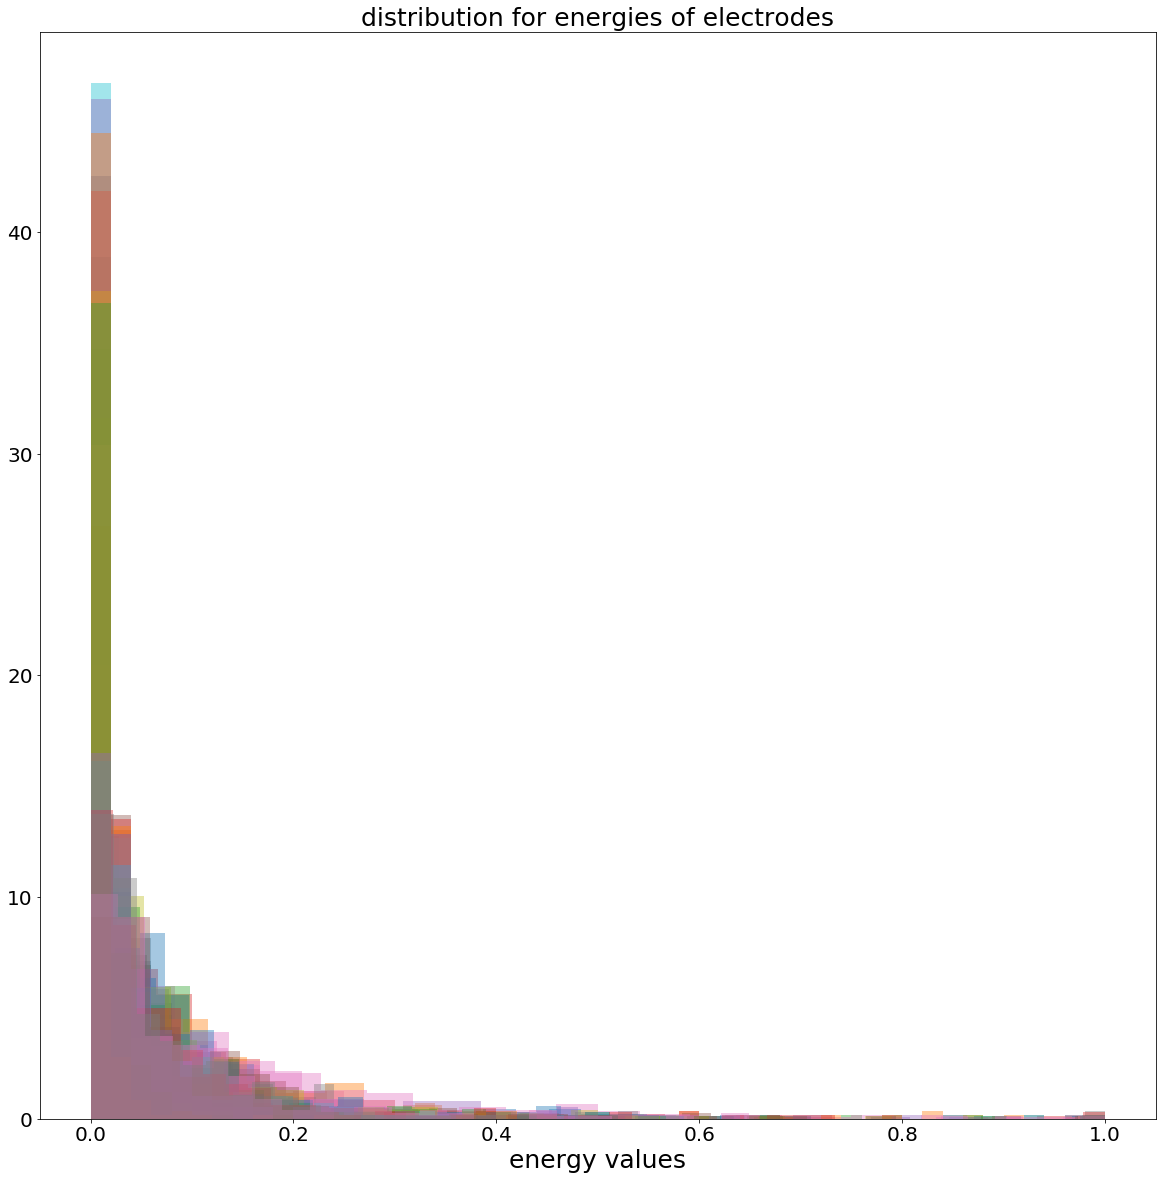

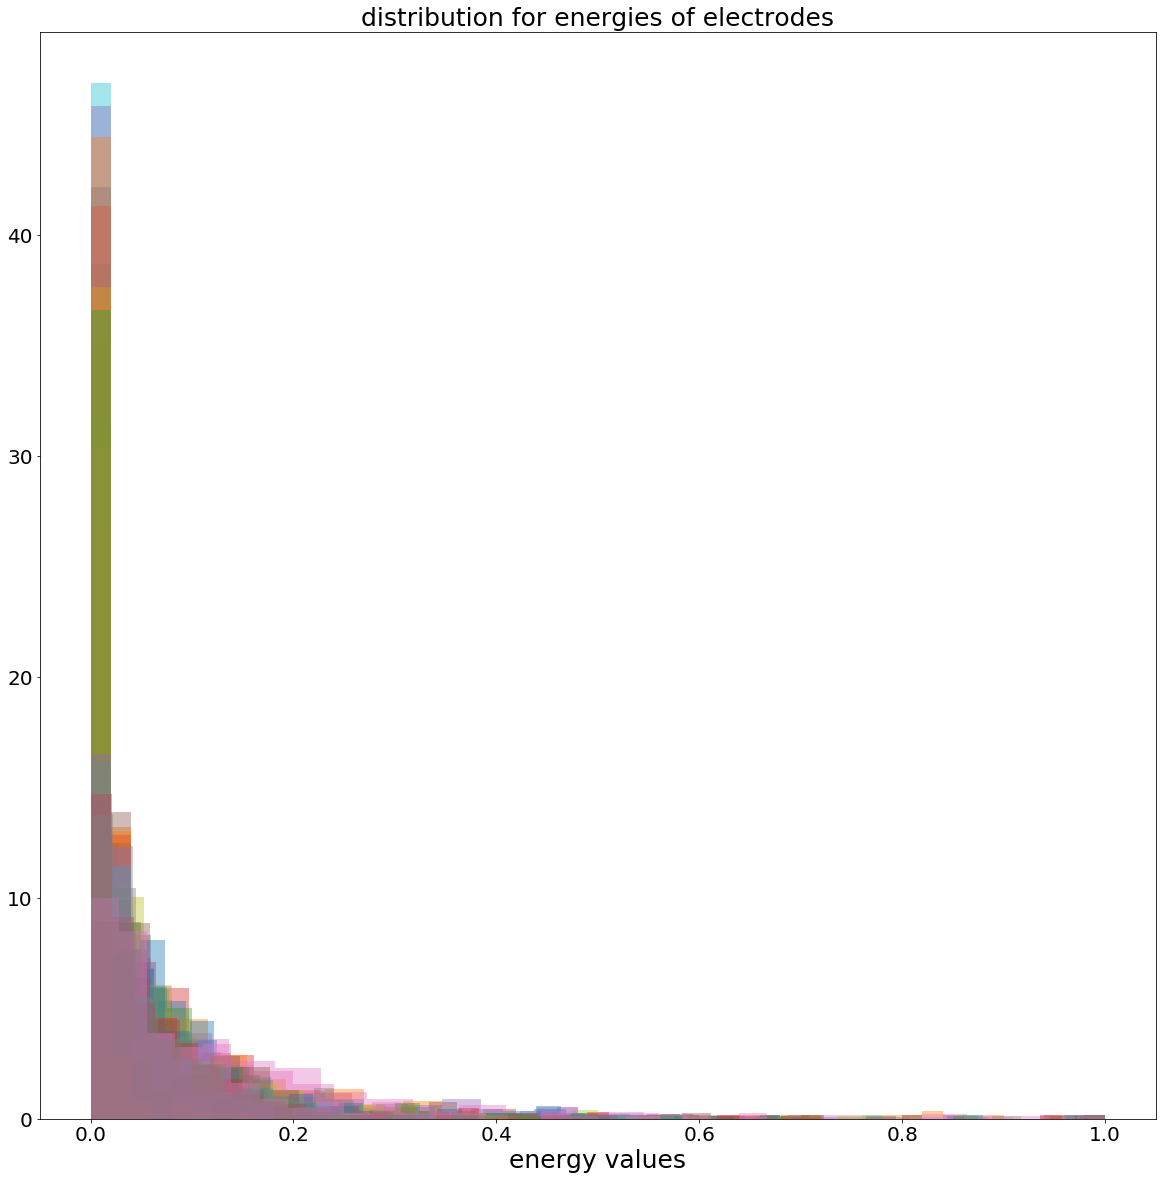

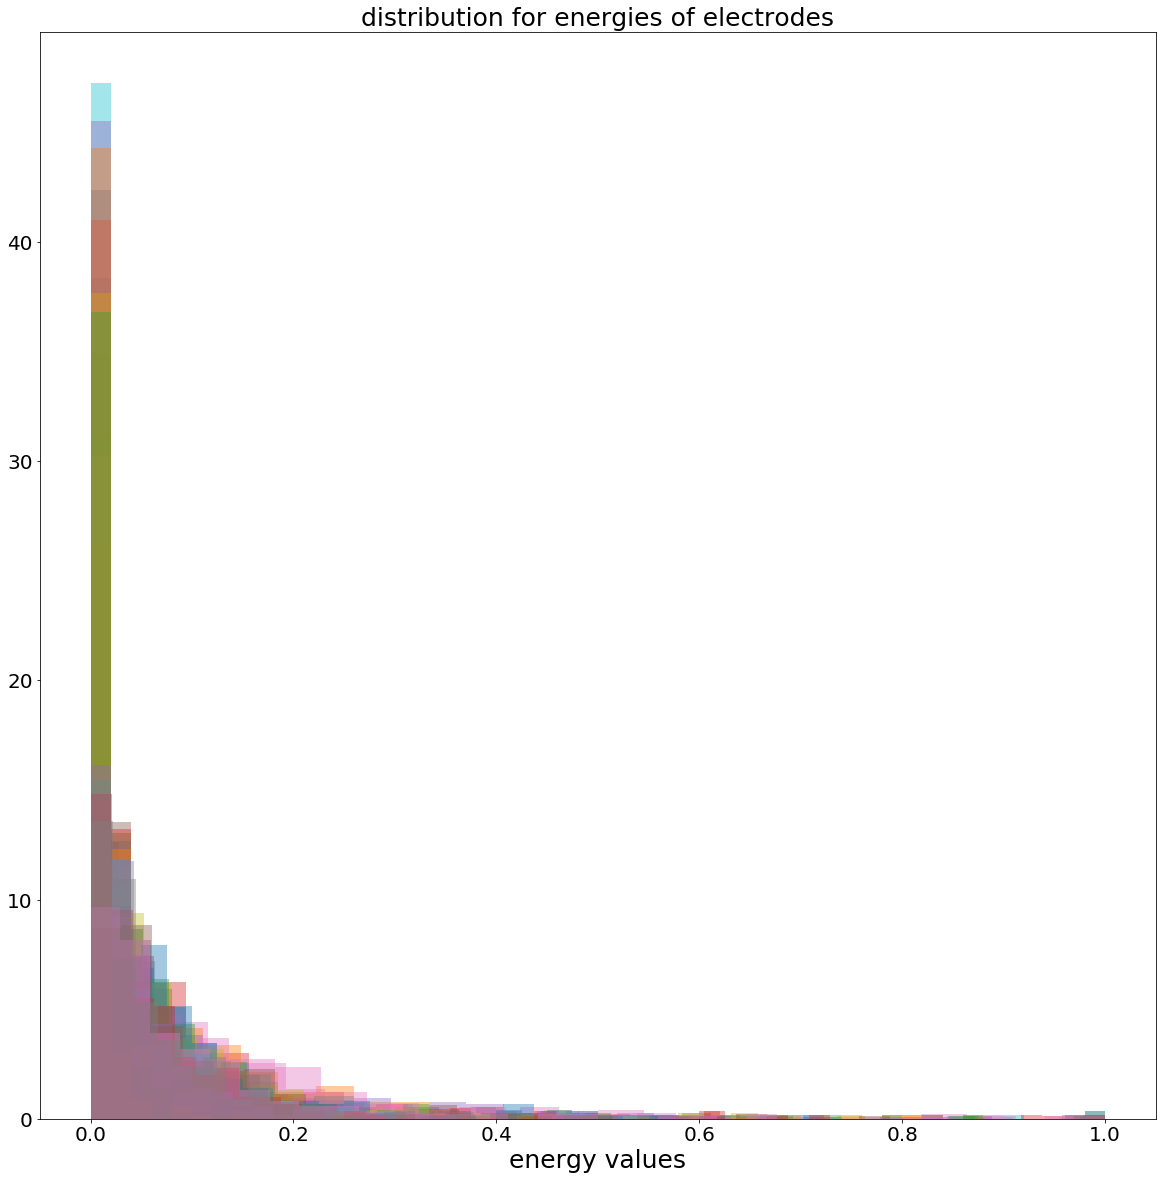

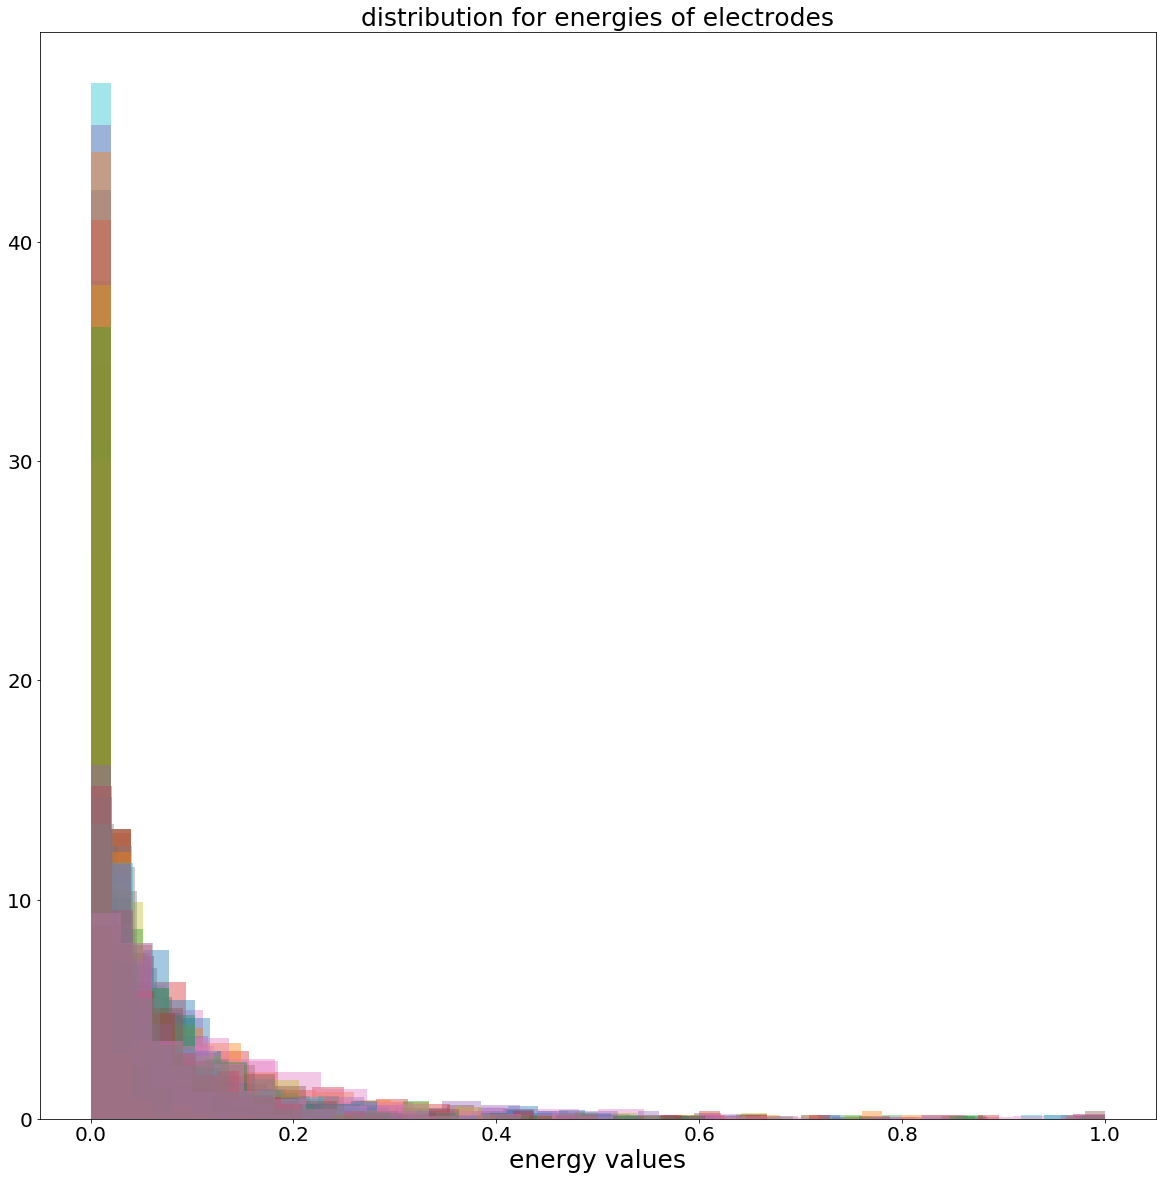

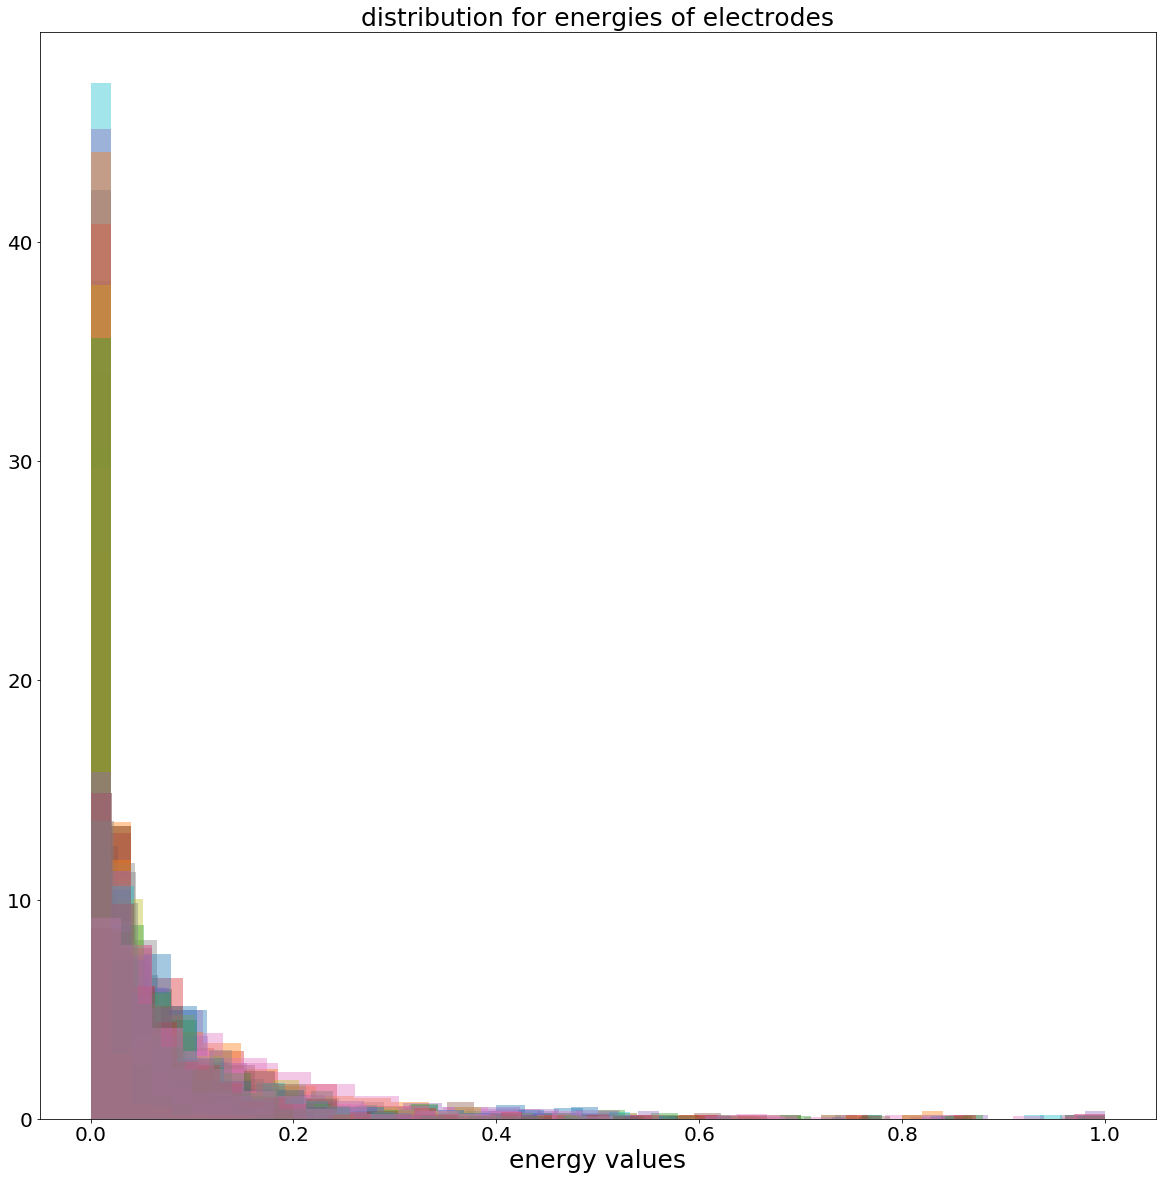

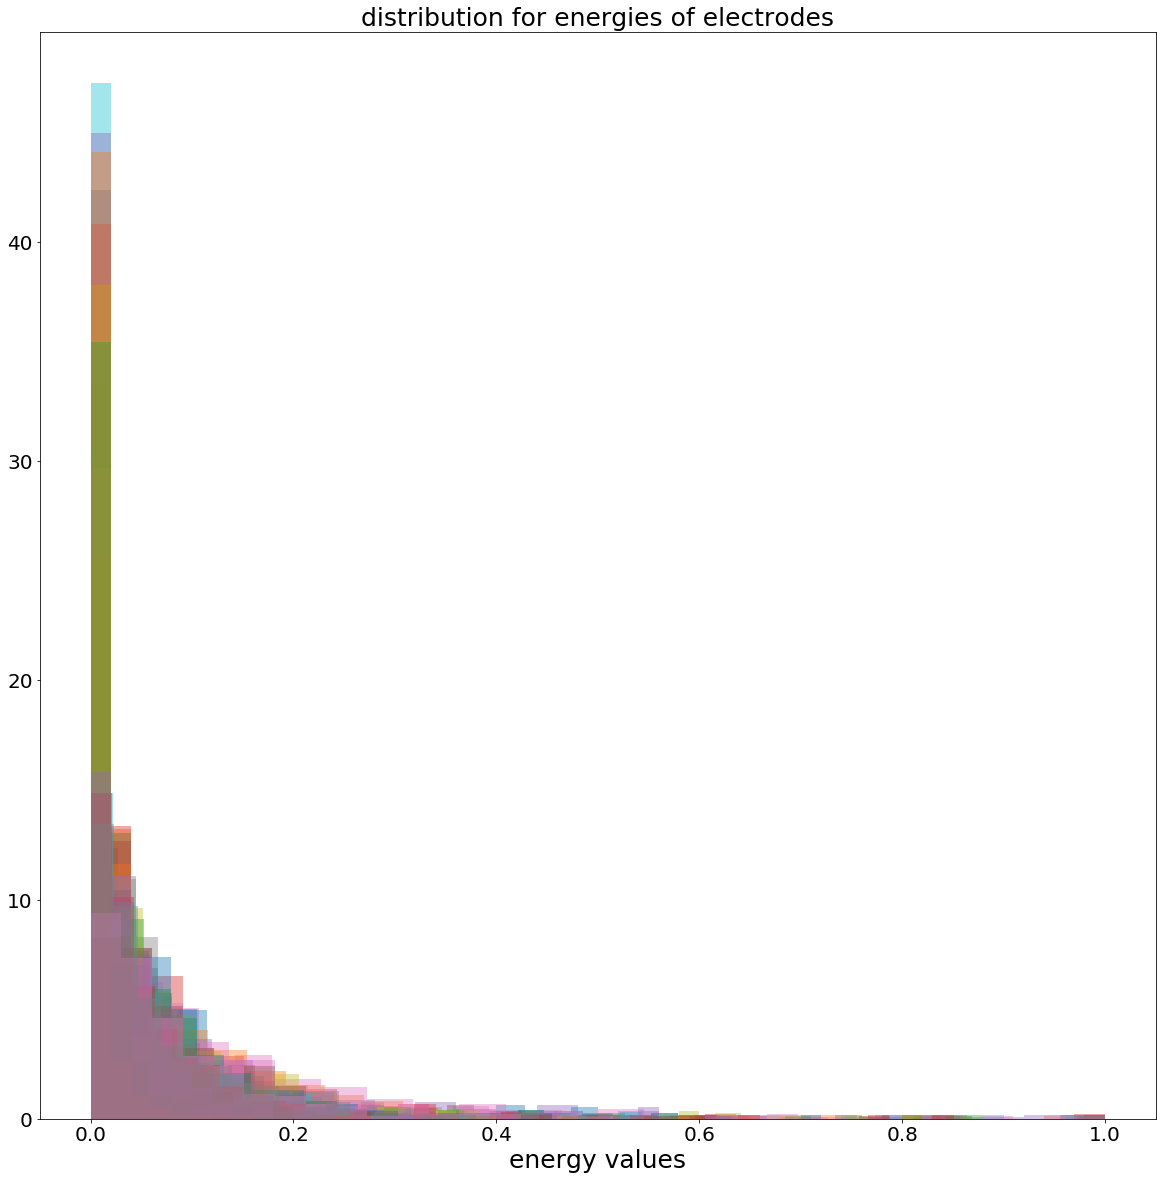

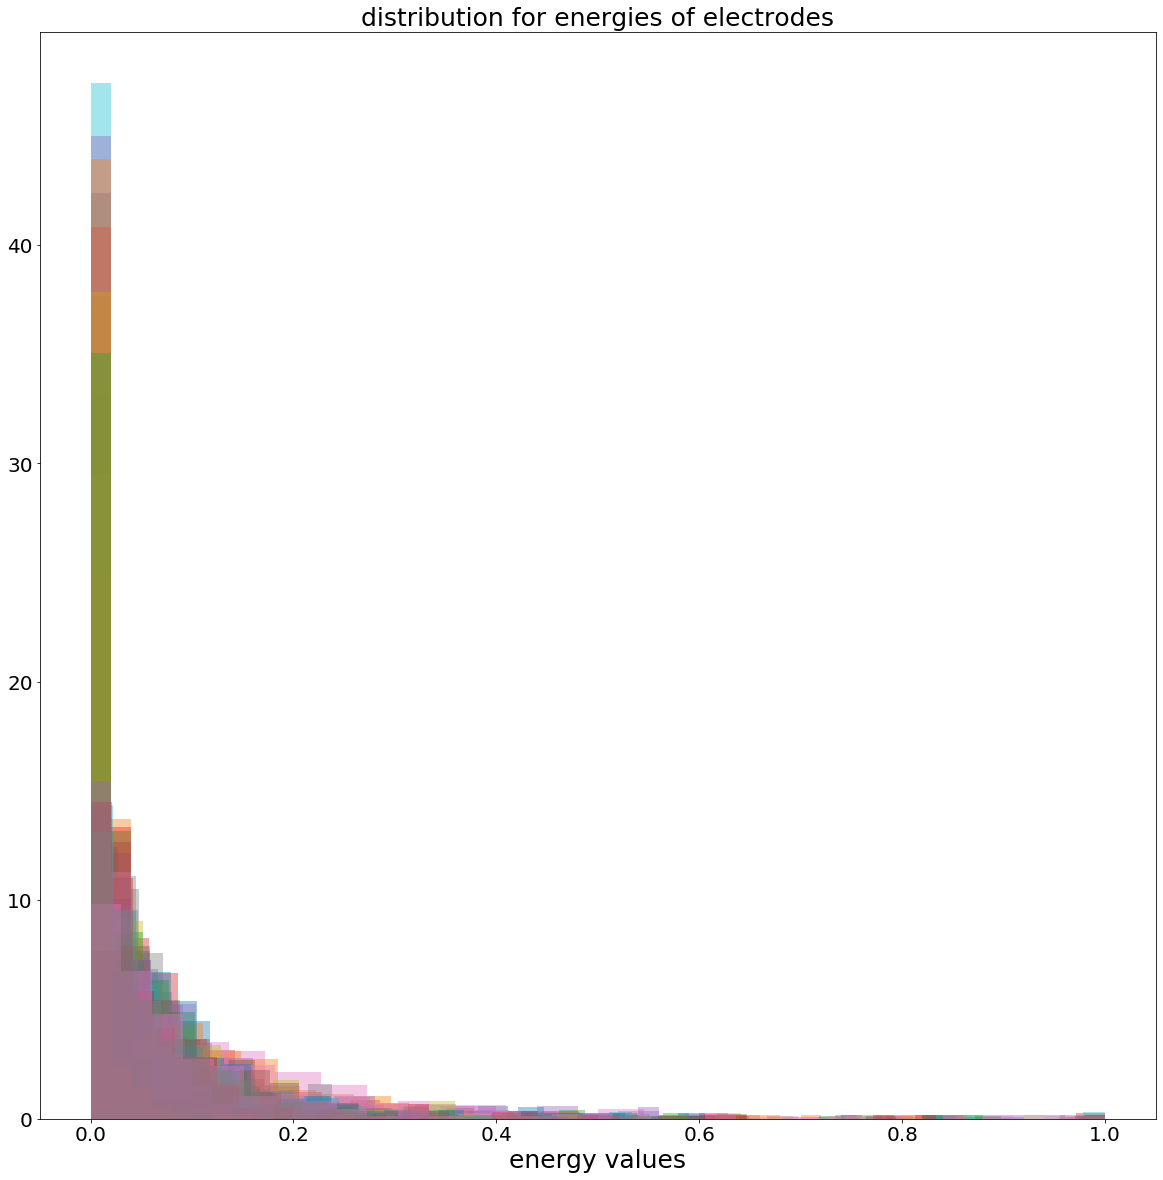

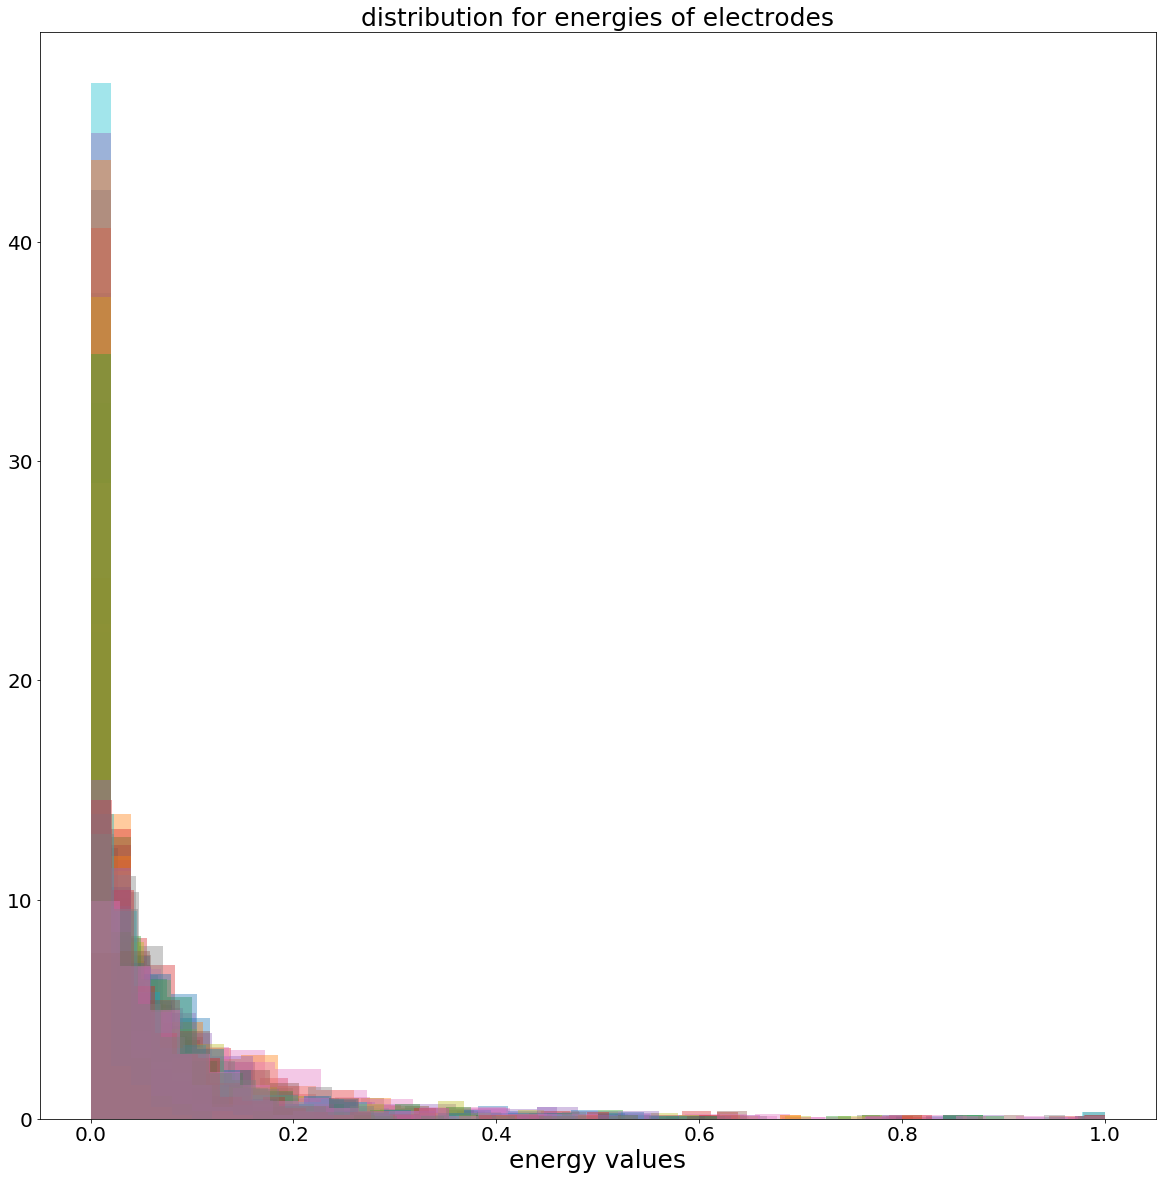

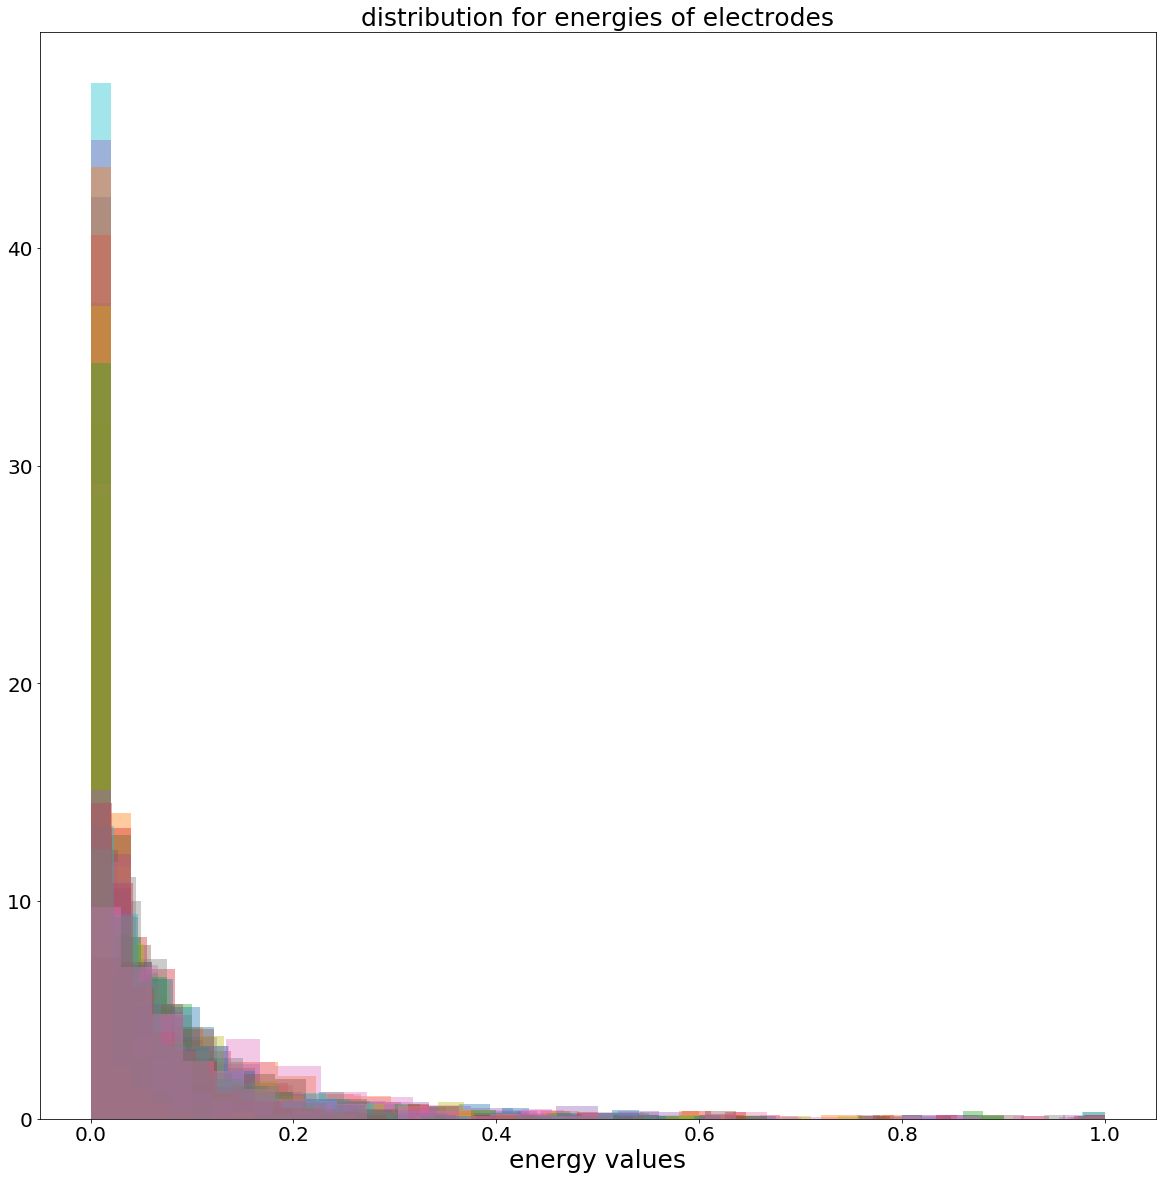

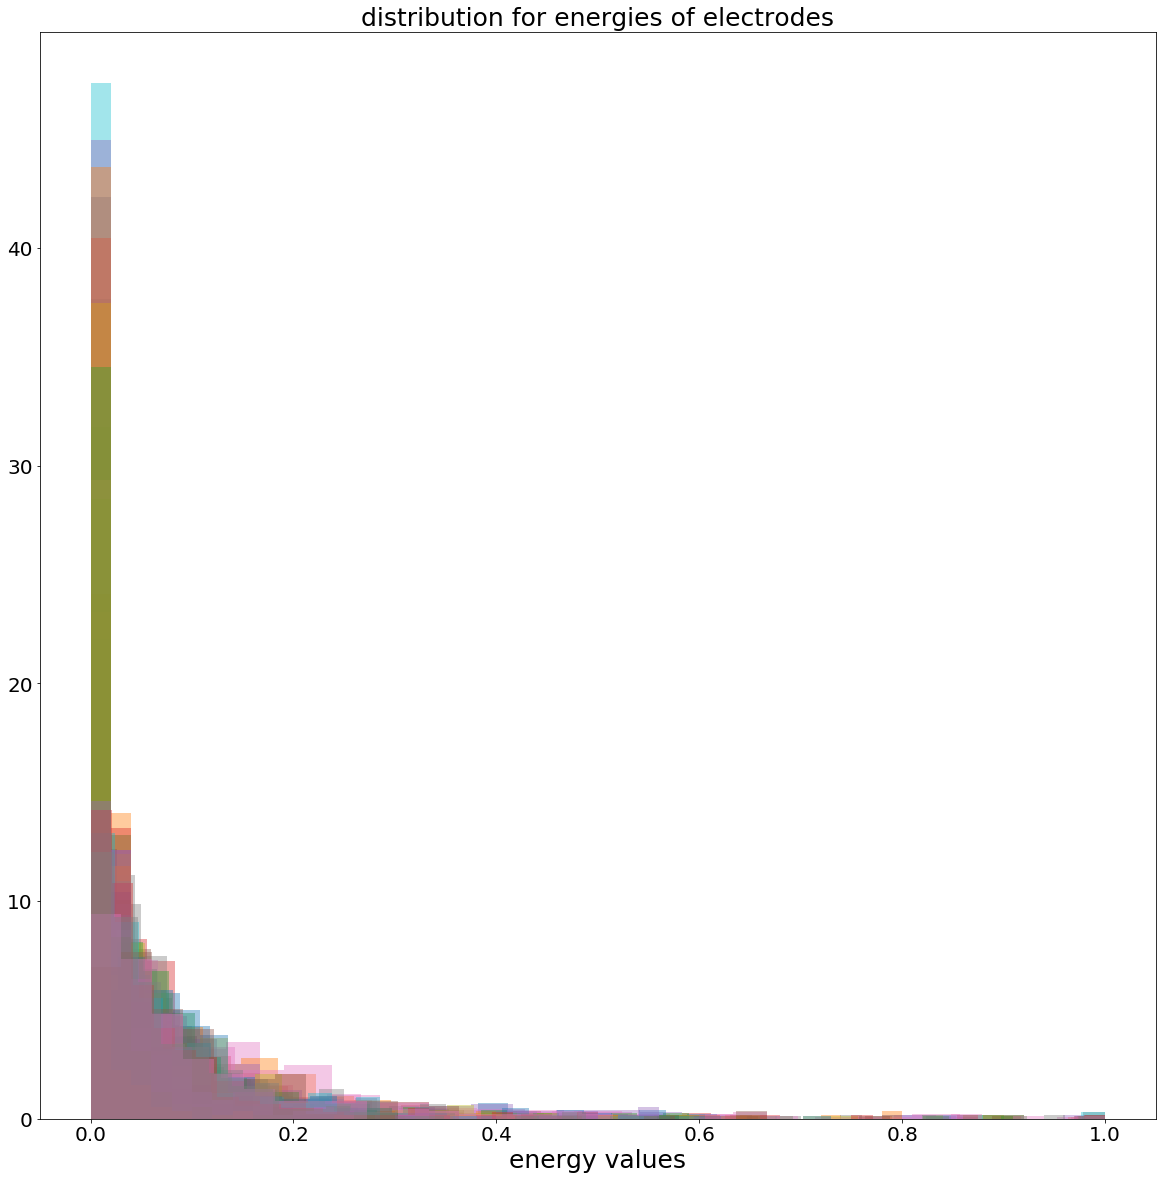

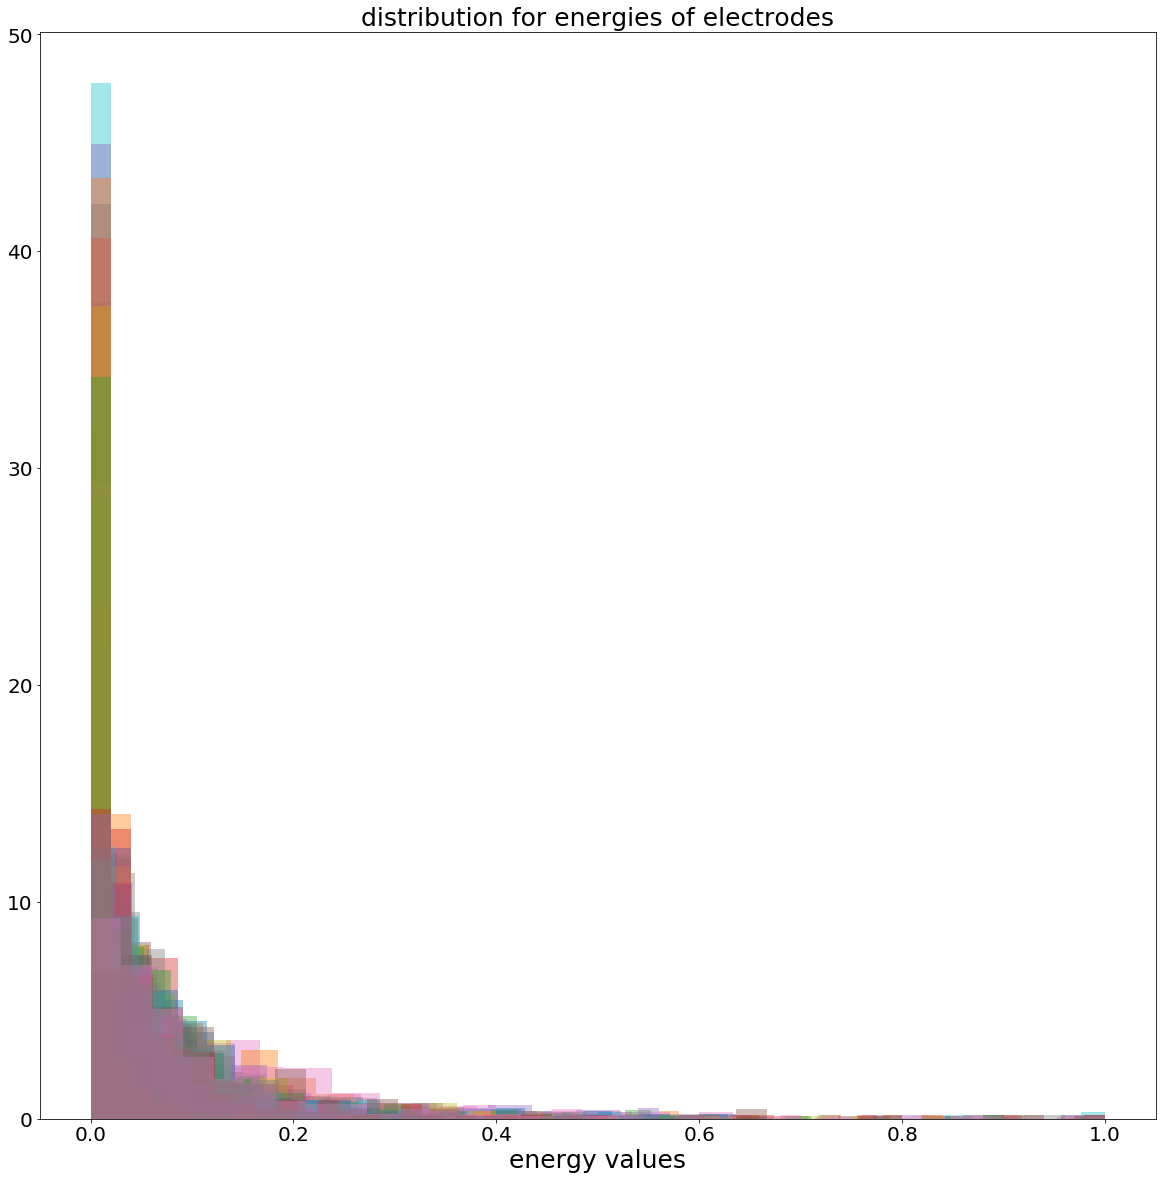

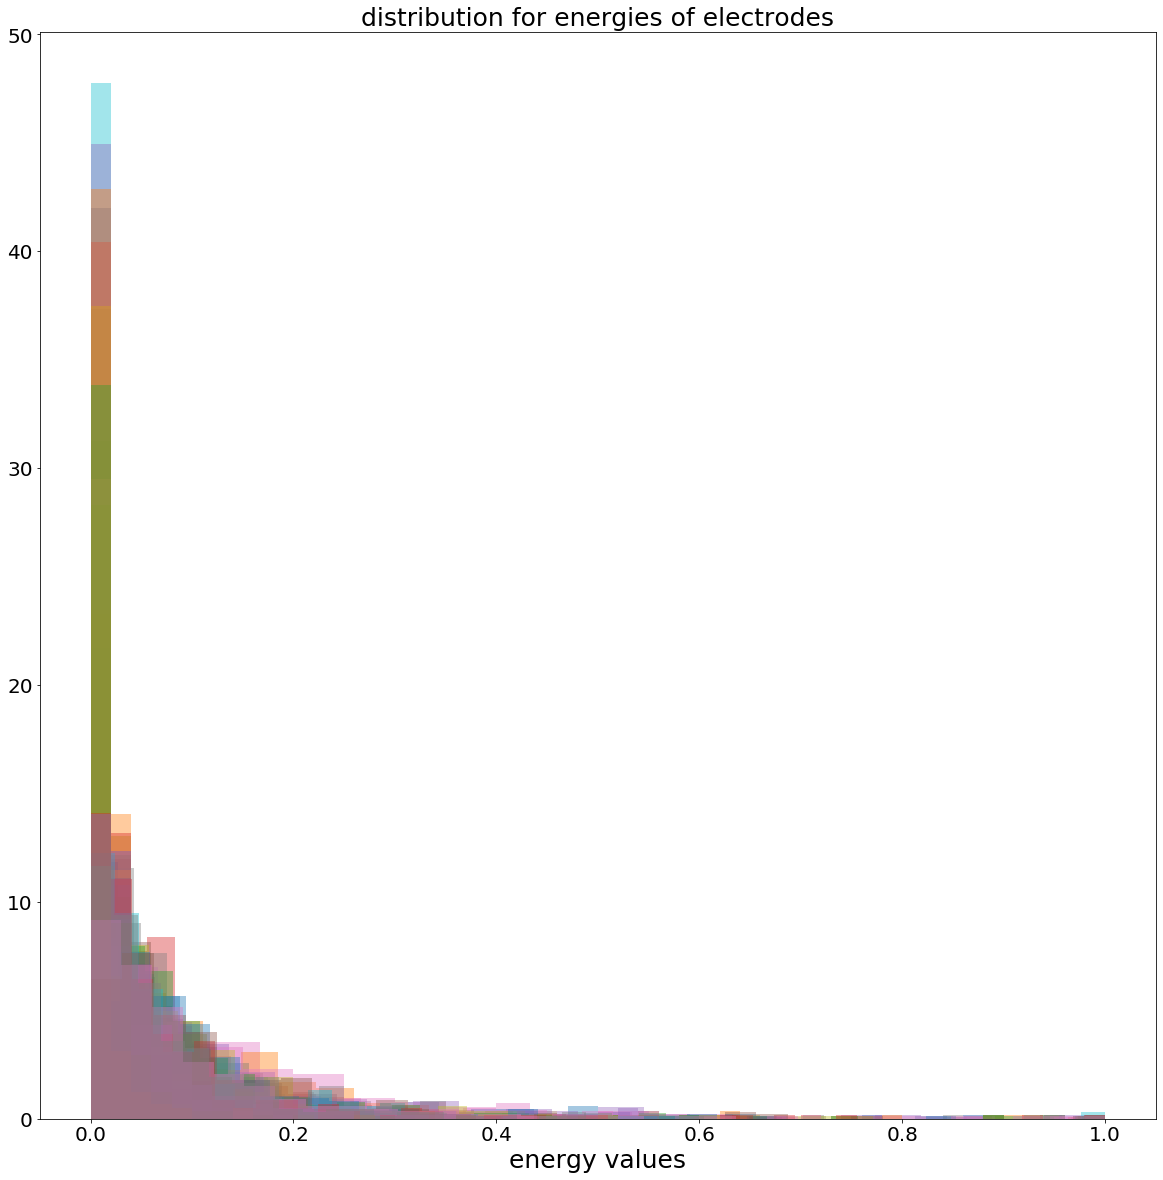

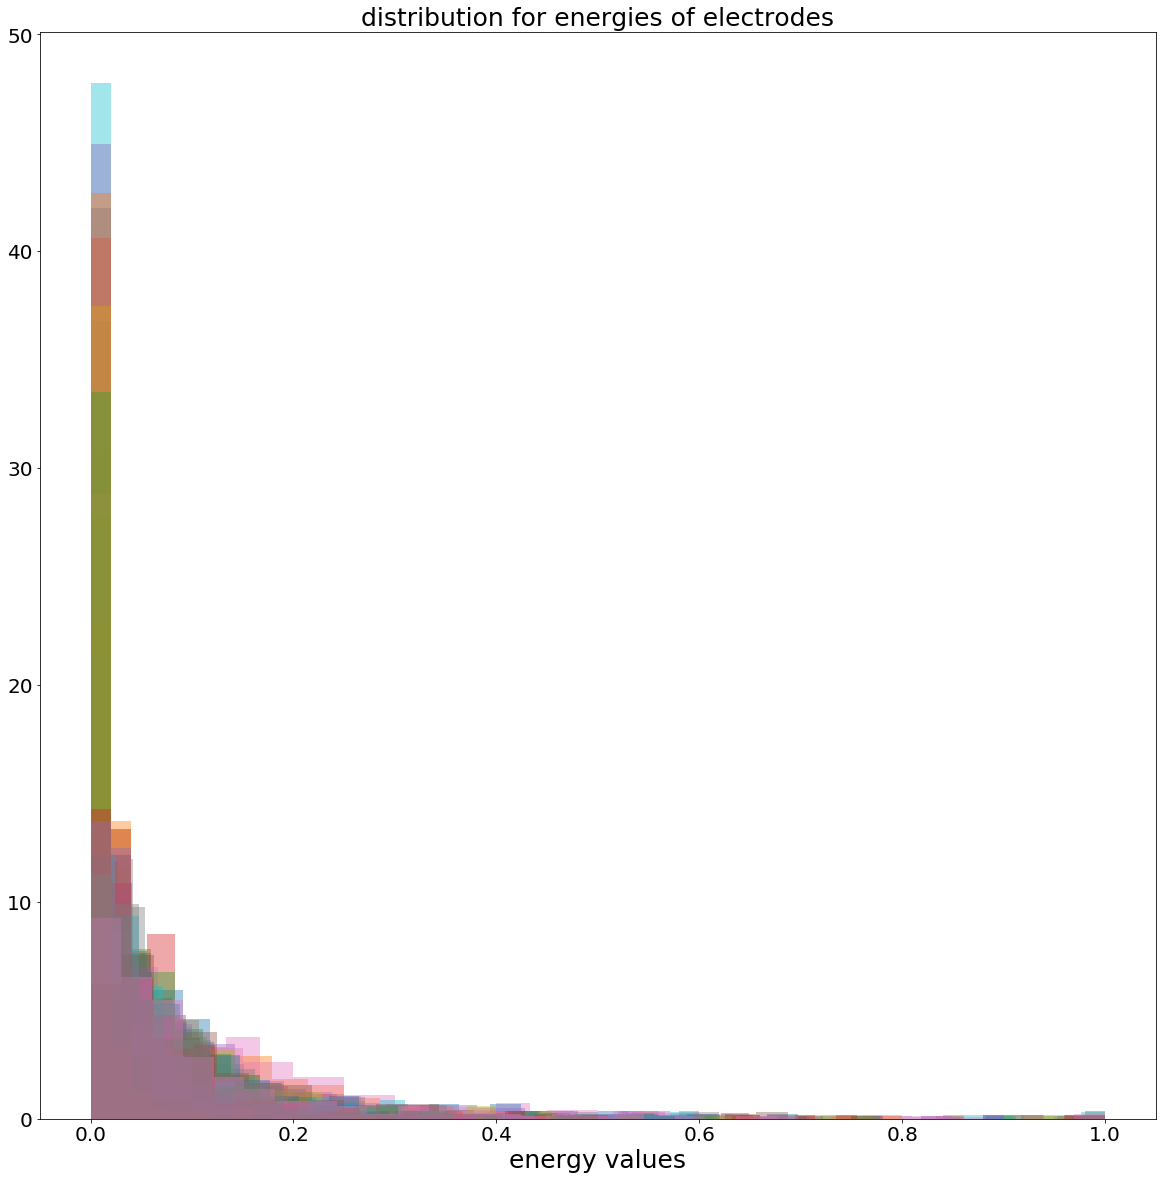

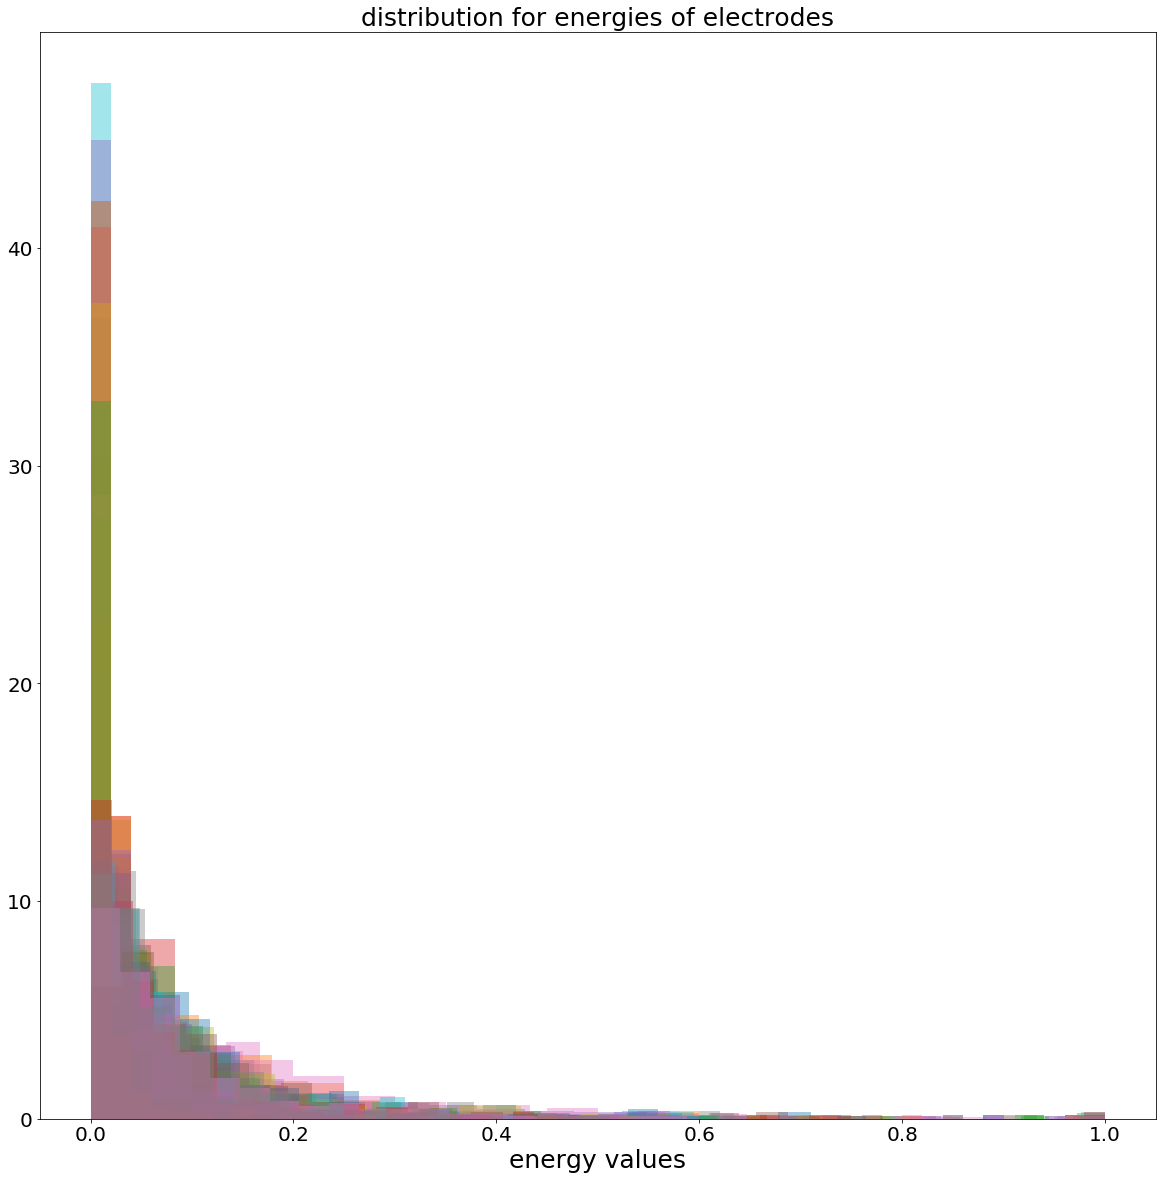

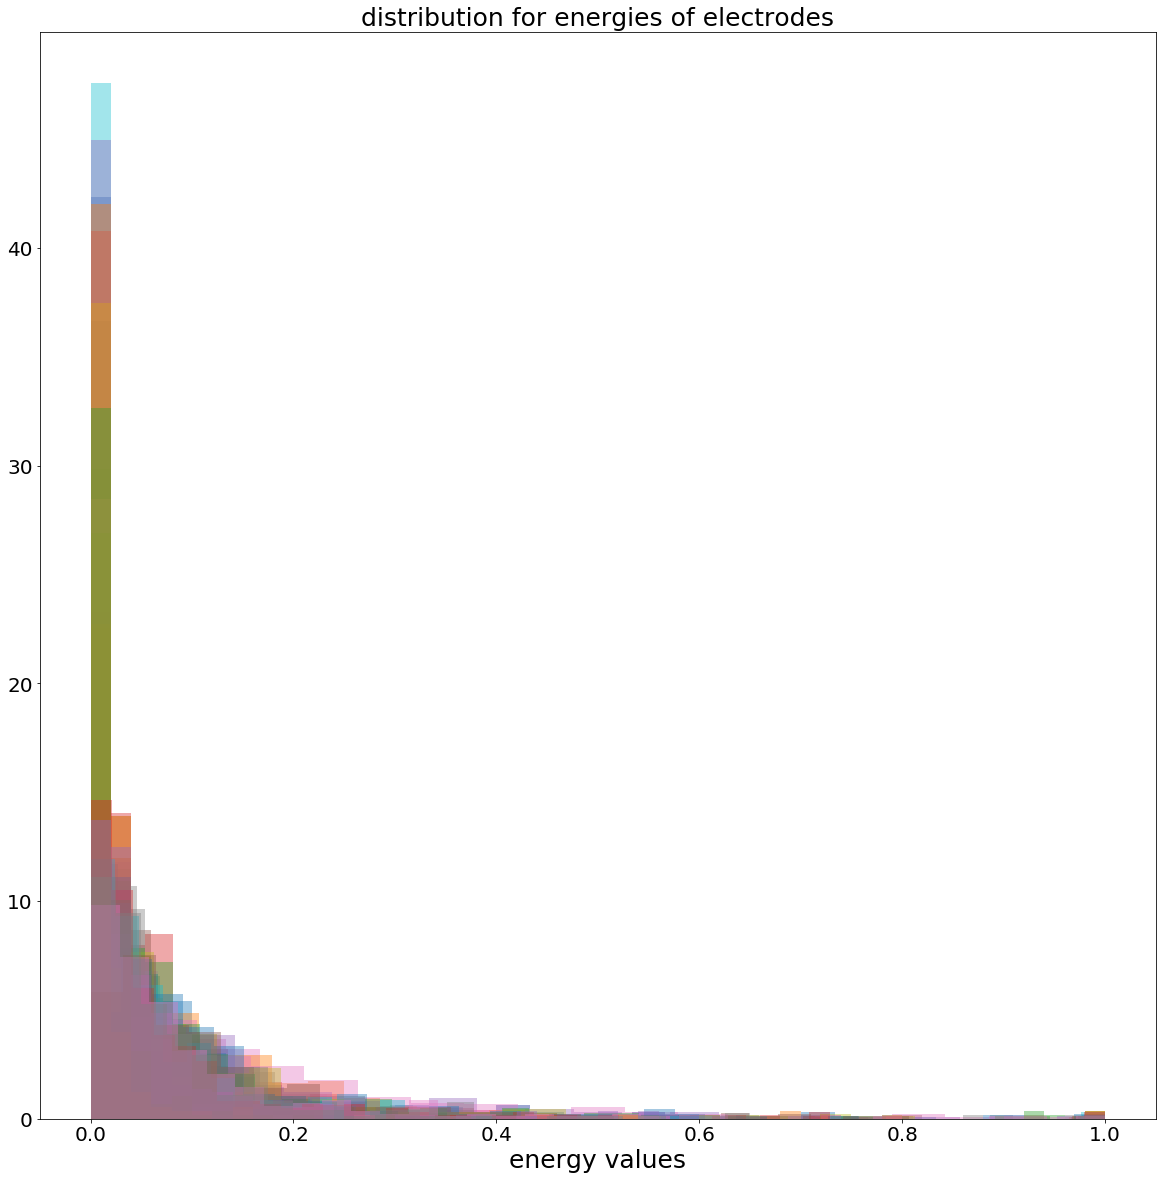

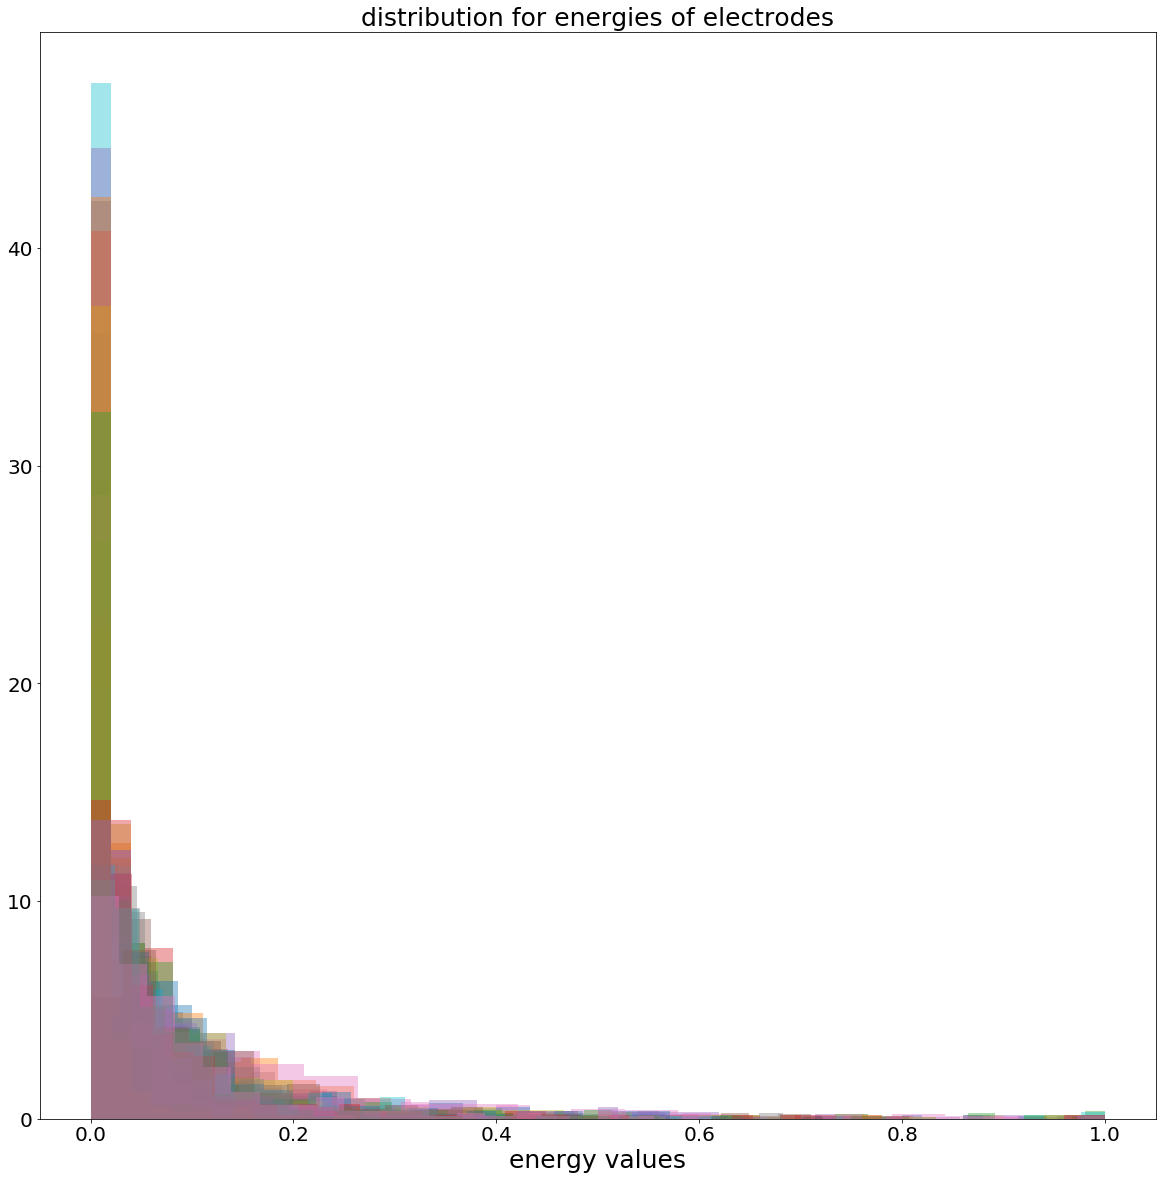

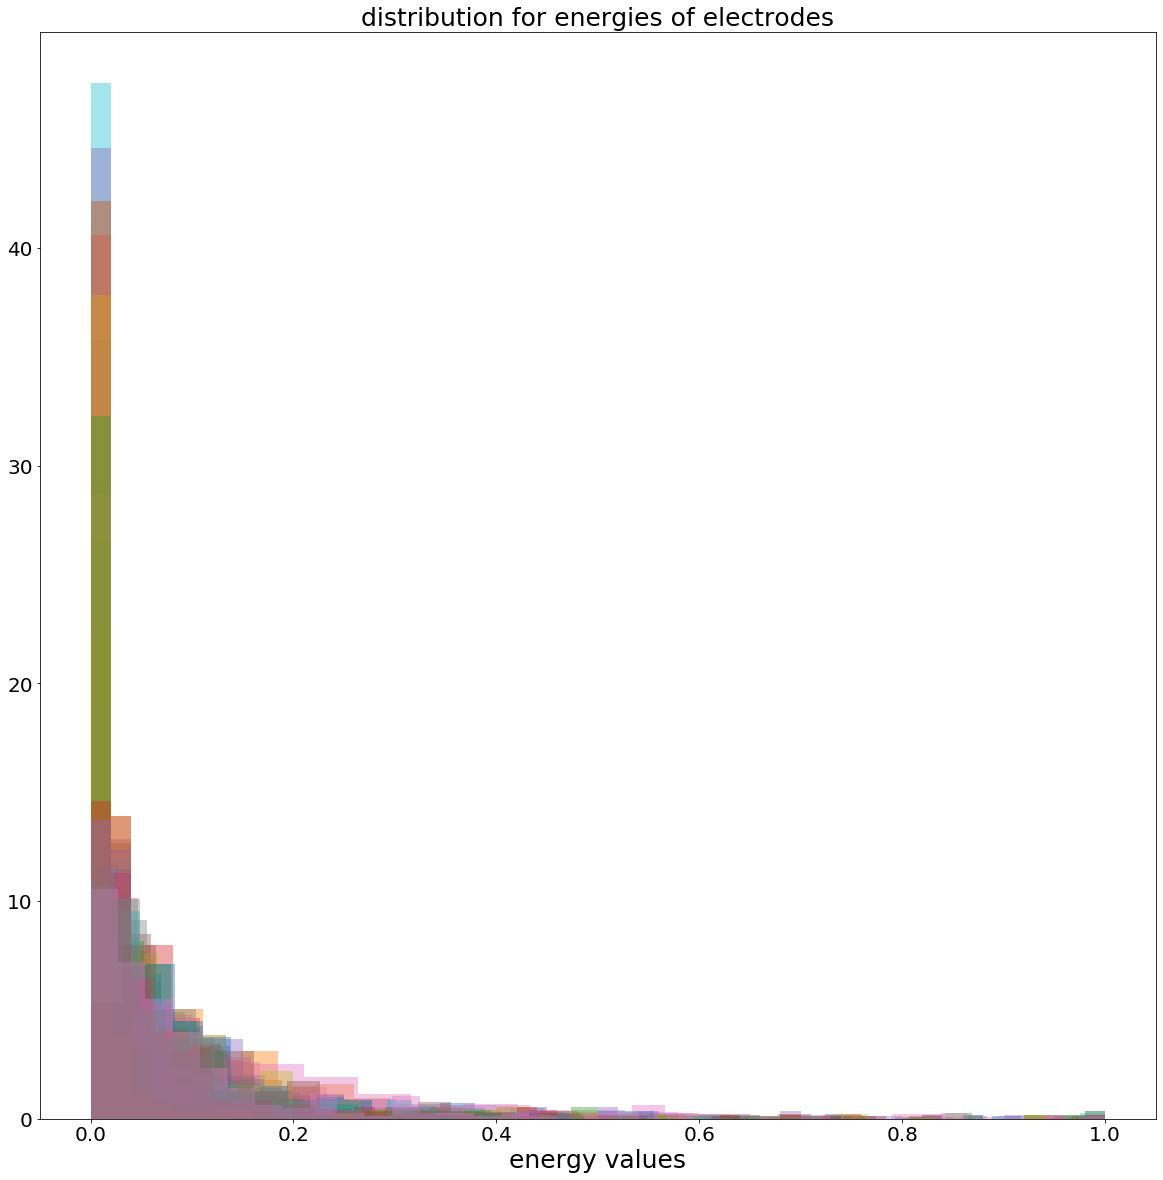

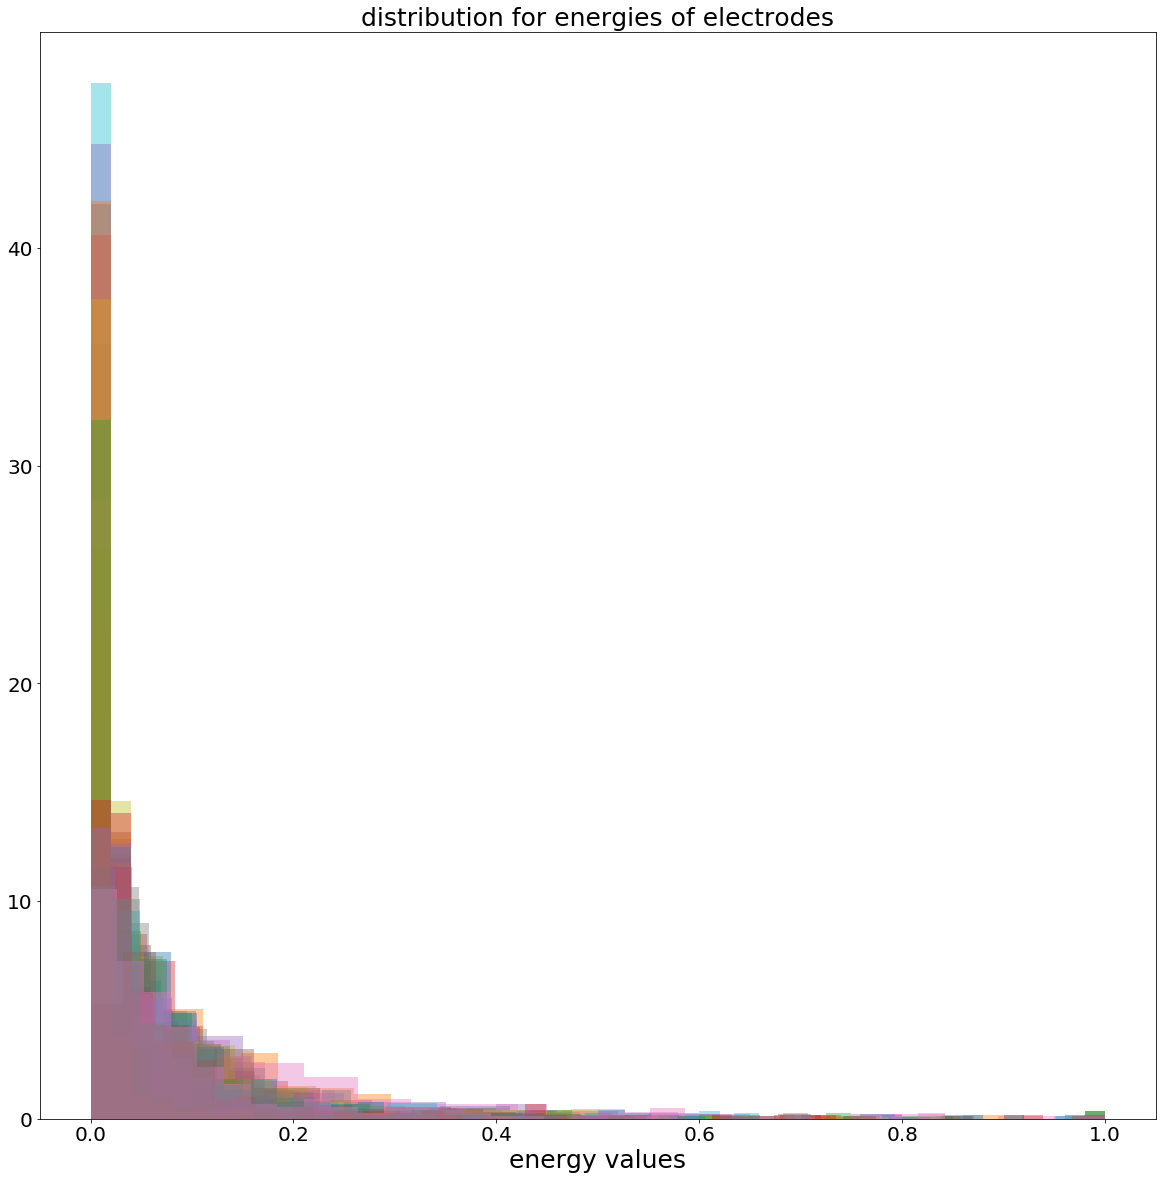

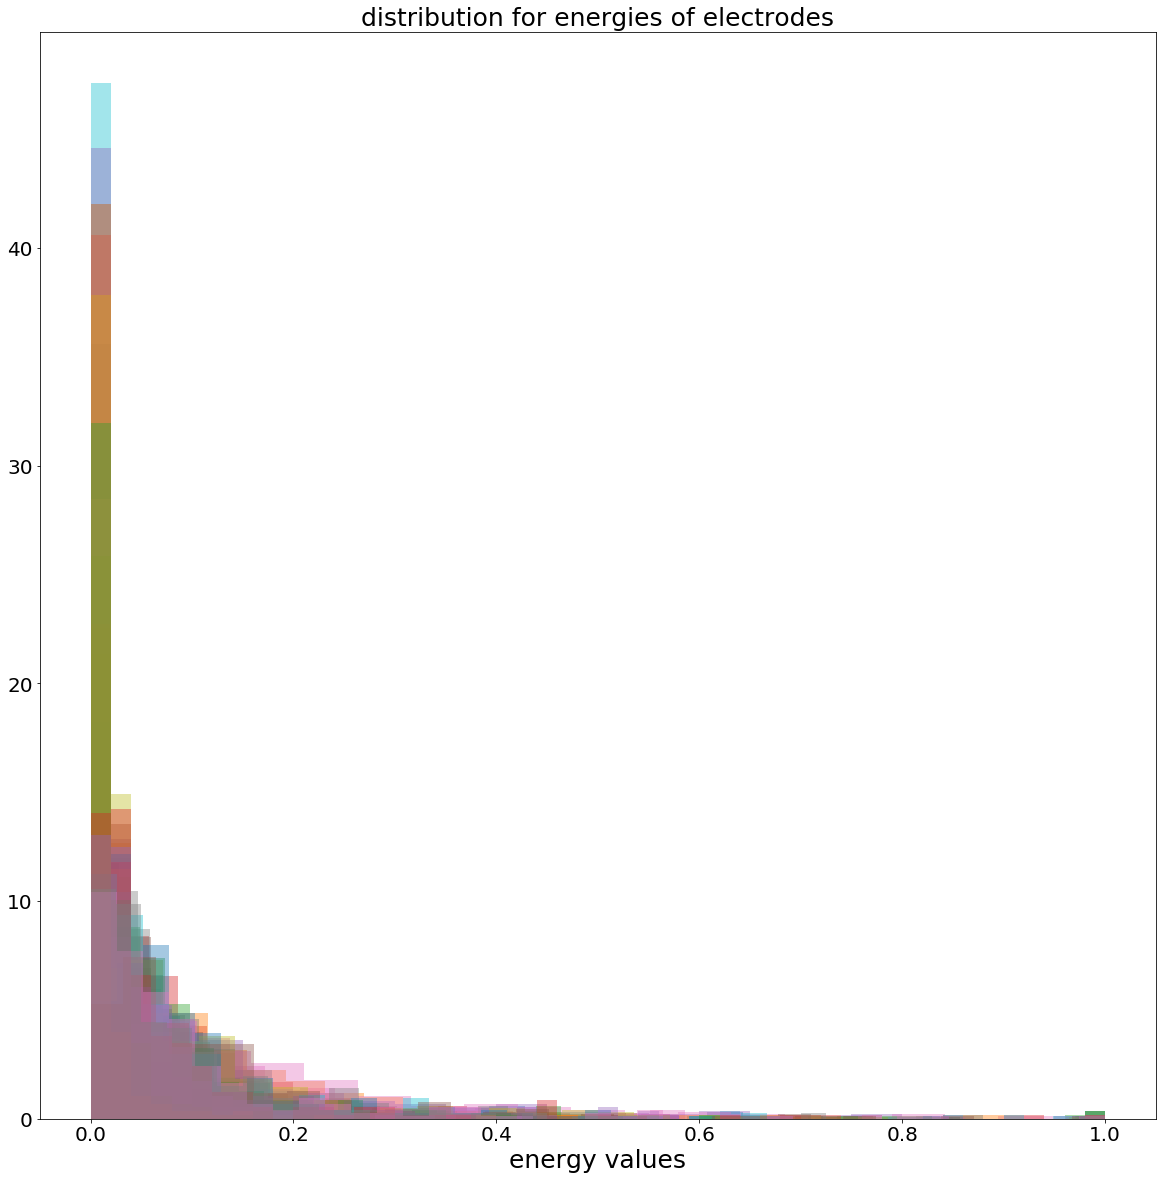

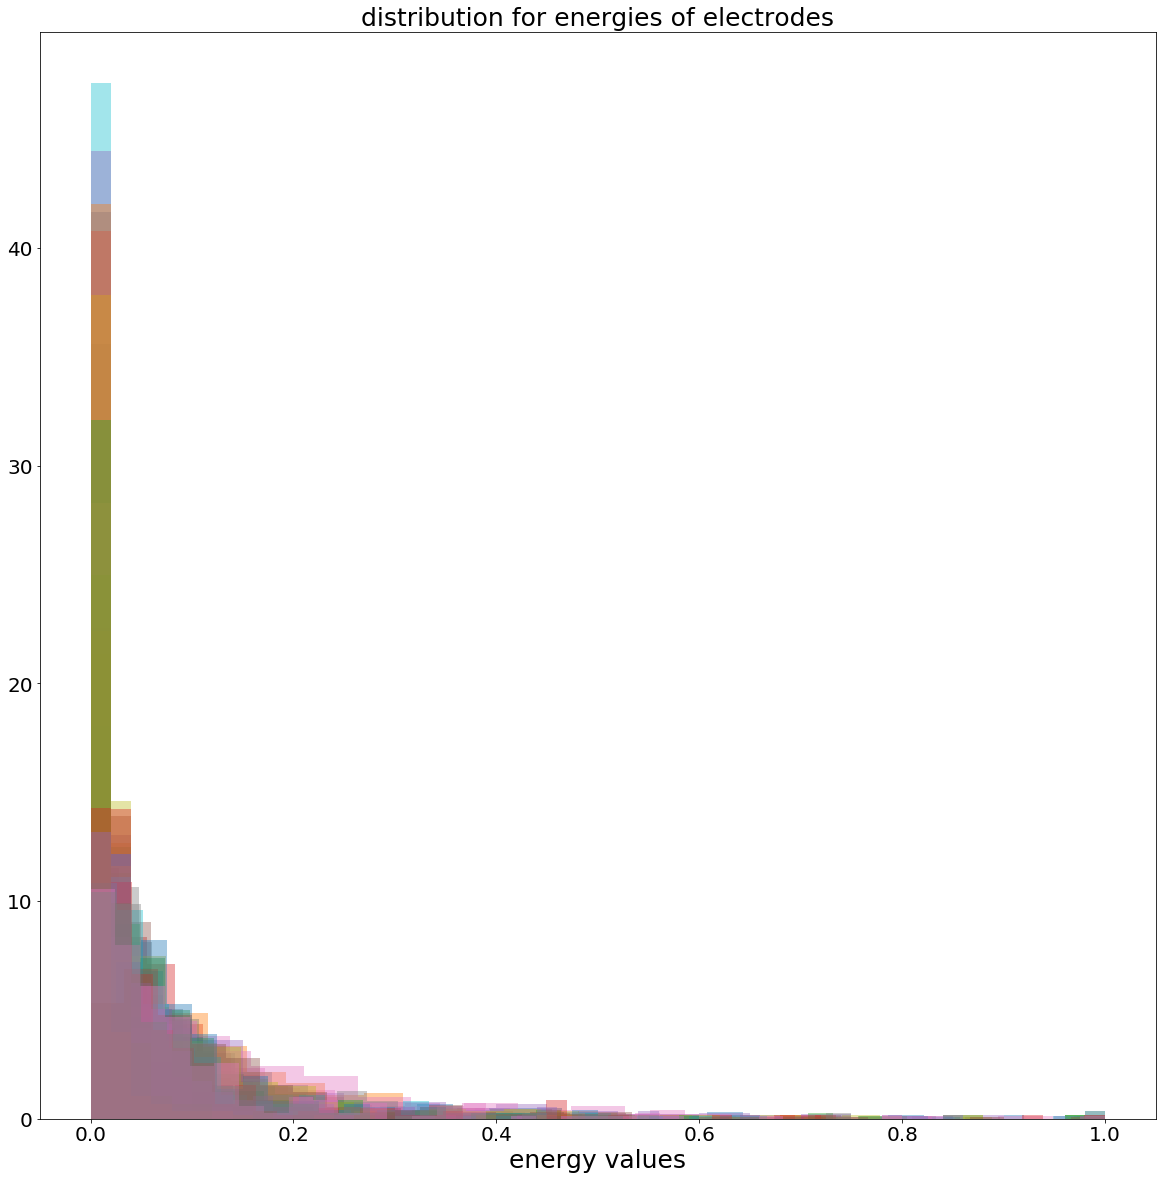

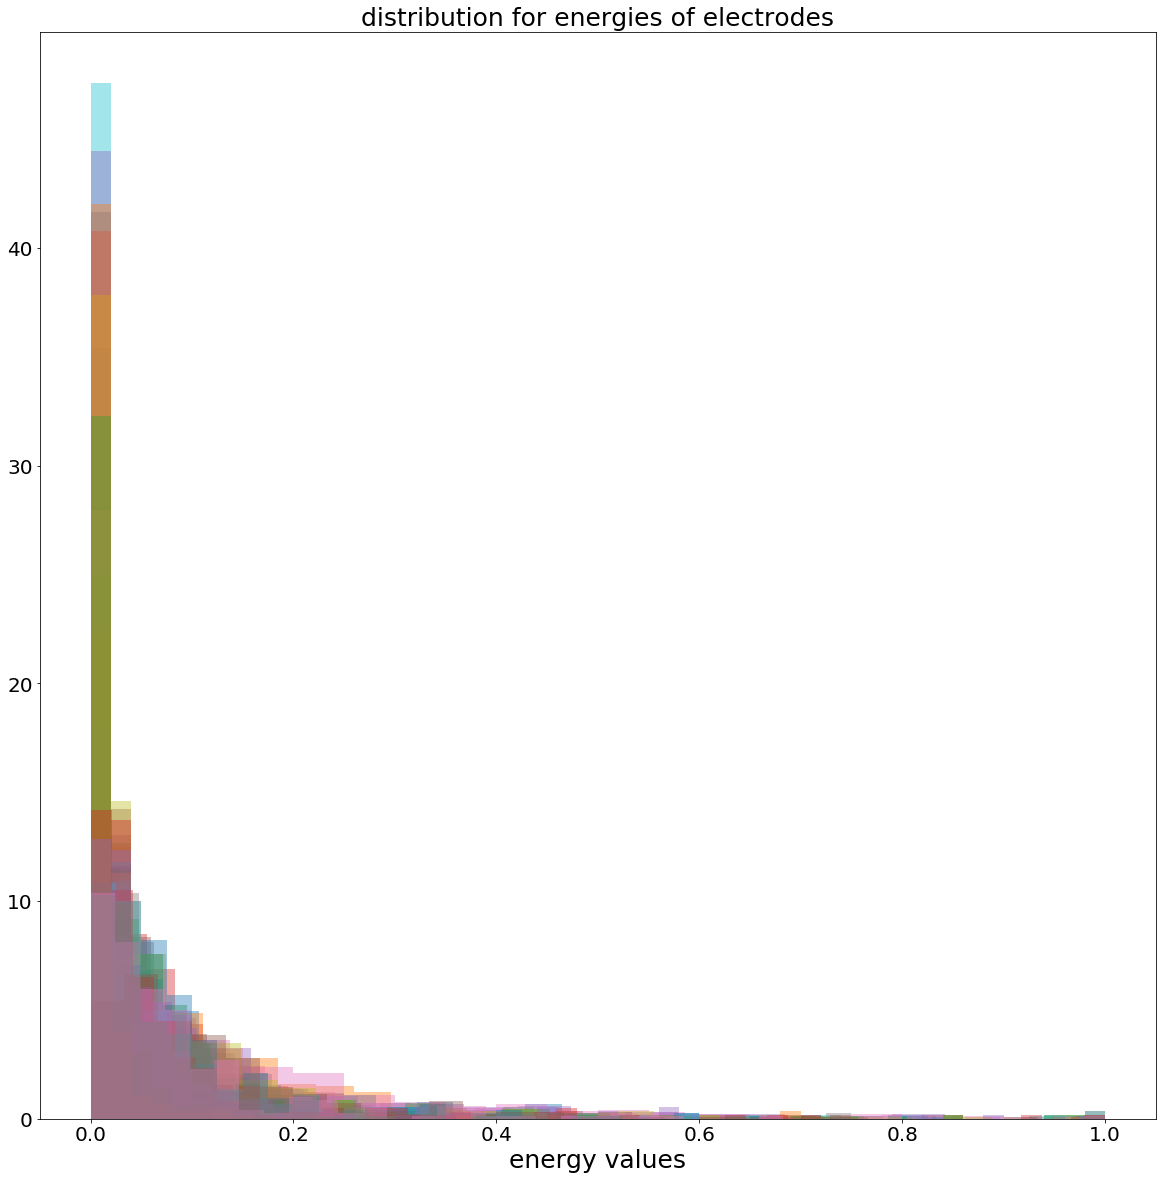

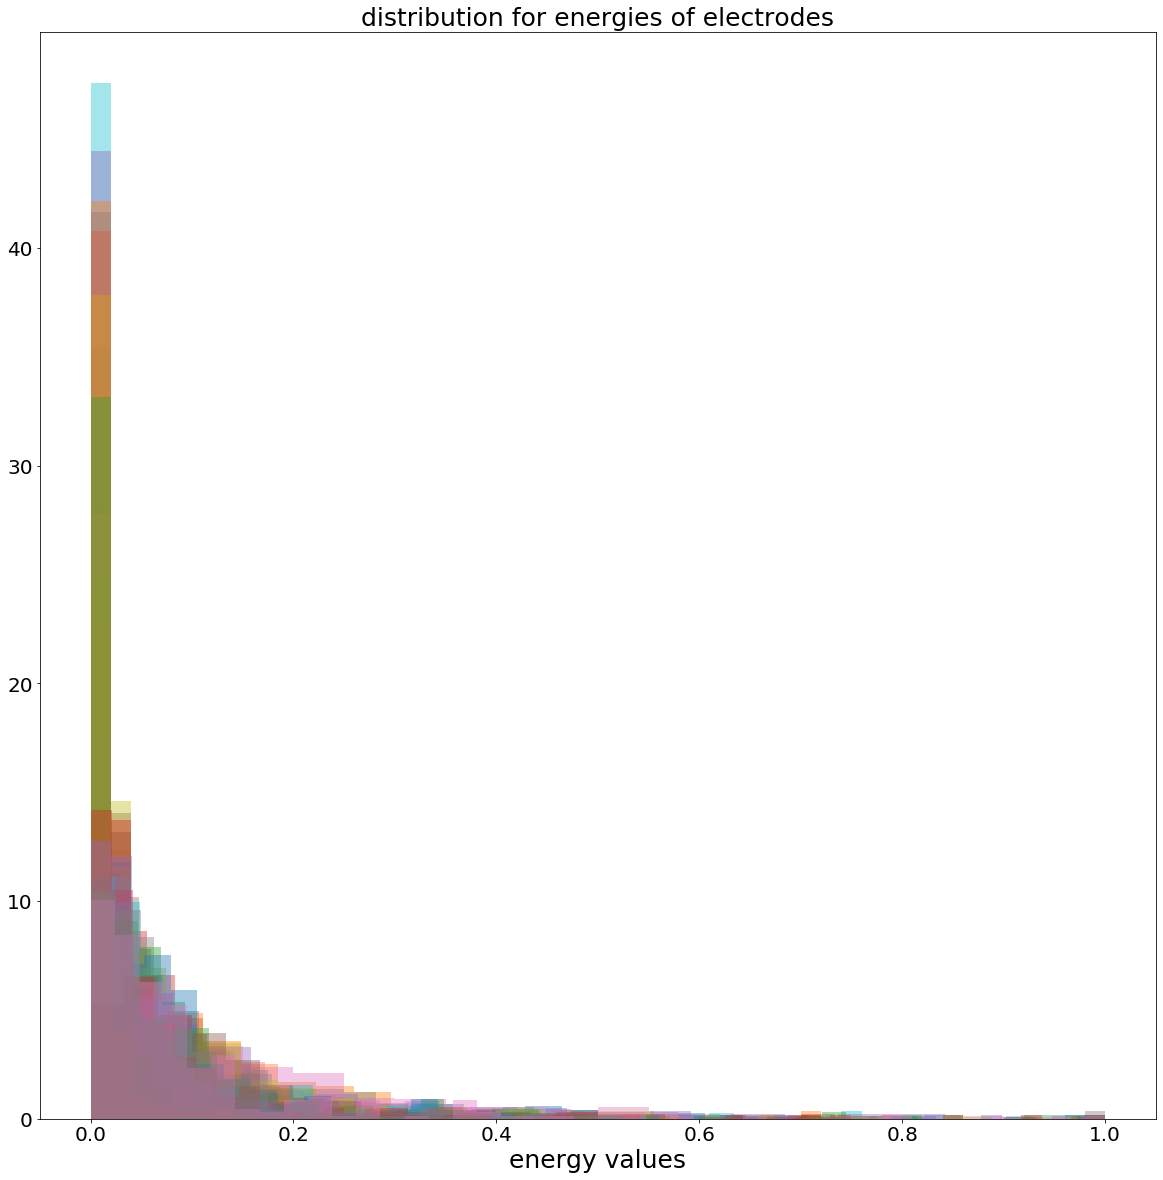

In [14]:
# Calculates the Distribution of Data

for win in range(nwin):
    
    # filtering the data for the frequencies of interest (f1 and f2)
    # data is cut to have the number of points desired (number of windows * window size) before filtering
    dataf1, dataf2 = filt_data(exames[:,0:(win+1)*win_size,:],filter_order,fs,f1,f2,filter_band)

    # calculates the energy of the resultant signals obtained by the filering process
    energyf1 = get_energy(dataf1)
    energyf2 = get_energy(dataf2)

    # concatenates the energy values obtained
    features = np.concatenate((energyf1,energyf2),axis=1)

    # Standardization to [0 1] range
    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)      # fits the scaler with the training data and transforms data
        
    fig,ax = plt.subplots(figsize=(20,20))
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.set_title('distribution for energies of electrodes',fontsize=25)
    ax.set_xlabel('energy values', fontsize=25)
    
    for i in range(features.shape[1]):
        sns.distplot(features[:,i], ax=ax, kde=False, norm_hist=True)
        #ax.hist(features[:,i], density=True, alpha=0.5)
        
    plt.savefig('/home/pedrosergiot/Documents/Energy_distribution_%d_janelas.png' % (win+1))

In [ ]:
np.std(features)

In [141]:
features[:,1]

array([2.03706770e-15, 2.82836312e-16, 2.50617645e-17, 3.68738222e-17,
       1.01699829e-17, 2.26423498e-16, 4.82650102e-16, 5.35889585e-15,
       1.86657256e-16, 4.06452947e-17, 6.15816874e-16, 5.78222211e-18,
       1.88643796e-17, 1.49047791e-16, 2.39225639e-17, 1.04357902e-16,
       4.72085216e-16, 2.29607784e-16, 5.43750988e-16, 2.19870482e-16,
       1.76257857e-16, 8.82519160e-17, 1.77639434e-18, 1.61303099e-16,
       2.67125679e-16, 1.95043736e-16, 1.80003349e-17, 1.17304059e-16,
       1.80003349e-17, 1.17304059e-16, 3.73021932e-17, 1.13807454e-16,
       1.51561130e-16, 7.03575308e-18, 4.83191929e-16, 1.50081861e-16,
       1.33399792e-16, 2.73900084e-17, 2.04036110e-16, 5.61642925e-17,
       1.36258376e-16, 9.63760339e-17, 7.01343137e-17, 2.14941005e-18,
       2.35735955e-17, 9.06875691e-17, 4.35063087e-17, 7.90131726e-17,
       6.12426881e-17, 3.63402811e-17, 6.12426881e-17, 3.63402811e-17,
       5.20364210e-17, 9.31939759e-17, 4.26221027e-17, 6.28967751e-17,
      

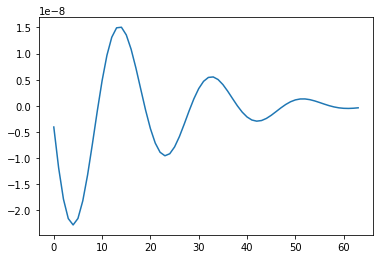

In [142]:
plt.plot(dataf1[0,:,0])

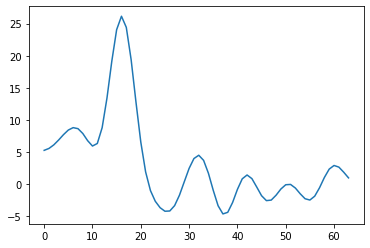

In [144]:
plt.plot(exames[0,0:64,0])

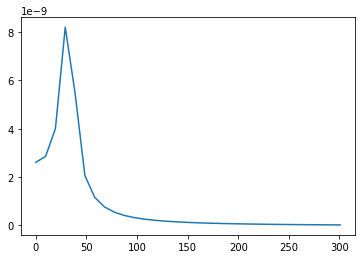

In [145]:
from scipy.fftpack import fft
# Number of sample points
N = dataf1.shape[1]
yf = fft(dataf1[0,0:64,0])
xf = np.linspace(0.0, fs/2.0, N//2)
plt.plot(xf, 2.0/N*np.abs(yf[0:N//2]))

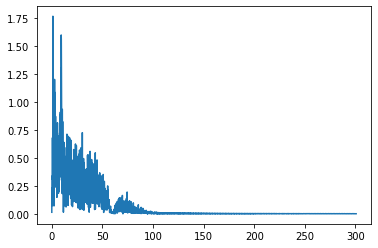

In [130]:
from scipy.fftpack import fft
# Number of sample points
N = exames.shape[1]
# sample spacing
T = 1.0/fs
yf = fft(exames[0,:,0])
xf = np.linspace(0.0, fs/2.0, N//2)
plt.plot(xf, 2.0/N*np.abs(yf[0:N//2]))

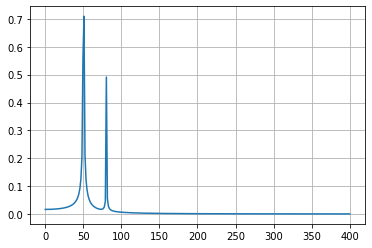

In [127]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [19]:
folder = '/home/pedrosergiot/Documents/dados_coletas/Sem_Remocao_Artefato/AnaClara1_05_2k_Pedro2'

import os

os.listdir(folder)

['exame_9.mat',
 'exame_2.mat',
 'exame_3.mat',
 'exame_5.mat',
 'exame_1.mat',
 'exame_7.mat',
 'exame_11.mat',
 'exame_6.mat',
 'exame_8.mat',
 'exame_13.mat',
 'dadosBasais.mat',
 'exame_0.mat',
 'exame_4.mat',
 'exame_12.mat',
 'exame_10.mat']

In [20]:
basal = loadmat(folder + '/dadosBasais.mat')

In [21]:
basal.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 27 09:56:11 2017'), ('__version__', '1.0'), ('__globals__', []), ('k_elet_esq1', array([[0.03378504, 0.12179207, 0.05349508, 0.02415947, 0.21657865,
        0.0339252 , 0.05167638, 0.04642116, 0.02569691, 0.0071889 ,
        0.02406232, 0.02068118, 0.02415883, 0.04920855, 0.01920346,
        0.05173909, 0.04997261, 0.04659038, 0.05543848,        nan]])), ('k_elet_dir1', array([[0.0203714 , 0.17810508, 0.00330854, 0.01244839, 0.00334253,
        0.00352919, 0.00420488, 0.04253296, 0.00567903, 0.08238081,
        0.03303023, 0.00674075, 0.00406957, 0.00135897, 0.00332472,
        0.01176253, 0.00622593, 0.06965997, 0.00624074,        nan]])), ('contaJanelaTOTAL', array([[20]], dtype=uint8)), ('dadosSinal', array([[  5.12753252,   3.31672858,   0.71199964, ...,  93.81922426,
          5.29956123,   0.        ],
       [  4.69975421,   1.00469762,  -1.5646944 , ..., 104.88950872,
          4.39078045, 

In [22]:
print(basal['dadosREJEICAO'].shape)

print(basal['dadosSinal'].shape)

(20480, 20)
(20480, 20)


In [29]:
exame = loadmat(folder + '/exame_0.mat')

if exame['ladoAT'] == 2:
    print('certo')

print(exame['dadosREJEICAO'].shape)

print(exame['dadosSinal'].shape)

print(exame.items())

certo
(6144, 20)
(6144, 20)
dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 27 09:56:31 2017'), ('__version__', '1.0'), ('__globals__', []), ('ladoAT', array([[2]], dtype=uint8)), ('contaJanelaTOTAL', array([[6]], dtype=uint8)), ('dadosSinal', array([[-0.52252187,  0.50840539,  2.38479899, ...,  1.22146772,
         0.90389623,  0.        ],
       [ 2.02204632,  4.18807747,  2.94032406, ...,  2.33522524,
         1.7517975 ,  0.        ],
       [ 4.98605993,  7.77014974,  3.96510636, ...,  3.70950665,
         2.78733378,  0.        ],
       ...,
       [14.80652355,  8.63955436,  5.6332645 , ...,  8.56930542,
         4.14716096,  0.        ],
       [11.62773918,  7.33228839,  3.32613408, ...,  7.23506926,
         4.14641173,  0.        ],
       [ 8.06599473,  6.63905619,  1.02458659, ...,  5.99782409,
         4.38284277,  0.        ]])), ('in_at_esq', array([[ 0.        ,  0.        , -0.33699961, -0.14111801,  0.11088644,
         0.11

In [13]:
limiar = loadmat(folder + '/dadosLimiar.mat')

limiar.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jun 23 10:51:06 2017'), ('__version__', '1.0'), ('__globals__', []), ('stdrej', array([[21.24858817, 15.71534573, 13.14524499, 20.09772364, 17.58788417,
        15.94760951, 13.86493193, 11.5794901 , 20.02545352, 15.67264921,
        11.75492326, 21.73591092, 20.90822971, 17.44577501, 13.51775467,
         9.20760305, 21.45268934, 73.66103531, 16.74804843,  0.        ]])), ('Sinalpadrao', array([[ -3.82092998,   2.43272826,   1.49428439, ...,  14.05721186,
         -0.28069398,   0.        ],
       [ -4.2617912 ,   3.35648394,   3.35105652, ..., -10.16327949,
         -0.64945908,   0.        ],
       [ -3.79610782,   4.2156212 ,   5.36261685, ..., -24.55778809,
         -1.31837239,   0.        ],
       ...,
       [ -5.75981921,  -3.01520205,  -0.24548809, ...,  -4.04579778,
         -1.63523714,   0.        ],
       [ -4.76273294,  -2.58749616,   0.33205473, ...,  -3.12940496,
         -0.950230

In [16]:
limiar['Sinalpadrao'].shape

(12288, 20)